In [1]:
from plotting_functions import *
import csv
import math
from math import log
from tmgen.models import uniform_tm,spike_tm,modulated_gravity_tm,random_gravity_tm,gravity_tm,exp_tm

In [2]:
def get_available_topologies(results_file_path,given_spike_mean,given_threshold_range,given_num_of_paths,given_life_time):
    all_selected_topologies = []
    all_available_storage_capacities = []
    with open(results_file_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):
            topology = line[0]
            num_paths = int(line[2])
            life_time =int(line[3])
            spike_mean = int(line[5])
            threshold_range = float(line[9])
            storage_capacity = int(line[12])
            if given_spike_mean == int(line[5]):
                if "erdos" in topology and "erdos_renyi2" not in topology:
                    topology = "G(n,p=0.1)"
                elif "barabasi_albert_" in topology and "barabasi_albert2_" not in topology:
                    topology= "G(n,m=3)"
                elif "erdos_renyi2" in topology:
                    topology = "G(n,p=0.05)"
                elif "barabasi_albert2" in topology:
                    topology= "G(n,m=2)"
                else:
                    topology = topology
                #print(line)#['SURFnet', '6', '3', '1000', '1.861111111111111', '150', '3', '0', 'Degree', '0.8', 'sequential', '2', '200']
                if int(life_time)==given_life_time:
                    #print("line time pass")
                    if given_spike_mean ==spike_mean:
                        #print("spike mean pass")
                        if threshold_range ==given_threshold_range:
                            #print("threshold pass")
                            if given_num_of_paths == num_paths:
                                #print("num paths pass")
                                if topology not in all_selected_topologies:
                                    all_selected_topologies.append(topology)
                                if storage_capacity not in all_available_storage_capacities:
                                    all_available_storage_capacities.append(storage_capacity)
    return all_selected_topologies,all_available_storage_capacities
    
def get_each_storage_capacity_storage_numbers_swaps(results_file_path,given_topology,given_spike_mean,given_threshold_range,given_num_of_paths,given_life_time,given_capacity):
    each_storage_numbers_swappings = {}
    each_topology_plot_name = {}
    with open(results_file_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):
            topology = line[0]
            threshold_range = float(line[9])
            spike_mean = int(line[5])
            storage_capacity = int(line[12])
            if "erdos" in topology and "erdos_renyi2" not in topology:
                topology = "G(n,p=0.1)"
                plot_name = "swappings_G_n_p_0.1_"+str(threshold_range)+"_"+str(storage_capacity)+".pdf"
            elif "barabasi_albert_" in topology and "barabasi_albert2_" not in topology:
                topology= "G(n,m=3)"
                plot_name = "swappings_G_n_m_3_"+str(threshold_range)+"_"+str(storage_capacity)+".pdf"
            elif "erdos_renyi2" in topology:
                topology = "G(n,p=0.05)"
                plot_name = "swappings_G_n_p_0.05_"+str(threshold_range)+"_"+str(storage_capacity)+".pdf"
            elif "barabasi_albert2" in topology:
                topology= "G(n,m=2)"
                plot_name = "swappings_G_n_m_2_"+str(threshold_range)+"_"+str(storage_capacity)+".pdf"
            else:
                topology = topology
                plot_name = "swappings_"+str(topology)+"_"+str(threshold_range)+"_"+str(storage_capacity)+".pdf"
            each_topology_plot_name[topology]= plot_name
            storage_numbers = int(line[1])
            num_paths = int(line[2])
            life_time =int(line[3])
            
            objective_function_value =float(line[4])
            storage_selection_scheme = line[8]
            #print(line)
            if objective_function_value >0 and given_capacity ==storage_capacity and topology ==given_topology and int(life_time)==given_life_time and given_spike_mean ==spike_mean and threshold_range ==given_threshold_range and given_num_of_paths == num_paths:
                storage_numbers_key = str(storage_numbers)
                
                try:
                    each_storage_numbers_swappings[storage_selection_scheme][storage_numbers_key].append(objective_function_value)
                except:
                    try:
                        each_storage_numbers_swappings[storage_selection_scheme][storage_numbers_key]= [objective_function_value]
                    except:
                        each_storage_numbers_swappings[storage_selection_scheme] = {}
                        each_storage_numbers_swappings[storage_selection_scheme][storage_numbers_key]= [objective_function_value]
                        
    return each_storage_numbers_swappings,each_topology_plot_name




def get_each_scheme_EGR(file_result_path,spike_mean):
    each_scheme_each_storage_number_EGRs = {}
    num_of_paths = []
    number_of_storages = []
    each_num_of_storage_num_of_paths = {}
    
    topologies = set([])
    life_times = set([])
    unique_topologies = []
    all_selected_topologies = []
    threshold_ranges = []
    each_topology_plot_name = {}
    available_networks = []
    available_storage_capacities = []
    with open(file_result_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):##[network_topology,number_of_storages,num_paths,life_time,
            #objective_value,spike_mean,num_spikes,i,storage_node_selection_scheme,fidelity_threshold_range]
            topology = line[0]
            threshold_range = float(line[9])
            storage_capacity = int(line[12])
            experiment_id = int(line[7])
            if spike_mean == int(line[5]):
                if storage_capacity not in available_storage_capacities:
                    available_storage_capacities.append(storage_capacity)
                if threshold_range not in threshold_ranges:
                    threshold_ranges.append(threshold_range)
                if topology not in unique_topologies:
                    unique_topologies.append(topology)
                if "erdos" in topology and "erdos_renyi2" not in topology:
                    topology = "G_n_p_0.1"
                    plot_name = "life_time_feasibility_G_n_p_0.1_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"

                elif "barabasi_albert_" in topology and "barabasi_albert2_" not in topology:
                    topology= "G_n_m_3"
                    plot_name = "life_time_feasibility_G_n_m_3_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                elif "erdos_renyi2" in topology:
                    topology = "G_n_p_0.05"
                    plot_name = "life_time_feasibility_G_n_p_0.05_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                elif "barabasi_albert2" in topology:
                    topology= "G_n_m_2"
                    plot_name = "life_time_feasibility_G_n_m_2_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                else:
                    topology = topology
                    plot_name = "life_time_feasibility_"+str(topology)+"_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
    #             if topology in "G(n,p=0.1)":
    #                 print(line)
                if topology not in available_networks:
                    available_networks.append(topology)
                try:
                    each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                except:
                    try:
                        each_topology_plot_name[topology][threshold_range] = {}
                        each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                    except:
                        each_topology_plot_name[topology]={}
                        each_topology_plot_name[topology][threshold_range]={}
                        each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                        
                if topology not in all_selected_topologies:
                    all_selected_topologies.append(topology)
                topologies.add(topology)
                storage_numbers = int(line[1])
                num_paths = int(line[2])
                life_time =float(line[3])
                life_times.add(life_time)
                objective_function_value =float(line[4])
                storage_selection_scheme = line[8]

                if int(life_time)==1000:
                    scheme_key = str(('Inf'))+", "+storage_selection_scheme
                else:
                    scheme_key = "One, "+storage_selection_scheme

                if num_paths not in num_of_paths:
                        num_of_paths.append(num_paths)
                if storage_numbers not in number_of_storages:
                        number_of_storages.append(storage_numbers)        
                if objective_function_value >0.0:
                    #print(line,"one satisfied case")
                    #if threshold_range==0.7 and "Random" in scheme_key and "One" in scheme_key and topology =="SURFnet" and storage_capacity== 500:
                        #print("we have 0.7")
                    try:
                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers].append(objective_function_value)
                    except:
                        try:
                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                        except:
                            try:
                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                            except:
                                try:
                                    each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                    each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                    each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                                except:
                                    try:
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity] ={}
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]

                                    except:
                                        
                                        try:
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology] = {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity] ={}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]

                                        except:
                                            each_scheme_each_storage_number_EGRs[scheme_key]={}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity] ={}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
#             else:
#                 print(line)
#     print("unique_topologies ",storage_selection_scheme,unique_topologies,storage_selection_scheme)
#     print("all_selected_topologies",storage_selection_scheme,all_selected_topologies)
    return each_scheme_each_storage_number_EGRs,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities

def get_each_scheme_shared(file_result_path,spike_mean):
    each_scheme_each_storage_number_EGRs = {}
    num_of_paths = []
    number_of_storages = []
    each_num_of_storage_num_of_paths = {}
    
    topologies = set([])
    life_times = set([])
    unique_topologies = []
    all_selected_topologies = []
    threshold_ranges = []
    each_topology_plot_name = {}
    available_networks = []
    available_storage_capacities = []
    with open(file_result_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):##[network_topology,number_of_storages,num_paths,life_time,
            #objective_value,spike_mean,num_spikes,i,storage_node_selection_scheme,fidelity_threshold_range]
            topology = line[0]
            threshold_range = float(line[9])
            storage_capacity = int(line[12])
            experiment_id = int(line[7])
            if spike_mean == int(line[5]):
                if storage_capacity not in available_storage_capacities:
                    available_storage_capacities.append(storage_capacity)
                if threshold_range not in threshold_ranges:
                    threshold_ranges.append(threshold_range)
                if topology not in unique_topologies:
                    unique_topologies.append(topology)
                if "erdos" in topology and "erdos_renyi2" not in topology:
                    topology = "G_n_p_0.1"
                    plot_name = "life_time_feasibility_G_n_p_0.1_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"

                elif "barabasi_albert_" in topology and "barabasi_albert2_" not in topology:
                    topology= "G_n_m_3"
                    plot_name = "life_time_feasibility_G_n_m_3_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                elif "erdos_renyi2" in topology:
                    topology = "G_n_p_0.05"
                    plot_name = "life_time_feasibility_G_n_p_0.05_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                elif "barabasi_albert2" in topology:
                    topology= "G_n_m_2"
                    plot_name = "life_time_feasibility_G_n_m_2_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                else:
                    topology = topology
                    plot_name = "life_time_feasibility_"+str(topology)+"_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
    #             if topology in "G(n,p=0.1)":
    #                 print(line)
                if topology not in available_networks:
                    available_networks.append(topology)
                try:
                    each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                except:
                    try:
                        each_topology_plot_name[topology][threshold_range] = {}
                        each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                    except:
                        each_topology_plot_name[topology]={}
                        each_topology_plot_name[topology][threshold_range]={}
                        each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                        
                if topology not in all_selected_topologies:
                    all_selected_topologies.append(topology)
                topologies.add(topology)
                storage_numbers = int(line[1])
                num_paths = int(line[2])
                life_time =float(line[3])
                life_times.add(life_time)
                objective_function_value =float(line[14])
                storage_selection_scheme = line[8]

                if int(life_time)==1000:
                    scheme_key = str(('Inf'))+", "+storage_selection_scheme
                else:
                    scheme_key = "One, "+storage_selection_scheme

                if num_paths not in num_of_paths:
                        num_of_paths.append(num_paths)
                if storage_numbers not in number_of_storages:
                        number_of_storages.append(storage_numbers)        
                if objective_function_value >=0.0:
                    #print(line,"one satisfied case")
                    #if threshold_range==0.7 and "Random" in scheme_key and "One" in scheme_key and topology =="SURFnet" and storage_capacity== 500:
                        #print("we have 0.7")
                    try:
                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers].append(objective_function_value)
                    except:
                        try:
                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                        except:
                            try:
                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                            except:
                                try:
                                    each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                    each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                    each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                                except:
                                    try:
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity] ={}
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]

                                    except:
                                        
                                        try:
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology] = {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity] ={}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]

                                        except:
                                            each_scheme_each_storage_number_EGRs[scheme_key]={}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity] ={}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
#             else:
#                 print(line)
#     print("unique_topologies ",storage_selection_scheme,unique_topologies,storage_selection_scheme)
#     print("all_selected_topologies",storage_selection_scheme,all_selected_topologies)
    return each_scheme_each_storage_number_EGRs,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities

def get_avaiable_spike_mean_values(file_result_path):
    acailable_spike_means = set([])
    with open(file_result_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):##[network_topology,number_of_storages,num_paths,life_time,
            #objective_value,spike_mean,num_spikes,i,storage_node_selection_scheme,fidelity_threshold_range]
            topology = line[0]
            threshold_range = float(line[9])
            storage_capacity = int(line[12])
            experiment_id = int(line[7])
            acailable_spike_means.add(int(line[5]))
    return list(acailable_spike_means)
def get_each_scheme_available_satisfied(file_result_path,spike_mean):    
    
    each_scheme_each_storage_number_satisfying = {}
    num_of_paths = []
    number_of_storages = []
    each_num_of_storage_num_of_paths = {}
    each_topology_each_storage_available = {}
    topologies = set([])
    life_times = set([])
    unique_topologies = []
    all_selected_topologies = []
    threshold_ranges = []
    each_topology_plot_name = {}
    available_networks = []
    available_storage_capacities = []
    with open(file_result_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):##[network_topology,number_of_storages,num_paths,life_time,
            #objective_value,spike_mean,num_spikes,i,storage_node_selection_scheme,fidelity_threshold_range]
            topology = line[0]
            threshold_range = float(line[9])
            storage_capacity = int(line[12])
            experiment_id = int(line[7])
            if spike_mean == int(line[5]):
                if storage_capacity not in available_storage_capacities:
                    available_storage_capacities.append(storage_capacity)
                
                if threshold_range not in threshold_ranges:
                    threshold_ranges.append(threshold_range)
                if topology not in unique_topologies:
                    unique_topologies.append(topology)
                if "erdos" in topology and "erdos_renyi2" not in topology:
                    topology = "G_n_p_0.1"
                    plot_name = "life_time_feasibility_G_n_p_0.1_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"

                elif "barabasi_albert_" in topology and "barabasi_albert2_" not in topology:
                    topology= "G_n_m_3"
                    plot_name = "life_time_feasibility_G_n_m_3_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                elif "erdos_renyi2" in topology:
                    topology = "G_n_p_0.05"
                    plot_name = "life_time_feasibility_G_n_p_0.05_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                elif "barabasi_albert2" in topology:
                    topology= "G_n_m_2"
                    plot_name = "life_time_feasibility_G_n_m_2_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                else:
                    topology = topology
                    plot_name = "life_time_feasibility_"+str(topology)+"_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
    #             if topology in "G(n,p=0.1)":
    #                 print(line)
                if topology not in available_networks:
                    available_networks.append(topology)
                try:
                    each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                except:
                    try:
                        each_topology_plot_name[topology][threshold_range] = {}
                        each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                    except:
                        each_topology_plot_name[topology]={}
                        each_topology_plot_name[topology][threshold_range]={}
                        each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                        
                if topology not in all_selected_topologies:
                    all_selected_topologies.append(topology)
                topologies.add(topology)
                storage_numbers = int(line[1])
                num_paths = int(line[2])
                life_time =float(line[3])
                life_times.add(life_time)
                objective_function_value =float(line[4])
                storage_selection_scheme = line[8]

                if int(life_time)==1000:
                    if storage_selection_scheme=="Degree":
                        scheme_key = str((u'h ≥ |T|'))+", "+"$\it{Degree}$"
                    elif storage_selection_scheme=="Random":
                        scheme_key = str((u'h ≥ |T|'))+", "+"$\it{Random}$"
                else:
                    if storage_selection_scheme=="Degree":
                        scheme_key = str((u'h =1'))+", "+"$\it{Degree}$"
                    elif storage_selection_scheme=="Random":
                        scheme_key = str((u'h =1'))+", "+"$\it{Random}$"
                    #scheme_key = "h=1, "+storage_selection_scheme

                try:
                    each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers]+=1
                except:
                    try:
                        each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers]=1
                    except:
                        try:
                            each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths]={}
                            each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers]=1
                        except:
                            try:
                                each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range]={}
                                each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths]={}
                                each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers]=1
                            except:
                                try:
                                
                                    each_topology_each_storage_available[scheme_key][topology][storage_capacity]={}
                                    each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range] = {}
                                    each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths]={}
                                    each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers]=1

                                except:
                                    try:
                                        each_topology_each_storage_available[scheme_key][topology]={}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity]={}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range] = {}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths]={}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers]=1

                                    except:
                                        each_topology_each_storage_available[scheme_key]={}
                                        each_topology_each_storage_available[scheme_key][topology]={}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity]={}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range] = {}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths]={}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers]=1

                if num_paths not in num_of_paths:
                        num_of_paths.append(num_paths)
                if storage_numbers not in number_of_storages:
                        number_of_storages.append(storage_numbers)        
                if objective_function_value >0.0:
                    #print(line,"one satisfied case")
                    try:
                        each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers].append(objective_function_value)
                    except:
                        try:
                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                        except:
                            try:
                                each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                            except:
                                try:
                                    each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range]= {}
                                    each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                    each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                                except:
                                    try:
                                        each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity] ={}
                                        each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range]= {}
                                        each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                        each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]

                                    except:
                                        
                                        try:
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology] = {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity] ={}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]

                                        except:
                                            each_scheme_each_storage_number_satisfying[scheme_key]={}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity] ={}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
#             else:
#                 print(line)
#     print("unique_topologies ",storage_selection_scheme,unique_topologies,storage_selection_scheme)
#     print("all_selected_topologies",storage_selection_scheme,all_selected_topologies)
    return each_scheme_each_storage_number_satisfying,each_topology_each_storage_available,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities



def each_experiment_storage_utilization(result_file_path,given_spike_mean):
    schemes_in_order = ["EPR pairs delivered","EPR pairs used for purification"]
    x_axis_values_in_order = []
    available_networks = []
    each_topology_plot_name = {}
    each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold={}
    with open(result_file_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
#         [network_topology,number_of_storages,num_paths,
#                                 life_time,
#                                 objective_value,spike_mean,num_spikes,i,
#                                 storage_node_selection_scheme,
#                                 fidelity_threshold_range,cyclic_workload,
#                                 distance_between_users,storage_capacity,edge_fidelity_range,delat_value,
#                                 max_served_from_storage,avg_served_from_storage,all_served_from_storage,
#                                 this_exp_demands]
        for line in (reader):
            topology = line[0]
            threshold_range = float(line[9])
            storage_capacity = int(line[12])
            experiment_id = int(line[7])
            if int(line[3])==1000 and line[8]=="Degree":
                each_scheme="Degree"
                each_scheme = str((u'h ≥ |T|'))+", "+"$\it{Degree}$"
                    
            elif int(line[3])==1000 and line[8]=="Random":
                each_scheme="Random"
                each_scheme = str((u'h ≥ |T|'))+", "+"$\it{Random}$"
            each_storage_capacity=int(line[12])
            num_paths=int(line[2])
            storage_numbers = int(line[1])
            threshold_range = float(line[9])
            spike_mean  = int(line[5])
            if threshold_range not in schemes_in_order:
                schemes_in_order.append(threshold_range)
            if spike_mean ==given_spike_mean:
                if "erdos" in topology and "erdos_renyi2" not in topology:
                        topology = "G_n_p_0.1"
                        plot_name = "utilization_G_n_p_0.1_"+str(topology)+"_"+str(storage_capacity)+"_"+str(storage_numbers)+".pdf"

                elif "barabasi_albert_" in topology and "barabasi_albert2_" not in topology:
                    topology= "G_n_m_3"
                    plot_name = "utilization_G_n_m_3_"+str(topology)+"_"+str(storage_capacity)+"_"+str(storage_numbers)+".pdf"
                elif "erdos_renyi2" in topology:
                    topology = "G_n_p_0.05"
                    plot_name = "utilization_G_n_p_0.05_"+str(topology)+"_"+str(storage_capacity)+"_"+str(storage_numbers)+".pdf"
                elif "barabasi_albert2" in topology:
                    topology= "G_n_m_2"
                    plot_name = "utilization_G_n_m_2_"+str(topology)+"_"+str(storage_capacity)+"_"+str(storage_numbers)+".pdf"
                else:
                    topology = topology
                    plot_name = "utilization_"+str(topology)+"_"+str(storage_capacity)+"_"+str(storage_numbers)+".pdf"
    #             if topology in "G(n,p=0.1)":
    #                 print(line)
                if topology not in available_networks:
                    available_networks.append(topology)
                try:
                    each_topology_plot_name[topology][storage_capacity][storage_numbers]=plot_name
                except:
                    try:
                        each_topology_plot_name[topology][storage_capacity] = {}
                        each_topology_plot_name[topology][storage_capacity][storage_numbers]=plot_name
                    except:
                        each_topology_plot_name[topology]={}
                        each_topology_plot_name[topology][storage_capacity]={}
                        each_topology_plot_name[topology][storage_capacity][storage_numbers]=plot_name
               # 15 :max_served_from_storage,avg_served_from_storage,all_served_from_storage,
#                                 this_exp_demands
#             network_topology,number_of_storages,num_paths,
#             life_time,
#             objective_value,spike_mean,num_spikes,i,
#             storage_node_selection_scheme,
#             fidelity_threshold_range,cyclic_workload,
#             distance_between_users,storage_capacity,edge_fidelity_range,delat_value,
#             max_served_from_storage,avg_served_from_storage,all_served_from_storage,this_exp_demands,
#             max_used_for_purification_from_storage,avg_used_for_purification_from_storage,
#             all_used_for_purification_from_storage,
#             22max_storage_usage,23 avg_storage_usage,24 sum_storage_usage
                #for max use 15 and 19
                #for avg use 16,20
                #for sum use 17,21
                served_EPRs = (float(line[23])/(each_storage_capacity/20)) * 100
#                 served_EPRs = float(line[22])
#                 purification_EPRs = (float(line[20])/each_storage_capacity) * 100
#                 purification_EPRs = float(line[20])
                purification_EPRs = 0
                each_topology = topology
                try:
                    each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"][threshold_range].append(served_EPRs)
                except:
                    try:
                        each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"][threshold_range]=[served_EPRs]
                    except:
                        try:
                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"] = {}
                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"][threshold_range]=[served_EPRs] 
                        except:
                            try:
                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers] = {}
                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"] = {}
                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"][threshold_range]=[served_EPRs]
                            except:
                                try:
                                    each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths] = {}
                                    each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers] = {}
                                    each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"] = {}
                                    each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"][threshold_range]=[served_EPRs]
                                except:
                                    try:
                                        each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity] = {}
                                        each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths] = {}
                                        each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers] = {}
                                        each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"]= {}
                                        each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"][threshold_range]=[served_EPRs]
                                    except:
                                        try:
                                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme] = {}
                                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity] = {}
                                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths] = {}
                                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers] = {}
                                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"]= {}
                                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"][threshold_range]=[served_EPRs]
                                        except:
                                            try:
                                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology]= {}
                                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme] = {}
                                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity] = {}
                                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths] = {}
                                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers] = {}
                                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"] = {}
                                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"][threshold_range]=[purification_EPRs]
                                            except ValueError:
                                                print("ValueError")
                try:
                    each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs used for purification"][threshold_range].append(purification_EPRs)
                except:
                    try:
                        each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs used for purification"][threshold_range]=[purification_EPRs]
                    except:
                        try:
                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs used for purification"] = {}
                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs used for purification"][threshold_range]=[purification_EPRs] 
                        except:
                            try:
                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers] = {}
                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs used for purification"]= {}
                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs used for purification"][threshold_range]=[purification_EPRs]
                            except:
                                try:
                                    each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths] = {}
                                    each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers] = {}
                                    each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs used for purification"] = {}
                                    each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs used for purification"][threshold_range]=[purification_EPRs]
                                except:
                                    try:
                                        each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity] = {}
                                        each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths] = {}
                                        each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers] = {}
                                        each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs used for purification"] = {}
                                        each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs used for purification"][threshold_range]=[purification_EPRs]
                                    except:
                                        try:
                                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme] = {}
                                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity] = {}
                                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths] = {}
                                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers] = {}
                                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs used for purification"] = {}
                                            each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs used for purification"][threshold_range]=[purification_EPRs]
                                        except:
                                            try:
                                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology]= {}
                                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme] = {}
                                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity] = {}
                                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths] = {}
                                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers] = {}
                                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs used for purification"] = {}
                                                each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs used for purification"][threshold_range]=[purification_EPRs]
                                            except ValueError:
                                                print("ValueError")
    return available_networks,x_axis_values_in_order,each_topology_plot_name,each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold

def get_each_path_selection_path_number_EGR(file_result_path,given_storage_selection_scheme,given_spike_mean):
    each_scheme_each_storage_number_EGRs = {}
    num_of_paths = []
    number_of_storages = []
    each_num_of_storage_num_of_paths = {}
    
    topologies = set([])
    life_times = set([])
    unique_topologies = []
    all_selected_topologies = []
    threshold_ranges = []
    each_topology_plot_name = {}
    available_networks = []
    available_storage_capacities = []
    with open(file_result_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):##[network_topology,number_of_storages,num_paths,life_time,
            #objective_value,spike_mean,num_spikes,i,storage_node_selection_scheme,fidelity_threshold_range]
            topology = line[0]
            threshold_range = float(line[9])
            storage_capacity = int(line[12])
            experiment_id = int(line[7])
            if given_spike_mean == int(line[5]):
                if storage_capacity not in available_storage_capacities:
                    available_storage_capacities.append(storage_capacity)
                if threshold_range not in threshold_ranges:
                    threshold_ranges.append(threshold_range)
                if topology not in unique_topologies:
                    unique_topologies.append(topology)
                if "erdos" in topology and "erdos_renyi2" not in topology:
                    topology = "G_n_p_0.1"
                elif "barabasi_albert_" in topology and "barabasi_albert2_" not in topology:
                    topology= "G_n_m_3"
                elif "erdos_renyi2" in topology:
                    topology = "G_n_p_0.05"
                elif "barabasi_albert2" in topology:
                    topology= "G_n_m_2"
                else:
                    topology = topology
                    

                if topology not in available_networks:
                    available_networks.append(topology)
                
                topologies.add(topology)
                storage_numbers = int(line[1])
                num_paths = int(line[2])
                life_time =float(line[3])
                life_times.add(life_time)
                objective_function_value =float(line[4])
                storage_selection_scheme = line[8]
                if int(life_time)==1000:
                    if str(line[16])=="shortest":
                        scheme_key="Shortest paths"
                    elif str(line[16]) =="shortest_disjoint":
                        scheme_key = "Shortest disjoint paths"    
                    if objective_function_value >=0.0 and storage_selection_scheme == given_storage_selection_scheme:
                        try:
                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers].append(objective_function_value)
                        except:
                            try:
                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                            except:
                                try:
                                    each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                    each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                                except:
                                    try:
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                                    except:
                                        try:
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity] ={}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]

                                        except:

                                            try:
                                                each_scheme_each_storage_number_EGRs[scheme_key][topology] = {}
                                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity] ={}
                                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]

                                            except:
                                                each_scheme_each_storage_number_EGRs[scheme_key]={}
                                                each_scheme_each_storage_number_EGRs[scheme_key][topology]= {}
                                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity] ={}
                                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
    return each_scheme_each_storage_number_EGRs,available_networks

available_networks ['Abilene', 'G_n_p_0.05', 'G_n_m_2', 'ATT', 'G_n_p_0.1', 'G_n_m_3', 'SURFnet', 'IBM']
each_scheme_each_storage_number_EGRs dict_keys(['Shortest disjoint paths', 'Shortest paths'])
available_networks ['Abilene', 'G_n_p_0.05', 'G_n_m_2', 'ATT', 'G_n_p_0.1', 'G_n_m_3', 'SURFnet', 'IBM']
each_scheme_each_storage_number_EGRs dict_keys(['Shortest disjoint paths', 'Shortest paths'])
available_networks ['Abilene', 'G_n_p_0.05', 'G_n_m_2', 'ATT', 'G_n_p_0.1', 'G_n_m_3', 'SURFnet', 'IBM']
each_scheme_each_storage_number_EGRs dict_keys(['Shortest disjoint paths', 'Shortest paths'])
available_networks ['Abilene', 'G_n_p_0.05', 'G_n_m_2', 'ATT', 'G_n_p_0.1', 'G_n_m_3', 'SURFnet', 'IBM']
each_scheme_each_storage_number_EGRs dict_keys(['Shortest disjoint paths', 'Shortest paths'])
each_scheme_each_path_numbers_avg_EGRs {'ATT': {1: 59.47360255459007, 2: 85.55422544507296, 3: 96.67831089387738, 4: 104.29332391624283, 5: 107.0803553447119, 6: 107.74414242212491}, '$\\it{G(50,0.1)}$': 

<Figure size 576x576 with 0 Axes>

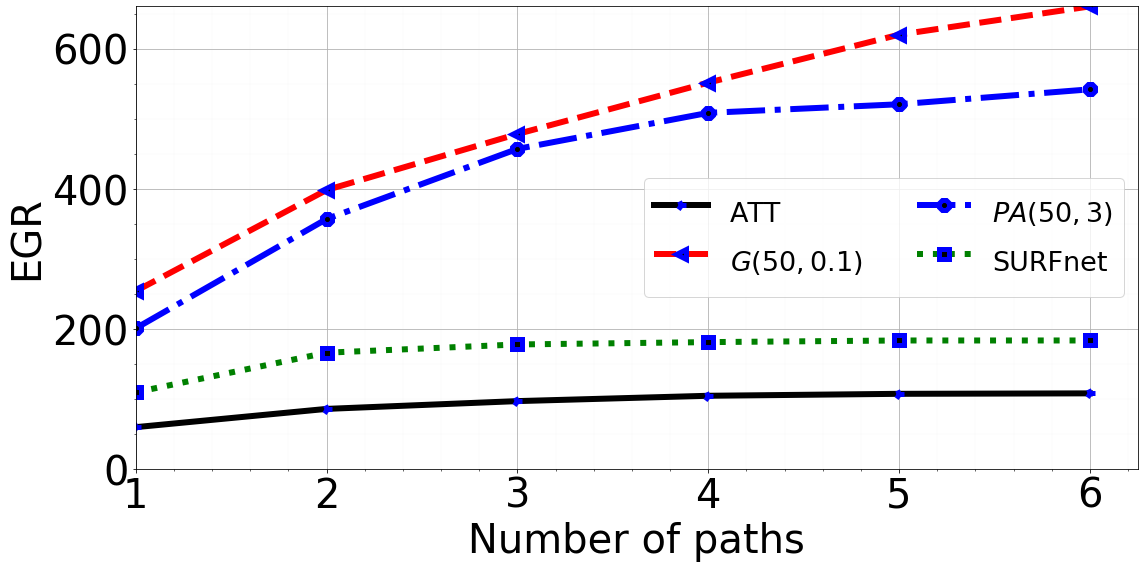

available_networks ['Abilene', 'G_n_p_0.05', 'G_n_m_2', 'ATT', 'G_n_p_0.1', 'G_n_m_3', 'SURFnet', 'IBM']
each_scheme_each_storage_number_EGRs dict_keys(['Shortest disjoint paths', 'Shortest paths'])
available_networks ['Abilene', 'G_n_p_0.05', 'G_n_m_2', 'ATT', 'G_n_p_0.1', 'G_n_m_3', 'SURFnet', 'IBM']
each_scheme_each_storage_number_EGRs dict_keys(['Shortest disjoint paths', 'Shortest paths'])
available_networks ['Abilene', 'G_n_p_0.05', 'G_n_m_2', 'ATT', 'G_n_p_0.1', 'G_n_m_3', 'SURFnet', 'IBM']
each_scheme_each_storage_number_EGRs dict_keys(['Shortest disjoint paths', 'Shortest paths'])
available_networks ['Abilene', 'G_n_p_0.05', 'G_n_m_2', 'ATT', 'G_n_p_0.1', 'G_n_m_3', 'SURFnet', 'IBM']
each_scheme_each_storage_number_EGRs dict_keys(['Shortest disjoint paths', 'Shortest paths'])
each_scheme_each_path_numbers_avg_EGRs {'ATT': {1: 56.17395060752755, 2: 84.06755908898894, 3: 93.84592156902859, 4: 97.41216897840444, 5: 100.67993977660022, 6: 101.26889847839239}, '$\\it{G(50,0.1)}$': 

<Figure size 576x576 with 0 Axes>

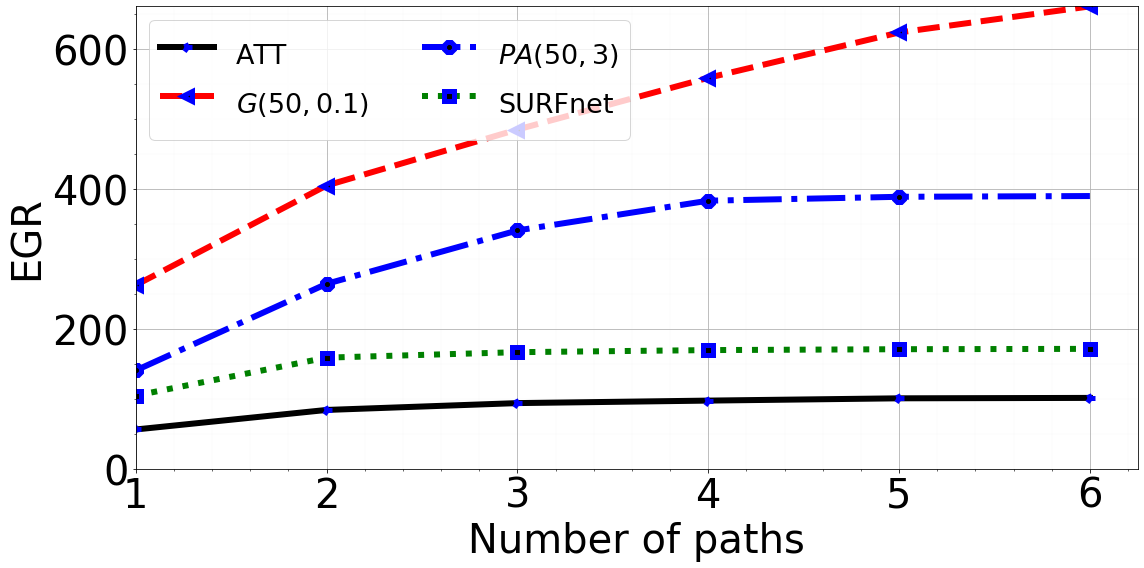

In [19]:

file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_weight_final_20_sec_interval_new_formulation_12k_joint_disjoint_paths.csv'
each_scheme_each_path_numbers_avg_EGRs = {}
schemes_title_in_order = []
each_topology_key = {'ATT':"ATT",'SURFnet':'SURFnet','G_n_p_0.1':"$\it{G(50,0.1)}$",'G_n_m_3':"$\it{PA(50,3)}$",
                    'IBM':'IBM','Abilene':'Abilene'}
all_topologies = ['Abilene', 'G_n_p_0.05', 'G_n_m_2', 'ATT', 'G_n_p_0.1', 'G_n_m_3', 'SURFnet', 'IBM']
for storage_selection in ["Degree","Random"]:
    for topology in [  'ATT', 'G_n_p_0.1' ,'G_n_m_3', 'SURFnet']:
        topology_key  = each_topology_key[topology]
        max_value_on_y_axis = 0
        for path_selection_scheme in ["Shortest paths"]:
            each_scheme_each_path_number_EGRs ,available_networks = get_each_path_selection_path_number_EGR(file_result_path,storage_selection,300)
            print("available_networks",available_networks)
            # print("each_scheme_each_storage_number_satisfying",each_scheme_each_storage_number_satisfying)
            print("each_scheme_each_storage_number_EGRs",each_scheme_each_path_number_EGRs.keys())
            num_of_paths = [1,2,3,4,5,6]
            if topology_key not in schemes_title_in_order:
                schemes_title_in_order.append(topology_key)
            for storage_num in [4]:

                    #print("topology is",topology)
                    for storage_capacity in [12000]:
                        each_scheme_each_storage_numbers_avg_EGRs = {}
                        for threshold_range in [0.8]:
                            for n_path in num_of_paths:
                                try:
                                    EGRs = each_scheme_each_path_number_EGRs[path_selection_scheme][topology][storage_capacity][threshold_range][n_path][storage_num]
                                except ValueError:
                                    print(ValueError)
                                    EGRs = [0]
                                new_EGRs =[]
                                for EGR in EGRs:
                                    new_EGRs.append(EGR)
                                EGRs = new_EGRs
                                avg_EGRs = sum(EGRs)/len(EGRs)
                                if avg_EGRs>max_value_on_y_axis:
                                    max_value_on_y_axis = avg_EGRs

                                try:
                                    each_scheme_each_path_numbers_avg_EGRs[topology_key][n_path] = avg_EGRs
                                except:
                                    each_scheme_each_path_numbers_avg_EGRs[topology_key]={}
                                    each_scheme_each_path_numbers_avg_EGRs[topology_key][n_path] = avg_EGRs
    max_value_on_y_axis = 0
    for scheme,path_number_value in each_scheme_each_path_numbers_avg_EGRs.items():
        for p,value in path_number_value.items():
            if value >max_value_on_y_axis:
                max_value_on_y_axis = value
    print("each_scheme_each_path_numbers_avg_EGRs",each_scheme_each_path_numbers_avg_EGRs)
    print("max_value_on_y_axis",max_value_on_y_axis)
    print("schemes_title_in_order",schemes_title_in_order)
    ploting_simple_y_as_x("Number of paths",'EGR',
                          min(num_of_paths),max_value_on_y_axis,
                          list(schemes_title_in_order),
                          each_scheme_each_path_numbers_avg_EGRs,
                          num_of_paths,num_of_paths,
                          False,"plots/EGR_as_number_of_paths_scheme_"+storage_selection+"_all.pdf")


In [ ]:
file_result_path = '../quantum_storage/results_file_changing_population.csv'
for spike_mean in [300]:
#     file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_population.csv'
    file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_weight2.csv'# for what we have in the paper
    file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_weight_final.csv'
    file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_weight_final_20_sec_interval_new_formulation_12k_disjoint_exp.csv'
    each_scheme_each_path_storage_number_shareds,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities = get_each_scheme_shared(file_result_path,spike_mean)
    print("available_networks",available_networks)
    num_of_paths = [1]
    for n_path in num_of_paths:
        for storage_capacity in [12000]:
            each_topology_shared_edges = {}
            for topology in list(available_networks):
                print("topology is",topology)
                if topology in ['Abilene', 'ATT', 'SURFnet', 'IBM'] or 1==1:
                    if topology in ['Abilene', 'ATT', 'SURFnet', 'IBM']:
                        topology_type = "Real"
                    else:
                        topology_type = "Random"

                    for threshold_range in [0.8]:
                        exp_counter = 0
                        for scheme_key in each_scheme_each_path_storage_number_shareds:
                            #print("capacity %s topology %s for scheme %s ,threshold_range %s"%(storage_capacity,topology, scheme_key,threshold_range))
                            if "One" not in scheme_key and "Random" not in scheme_key:
                                each_scheme_each_storage_number_EGR = {}
                                x_axis_max_value = 0
                                number_of_storages.sort()
                                y_axis_labels=[]
                                x_axis_data=[]
                                for storage_num in number_of_storages:
                                    if storage_num in [8]:
                                        #print("for topology %s spike mean %s  capacity %s threshold %s scheme %s storage %s"
                                         #    %(topology,spike_mean,storage_capacity,threshold_range,scheme_key,storage_num))
                                        #print("each_scheme_each_storage_number_satisfying",each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][n_path])
                                        #print(each_scheme_each_path_storage_number_shareds[scheme_key][topology][storage_capacity][threshold_range][n_path].keys())
                                        try:
                                            avg_shared_edges =each_scheme_each_path_storage_number_shareds[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num]
                                        except ValueError:
                                            print(ValueError)
                                            EGRs = [0]
                                        try:
                                            each_topology_shared_edges[topology_type]=avg_shared_edges
                                        except:

                                            each_topology_shared_edges[topology_type] =avg_shared_edges
                                        
                                        
cdf_info_dictionary_over_multi_item = {}
# print("each_topology_shared_edges",each_topology_shared_edges)
for scheme, shareds in each_topology_shared_edges.items():
    #cdf_info_dictionary_over_multi_item[scheme][0] = 0
    for shared in shareds:
        try:
            cdf_info_dictionary_over_multi_item[scheme][shared] =cdf_info_dictionary_over_multi_item[scheme][shared] +1
        except:
            try:
                cdf_info_dictionary_over_multi_item[scheme][shared] = 1
            except:
                cdf_info_dictionary_over_multi_item[scheme] = {}
                #print("scheme, shared",scheme,shared)
                cdf_info_dictionary_over_multi_item[scheme][shared] = 1
list_of_keys = list(each_topology_shared_edges.keys())
min_value = 0
max_value = 0
for scheme, reductions in each_topology_shared_edges.items():
    print(scheme,min(reductions), max(reductions),reductions)
    if min(reductions)<min_value:
        min_value = min(reductions)
    if  max(reductions)>max_value:
        max_value =  max(reductions)
y_min_value= 0.0
y_max_value = 1.0

multiple_lines_cdf("Fraction of workloads",'Requests share one edge',cdf_info_dictionary_over_multi_item,False,'plots/Distribution_on_shared_edges.pdf',list_of_keys,y_min_value,y_max_value)

                                        
                                        
                                        
                                        
                                        

In [ ]:
x_axis_values_in_order = [0.7,0.8,0.92,0.94,0.96,0.98]
schemes_in_order = ["EPR pairs delivered","EPR pairs used for purification"]
given_scheme_each_x_axis_point_value_for_each_bar = {
                                "EPR pairs delivered":{0.7:4,0.8:6,0.92:8,0.94:10,0.96:12,0.98:14},
                                 "EPR pairs used for purification":{0.7:8,0.8:12,0.92:16,0.94:20,0.96:24,0.98:30}}
file_result_path = "../quantum_storage/results/results_utilization_final_20_sec_interval_new_formulation.csv"
for spike_mean in [400]:
    available_topologies,x_axis_values_in_order,each_topology_plot_name,each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold = each_experiment_storage_utilization(file_result_path,spike_mean)
    print("available_topologies",available_topologies)
    available_paths = [1]
    avaiable_storage_numbers = [4]
    avaiable_storage_capacities = [12000]
    
    for each_topology in available_topologies:
        for each_storage_capacity in avaiable_storage_capacities:
            for num_paths in available_paths:
                each_storage_number_each_threshold_utilization = {}
                schemes_in_order = []
                threshold_ranges = []
                y_axis_max_value = 0
                for storage_numbers in [2,4,6,8]:
                    scheme_key = "# of storage pairs="+str(storage_numbers)
                    print(len(list(each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology].keys())))
                    if len(list(each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology].keys())):
                        for scheme in each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology].keys():
                            threshold_value_values = each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][scheme][each_storage_capacity][num_paths][storage_numbers]["EPR pairs delivered"]



                            if scheme not in schemes_in_order:
                                schemes_in_order.append(scheme)
                            for threshold,values in threshold_value_values.items():
                                #print("threshold",threshold)
                                if sum(values)/len(values)>y_axis_max_value:
                                    y_axis_max_value = sum(values)/len(values)
                                if threshold not in threshold_ranges:
                                    threshold_ranges.append(threshold)
                                try:
                                    each_storage_number_each_threshold_utilization[scheme_key][threshold] = sum(values)/len(values)
                                except:
                                    each_storage_number_each_threshold_utilization[scheme_key]={}
                                    each_storage_number_each_threshold_utilization[scheme_key][threshold] = sum(values)/len(values)
                    #threshold_ranges = list(each_topology_each_scheme_storage_capacity_each_path_each_storage_threshold[each_topology][each_scheme][each_storage_capacity][num_paths][storage_numbers].keys())
                    #print("list of x axis values ",threshold_ranges)
                    threshold_ranges.sort()
                    #print("list of x axis values ",threshold_ranges)
                    #print("schemes_in_order",schemes_in_order)
                    #print("dictionary keys ",list(given_scheme_each_x_axis_point_value_for_each_bar.keys()))
                    #print("given_scheme_each_x_axis_point_value_for_each_bar",given_scheme_each_x_axis_point_value_for_each_bar)
#                     for s in given_scheme_each_x_axis_point_value_for_each_bar:
#                         for point in threshold_ranges:
#                             print("scheme %s point %s value %s "%(s,point,given_scheme_each_x_axis_point_value_for_each_bar[s][point]))
#                     stacked_bar_chart("Fidelity threshold"," Storage utilization",
#                     threshold_ranges,schemes_in_order,
#                      given_scheme_each_x_axis_point_value_for_each_bar,
#                     "plots/"+each_topology_plot_name[each_topology][each_storage_capacity][storage_numbers])
                print("for spike %s topology %s storage capacity %s we have "%(spike_mean,each_topology,each_storage_capacity))
                set_legend_flag = True
                legend_inside_plot_flag = True
                plot_bar_plot("Fidelity threshold",'Average utilization',
                                          each_storage_number_each_threshold_utilization,threshold_ranges,
                                  "plots/Bar_plot_"+str(spike_mean)+"_"+each_topology_plot_name[each_topology][each_storage_capacity][storage_numbers],
                             y_axis_max_value,1,set_legend_flag,legend_inside_plot_flag)
                        
                        

avaiable_spike_mean_values [400]
available_networks ['G_n_p_0.05', 'G_n_m_2', 'G_n_p_0.1', 'G_n_m_3']
*************** for capacity  12000
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_p_0.05 capacity 12000 spike 400 storage 0 we have 25 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_p_0.05 capacity 12000 spike 400 storage 2 we have 30 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_p_0.05 capacity 12000 spike 400 storage 4 we have 39 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_p_0.05 capacity 12000 spike 400 storage 6 we have 44 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_p_0.05 capacity 12000 spike 400 storage 8 we have 47 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_p_0.05 capacity 12000 spike 400 stora

<Figure size 576x576 with 0 Axes>

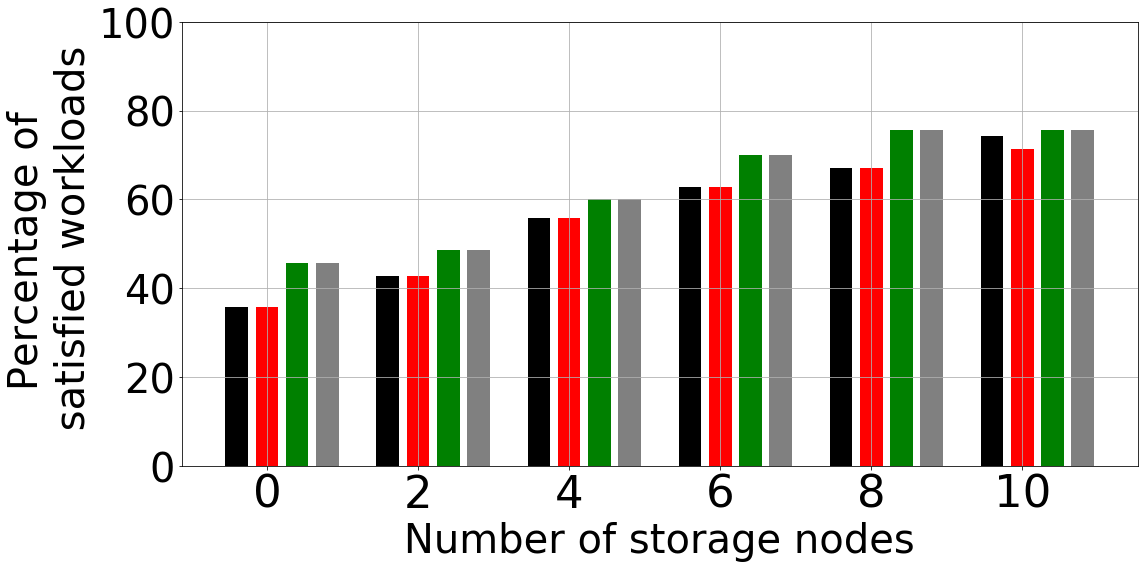

for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_m_2 capacity 12000 spike 400 storage 0 we have 41 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_m_2 capacity 12000 spike 400 storage 2 we have 44 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_m_2 capacity 12000 spike 400 storage 4 we have 60 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_m_2 capacity 12000 spike 400 storage 6 we have 66 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_m_2 capacity 12000 spike 400 storage 8 we have 68 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_m_2 capacity 12000 spike 400 storage 10 we have 68 satisfied from 70 available
for #paths 1 scheme h =1, $\it{Random}$ threshold 0.8 topology G_n_m_2 capacity 12000 spike 400 storage 0 we ha

<Figure size 576x576 with 0 Axes>

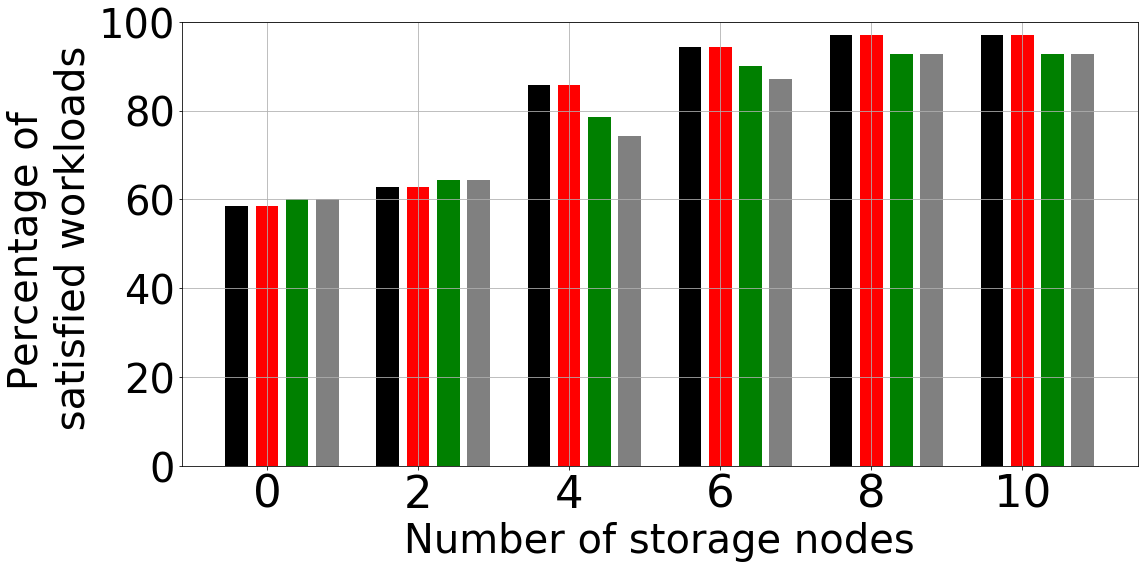

for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_p_0.1 capacity 12000 spike 400 storage 0 we have 32 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_p_0.1 capacity 12000 spike 400 storage 2 we have 35 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_p_0.1 capacity 12000 spike 400 storage 4 we have 52 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_p_0.1 capacity 12000 spike 400 storage 6 we have 62 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_p_0.1 capacity 12000 spike 400 storage 8 we have 64 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_p_0.1 capacity 12000 spike 400 storage 10 we have 65 satisfied from 70 available
for #paths 1 scheme h =1, $\it{Random}$ threshold 0.8 topology G_n_p_0.1 capacity 12000 spike 400 s

<Figure size 576x576 with 0 Axes>

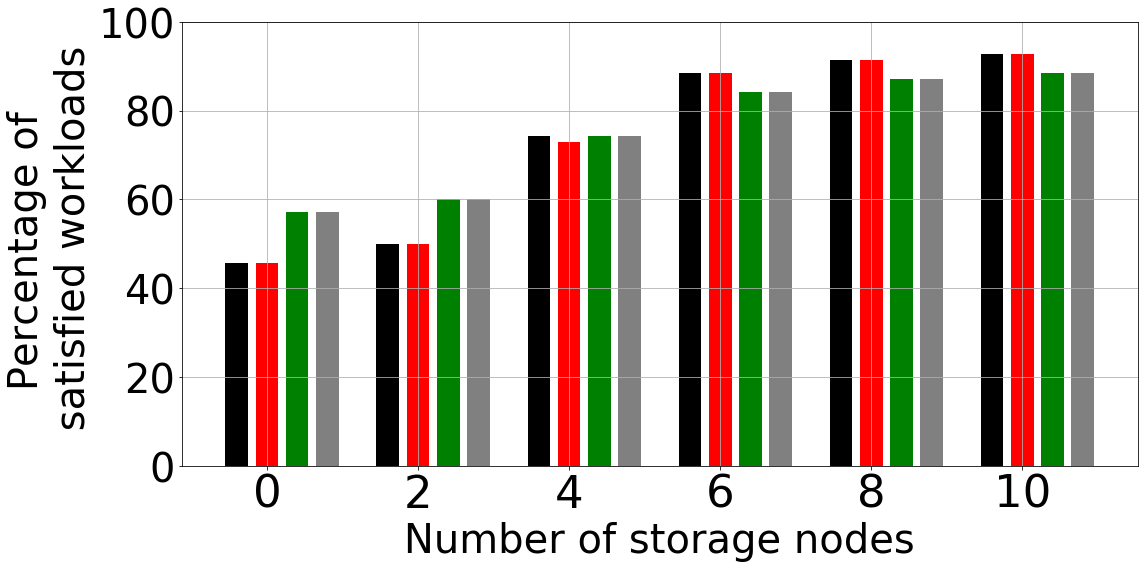

for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_m_3 capacity 12000 spike 400 storage 0 we have 34 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_m_3 capacity 12000 spike 400 storage 2 we have 38 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_m_3 capacity 12000 spike 400 storage 4 we have 51 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_m_3 capacity 12000 spike 400 storage 6 we have 61 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_m_3 capacity 12000 spike 400 storage 8 we have 64 satisfied from 70 available
for #paths 1 scheme h ≥ |T|, $\it{Random}$ threshold 0.8 topology G_n_m_3 capacity 12000 spike 400 storage 10 we have 65 satisfied from 70 available
for #paths 1 scheme h =1, $\it{Random}$ threshold 0.8 topology G_n_m_3 capacity 12000 spike 400 storage 0 we ha

<Figure size 576x576 with 0 Axes>

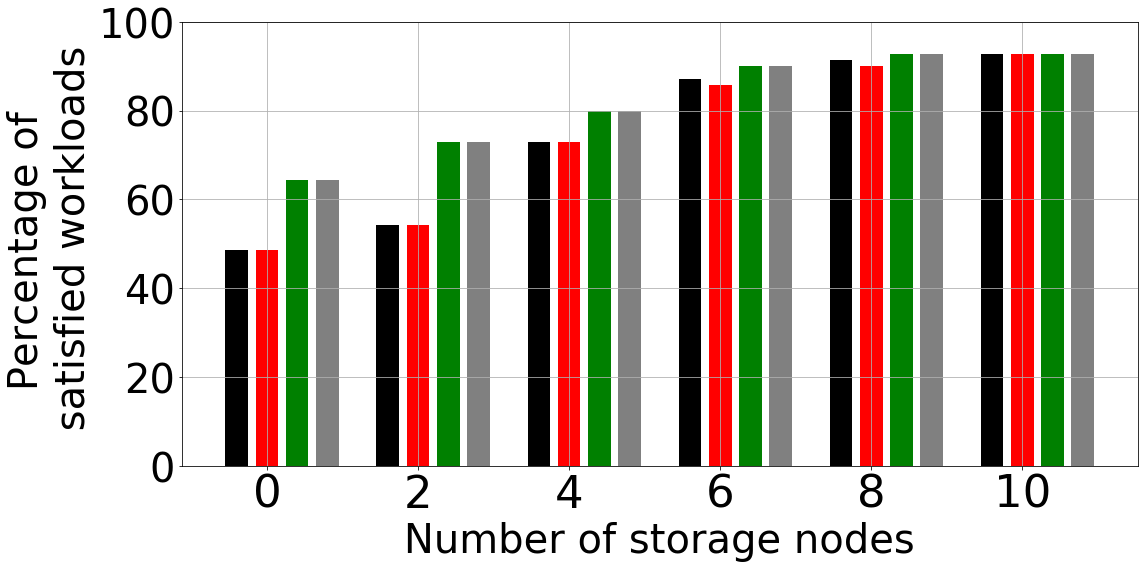

In [21]:
file_result_path = '../quantum_storage/results/results_feasibility_final.csv'
file_result_path='../quantum_storage/results/results_feasibility_final_20_sec_interval_new_formulation.csv'
avaiable_spike_mean_values= [400]
# avaiable_spike_mean_values = get_avaiable_spike_mean_values(file_result_path)
print("avaiable_spike_mean_values",avaiable_spike_mean_values)
for spike_mean in avaiable_spike_mean_values:
    each_scheme_each_storage_number_satisfying , each_topology_each_storage_available,each_topology_plot_name,number_of_storages, threshold_ranges,available_networks,available_storage_capacities = get_each_scheme_available_satisfied(file_result_path,spike_mean)
    print("available_networks",available_networks)

#     print(list(each_scheme_each_storage_number_satisfying.keys()))
#     print(threshold_ranges,available_networks)
    

    # print('each_scheme_each_storage_number_satisfying',each_scheme_each_storage_number_satisfying)
    # print('num_of_paths',num_of_paths)
    # print('number_of_storages',number_of_storages)
    # print("each_topology_each_storage_available",each_topology_each_storage_available)
    indx =0
    num_of_paths = [1]
    for n_path in num_of_paths:
        for storage_capacity in [12000]:
            print("*************** for capacity ",storage_capacity)
            for topology in list(available_networks):
                #print("topology is",topology)
                if topology=="SURFnet" or 1==1:
                    try:
                        for threshold_range in [0.8]:
                            #print("threshold",threshold_range)
                            selected_storage_numbers = []
                            each_life_time_each_storage_numbers_satisfying_percentage = {}
                            each_scheme_each_storage_numbers_satisfying_percentage = {}
                            for scheme_key in each_scheme_each_storage_number_satisfying:
                                #print("for scheme ",scheme_key)
                                each_scheme_each_storage_numbers_satisfying_percentage[scheme_key] = {}

                                for storage_num in number_of_storages:
                                    if storage_num in [0,2,4,6,8,10]:
                                        if storage_num not in selected_storage_numbers:
                                            selected_storage_numbers.append(storage_num)
                    #                     print("storage nodes ",storage_num)
                    #                     print(each_topology_each_storage_available[scheme_key][topology][threshold_range][n_path][storage_num])

                                        try:
                                            all_solutions =each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num]
                                        except:
                                            #print(ValueError)
    #                                         print("we did not have SURFnet for scheme %s topology %s  capacity %s threshold %s n_path %s storage_num %s"%(scheme_key,topology,storage_capacity,threshold_range,n_path,storage_num))
    #                                         print("each_scheme_each_storage_number_satisfying[scheme_key]",scheme_key,each_scheme_each_storage_number_satisfying[scheme_key])
                                            all_solutions=0
                                        try:
                                            satisfied_work_loads = len(each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num])
                                        except:
                                            #print(ValueError)
                                            satisfied_work_loads = 0
                                        if all_solutions==0:
                                            satisfied_percentage=0
                                        else:
                                            satisfied_percentage = (satisfied_work_loads/all_solutions)*100
                                        print("for #paths %s scheme %s threshold %s topology %s capacity %s spike %s storage %s we have %s satisfied from %s available"%(n_path,scheme_key,threshold_range,topology,storage_capacity,spike_mean,storage_num,satisfied_work_loads,all_solutions))
                                        each_scheme_each_storage_numbers_satisfying_percentage[scheme_key][storage_num] = satisfied_percentage
                    #                 each_scheme_each_storage_numbers_satisfying_percentage[scheme_key][storage_num] = 1

    #                         print("each_scheme_each_storage_numbers_satisfying_percentage",each_scheme_each_storage_numbers_satisfying_percentage)    
    #                         print("each_topologmy_plot_name",each_topology_plot_name[topology].keys())
                            #if each_scheme_each_storage_numbers_satisfying_percentage:
                            #print("each_scheme_each_storage_numbers_satisfying_percentage",each_scheme_each_storage_numbers_satisfying_percentage)
                            selected_storage_numbers.sort()
                            #print("each_topology_plot_name[topology][threshold_range]",each_topology_plot_name[topology][threshold_range])
                            print("each_topology_plot_name[topology]",each_topology_plot_name[topology].keys())
                            if topology in ["ATT","IBM","Abilene","SURFnet"]:
                                set_legend_flag = True
                            else:
                                set_legend_flag=False
                            legend_inside_plot_flag = False
                            try:
                                plot_bar_plot("Number of storage nodes",'Percentage of \n satisfied workloads',
                                              each_scheme_each_storage_numbers_satisfying_percentage,selected_storage_numbers,
                                              "plots/"+each_topology_plot_name[topology][threshold_range][storage_capacity],
                                             100,2,set_legend_flag,legend_inside_plot_flag)
                            except ValueError:
                                print(ValueError)
                                pass
                    except ValueError:
                        print(ValueError)
                        pass
    

In [ ]:
file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_weight_final_20_sec_interval_final.csv'

for spike_mean in [400]:
    each_scheme_each_path_storage_number_EGRs,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities = get_each_scheme_EGR(file_result_path,spike_mean)
    print("available_networks",available_networks)
    num_of_paths = [1,2,3,4,5]
    
    for storage_capacity in [1000]:
        for topology in list(available_networks):
            print("topology is",topology)
            for threshold_range in [0.8]:
                for storage_num in [4]:
                    y_axis_max_value = 0
                    each_scheme_each_path_EGR = {}
                    num_of_paths.sort()
                    print("for storage #",storage_num)
                    for scheme_key in each_scheme_each_path_storage_number_EGRs:
                        if "One" in scheme_key and "Degree" in scheme_key:
                            new_scheme_key = "One,Degree"
                        elif "Inf" in scheme_key and "Degree" in scheme_key:
                            new_scheme_key = "Inf,Degree"
                        elif "One" in scheme_key and "Random" in scheme_key:
                            new_scheme_key = "One,Random"
                        elif "Inf" in scheme_key and "Random" in scheme_key:
                            new_scheme_key = "Inf,Random"
                        for n_path in num_of_paths:
                            try:
                                EGRs =each_scheme_each_path_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num]
                            except ValueError:
                                print(ValueError)
                                EGRs = [0]

                            new_EGRs = []
                            for EGR in EGRs:
                                EGR = EGR/100
                                new_EGRs.append(EGR)


                            
                            if sum(new_EGRs)/len(new_EGRs)> y_axis_max_value:
                                    y_axis_max_value = sum(new_EGRs)/len(new_EGRs)
                            #print("for storage %s we have %s"%(storage_num,new_EGRs))
                            try:
                                each_scheme_each_path_EGR[new_scheme_key][n_path] = sum(new_EGRs)/len(new_EGRs)
                            except:
                                each_scheme_each_path_EGR[new_scheme_key]={}
                                each_scheme_each_path_EGR[new_scheme_key][n_path] = sum(new_EGRs)/len(new_EGRs)
                    #x_axis_max_value = 4
                    print("each_scheme_each_path_EGR",each_scheme_each_path_EGR)
                    try:
                        plot_bar_plot("Number of paths",'EGR(in houndred)',
                                      each_scheme_each_path_EGR,num_of_paths,
                                      "plots/bar_plot_EGR_as_path_numbers_"+topology+"_"+str(storage_num)+".pdf",
                                     y_axis_max_value+10,2)
                    except ValueError:
                        print(ValueError)
                        pass

In [ ]:

# all_data = [[1,20,30,40,30,20,2,4],[10,30,4,20,30,3,3,20,2],[1,1,10,10,10,10,2,3,3,3,2,2],[30,20,3,20,3,20,3,2,3,2,3,2,1]]
# labels = ['0', '1', '2','3']
# horizontal_box_plat("Storage nodes",all_data,labels,"plots/box_plot_cartoon.pdf")
file_result_path = '../quantum_storage/results_file_changing_population.csv'
for spike_mean in [300]:
#     file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_population.csv'
    file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_weight2.csv'# for what we have in the paper
    file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_weight_final.csv'
    file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_weight_final_20_sec_interval_new_formulation_12k.csv'
    each_scheme_each_path_storage_number_EGRs,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities = get_each_scheme_EGR(file_result_path,spike_mean)
    print("available_networks",available_networks)
    num_of_paths = [1]
    for n_path in num_of_paths:
        for storage_capacity in [12000]:
            for topology in list(available_networks):
                #print("topology is",topology)
                for threshold_range in [0.8]:
                    exp_counter = 0
                    for scheme_key in each_scheme_each_path_storage_number_EGRs:
                        print("capacity %s topology %s for scheme %s ,threshold_range %s"%(storage_capacity,topology, scheme_key,threshold_range))
                        if "One" not in scheme_key and "Random" not in scheme_key:
                            each_scheme_each_storage_number_EGR = {}
                            x_axis_max_value = 0
                            number_of_storages.sort()
                            y_axis_labels=[]
                            x_axis_data=[]
                            for storage_num in number_of_storages:
                                if storage_num in [0,2,4,6,8,10]:
                                    
                                    
                                    #print("for topology %s spike mean %s  capacity %s threshold %s scheme %s storage %s"
                                     #    %(topology,spike_mean,storage_capacity,threshold_range,scheme_key,storage_num))
                                    #print("each_scheme_each_storage_number_satisfying",each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][n_path])
                                    try:
                                        EGRs =each_scheme_each_path_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num]
                                    except ValueError:
                                        print(ValueError)
                                        EGRs = [0]
                                    if len(EGRs)>exp_counter:
                                        exp_counter = len(EGRs)
                                    y_axis_labels.append(storage_num)
                                    new_EGRs = []
                                    for EGR in EGRs:
                                        
                                        EGR = EGR/100
                                        if topology in ["ATT","Abilene","IBM","SURFnet"]:
                                            upper_bound = 2
                                        else:
                                            upper_bound = 5
                                        if EGR <= upper_bound:
                                            if EGR> x_axis_max_value:
                                                x_axis_max_value = EGR
                                            new_EGRs.append(EGR)
                                    x_axis_data.append(new_EGRs)
                                    new_EGRs.sort()
                            x_axis_max_value = 5
                            print("for topology %s scheme %s threshod %s exp_counter %s"%(topology,scheme_key,threshold_range,exp_counter))
                            horizontal_box_plat("EGR (in hundreds)","",x_axis_data,y_axis_labels,x_axis_max_value,
                                            "plots/horizontal_box_plot_topology_"+each_topology_plot_name[topology][threshold_range][storage_capacity]+".pdf")
                                                                                                

In [ ]:
for spike_mean in [300]:
    file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_weight2.csv'
    file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_weight_final.csv'
    file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_weight_final_20_sec_interval_new_formulation_12k.csv'
    each_scheme_each_storage_number_EGRs ,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities = get_each_scheme_EGR(file_result_path,spike_mean)
    print("available_networks",available_networks)
    # print("each_scheme_each_storage_number_satisfying",each_scheme_each_storage_number_satisfying)
    print("each_scheme_each_storage_number_EGRs",each_scheme_each_storage_number_EGRs.keys())
    

    indx =0
    num_of_paths = [1]
    threshold_ranges.sort()
    for n_path in num_of_paths:
        for storage_num in [4]:
            for topology in list(available_networks):
                print("topology is",topology)
                if topology =="SURFnet":
                    for storage_capacity in [12000]:
                        each_scheme_each_storage_numbers_avg_EGRs = {}
                        schemes_title_in_order = []
                        max_value_on_y_axis = 0
                        selected_thresholds = []
                        for scheme_key in each_scheme_each_storage_number_EGRs:
                            #print("for scheme ",scheme_key)
                            if "Random" in scheme_key and "One" not in scheme_key or 1==1:
                                for threshold_range in threshold_ranges:
                                    if threshold_range>=0.6:
                                        if threshold_range not in selected_thresholds:
                                            selected_thresholds.append(threshold_range)
                                        #print("threshold",threshold_range)
                                        if scheme_key not in schemes_title_in_order:
                                            schemes_title_in_order.append(scheme_key)

                                        #print("each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity]",each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity])
                                        try:
                                            #print("scheme_key][topology][storage_capacity",scheme_key,topology,storage_capacity)
                                            #print(each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity].keys())
                                            EGRs = each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num]
                                        except ValueError:

                                            print(ValueError)

                                            EGRs = [0]
                                        new_EGRs =[]
                                        for EGR in EGRs:
                                            new_EGRs.append(EGR/100)
                                        EGRs = new_EGRs
                                        if max(EGRs)>max_value_on_y_axis:
                                            max_value_on_y_axis = max(EGRs)
                                            
                                        avg_EGRs = sum(EGRs)/len(EGRs)
                                        try:
                                            each_scheme_each_storage_numbers_avg_EGRs[scheme_key][threshold_range] = avg_EGRs
                                        except:
                                            each_scheme_each_storage_numbers_avg_EGRs[scheme_key]={}
                                            each_scheme_each_storage_numbers_avg_EGRs[scheme_key][threshold_range] = avg_EGRs
                                    #print("for storage_capacity %s topology %s scheme %s storage %s and range %s we have %s"%
    #                                       (topology, scheme_key,storage_num,threshold_range,avg_EGRs))
                                    #time.sleep(3)
                    #                 each_scheme_each_storage_numbers_satisfying_percentage[scheme_key][storage_num] = 1

        #         print("each_scheme_each_storage_numbers_satisfying_percentage",each_scheme_each_storage_numbers_satisfying_percentage)    
                    selected_thresholds.sort()
                    print("for storage_num %s capacity %s topology %s for selected_thresholds %s"%(storage_num,storage_capacity,topology,selected_thresholds))
#                     for scheme in schemes_title_in_order:
#                         for threshold_range in threshold_ranges:
#                             print("for scheme %s range %s we have %s "%(scheme,threshold_range,each_scheme_each_storage_numbers_satisfying_percentage[scheme][threshold_range]))
#                             print(threshold_range,each_scheme_each_storage_numbers_satisfying_percentage[scheme].keys())
                    ploting_simple_y_as_x("Fidelity threshold",'EGR (in hundreds)',
                                          min(selected_thresholds),max_value_on_y_axis,
                                          list(schemes_title_in_order),
                                          each_scheme_each_storage_numbers_avg_EGRs,
                                          selected_thresholds,selected_thresholds,
                                          False,"plots/EGR_as_threshold_range_"+topology+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf")



In [ ]:
# for spike_mean in [300,320,200,330,340,350]:
for chosen_topologies in [["ATT","Abilene","SURFnet","IBM"],['G_n_p_0.05', 'G_n_p_0.1', 'G_n_m_2', 'G_n_m_3']]:
    schemes_title_in_order = []
    each_scheme_each_storage_numbers_satisfying_percentage = {}
    for spike_mean in [200]:
        
        
        file_result_path = '../quantum_storage/results/results_feasibility_final_capacity.csv'
        each_scheme_each_storage_number_satisfying , each_topology_each_storage_available,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities = get_each_scheme_available_satisfied(file_result_path,spike_mean)
        print("available_networks",available_networks)
        print("available_storage_capacities",available_storage_capacities)
        print("threshold_ranges",threshold_ranges)
        # print("each_scheme_each_storage_number_satisfying",each_scheme_each_storage_number_satisfying)
        print("each_topology_each_storage_available",each_topology_each_storage_available.keys())
        print(list(each_scheme_each_storage_number_satisfying.keys()))
        selected_storage_capacities = []
        indx =0
        num_of_paths = [1]
        threshold_ranges.sort()
        for n_path in num_of_paths:
            for storage_num in [4]:
                for topology in list(available_networks):
                    if topology in chosen_topologies:
                        if topology=='G_n_p_0.05':
                            toplogy_title = "G(n,p=0.05)"
                        elif topology=='G_n_p_0.1':
                            toplogy_title = "G(n,p=0.1)"
                        elif topology=='G_n_m_2':
                            toplogy_title = "G(n,m=2)"
                        elif topology=='G_n_m_3':
                            toplogy_title = "G(n,m=3)"
                        else:
                            toplogy_title = topology
                        if topology=="SURFnet" or 1==1:
                            if toplogy_title not in schemes_title_in_order:
                                schemes_title_in_order.append(toplogy_title)
                            print("topology is",topology)
                            for threshold_range in [0.92]:
                                print("threshold",threshold_range)


                                for scheme_key in each_scheme_each_storage_number_satisfying:
                                    print("for scheme ",scheme_key)
                                    if "One" not in scheme_key and "Degree" in scheme_key:
                                        for storage_capacity in [50,100,200,300,400,600,800,1000,1500,2000]:
                                            if storage_capacity<=600 or 1==1:
                                                if storage_capacity not in selected_storage_capacities:
                                                    selected_storage_capacities.append(storage_capacity)
                                                try:
                                                    all_solutions =each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num]
                                                except:
                                                    all_solutions=0
                                                try:
                                                    #print(scheme_key,topology,storage_capacity,each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity].keys())
                                                    satisfied_work_loads = len(each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num])
                                                except ValueError:
                                                    print(ValueError)
                                                    satisfied_work_loads = 0
                                                if all_solutions==0:
                                                    satisfied_percentage = 0
                                                else:
                                                    satisfied_percentage = (satisfied_work_loads/all_solutions)*100
                                                try:
                                                    each_scheme_each_storage_numbers_satisfying_percentage[toplogy_title][storage_capacity] = satisfied_percentage
                                                except:
                                                    each_scheme_each_storage_numbers_satisfying_percentage[toplogy_title]={}
                                                    each_scheme_each_storage_numbers_satisfying_percentage[toplogy_title][storage_capacity] = satisfied_percentage
        #                                         print("for scheme %s storage %s and capacity %s we have  available %s satisfied %s and percentage is %s"%
        #                                               (scheme_key,storage_num,storage_capacity,all_solutions,satisfied_work_loads,satisfied_percentage))
            
    selected_storage_capacities.append(0)
    selected_storage_capacities.sort()

    for scheme in schemes_title_in_order:
        each_scheme_each_storage_numbers_satisfying_percentage[scheme][0] = 0
    print("each_scheme_each_storage_numbers_satisfying_percentage",each_scheme_each_storage_numbers_satisfying_percentage)
#                         for stor_capacity in available_storage_capacities:
#                             print("for scheme %s range %s we have %s "%(scheme,stor_capacity,each_scheme_each_storage_numbers_satisfying_percentage[scheme][stor_capacity]))
#                             print(stor_capacity,each_scheme_each_storage_numbers_satisfying_percentage[scheme].keys())
    selected_storage_capacities.sort()
    ploting_simple_y_as_x("Storage capacity",'Percentage of \n satisfied workloads',
                          min(selected_storage_capacities),100,
                          list(schemes_title_in_order),
                          each_scheme_each_storage_numbers_satisfying_percentage,
                          selected_storage_capacities,selected_storage_capacities,
                          False,"plots/feasibility_percentage_as_storage_capacity_"+chosen_topologies[0]+"_"+str(spike_mean)+"_"+str(threshold_range)+".pdf")



avaiable_spike_mean_values [350]
all_available_storage_capacities [12000]
available_topologies ['G(n,p=0.05)', 'G(n,m=2)', 'G(n,p=0.1)', 'G(n,m=3)', 'SURFnet', 'IBM', 'ATT', 'Abilene']
['G(n,p=0.05)', 'G(n,m=2)', 'G(n,p=0.1)', 'G(n,m=3)', 'SURFnet', 'IBM', 'ATT', 'Abilene'] [12000]
For topology G(n,p=0.05) we have :


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


For topology G(n,m=2) we have :


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


For topology G(n,p=0.1) we have :


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


For topology G(n,m=3) we have :


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


For topology SURFnet we have :


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


For topology IBM we have :


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


For topology ATT we have :


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


For topology Abilene we have :


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 576x576 with 0 Axes>

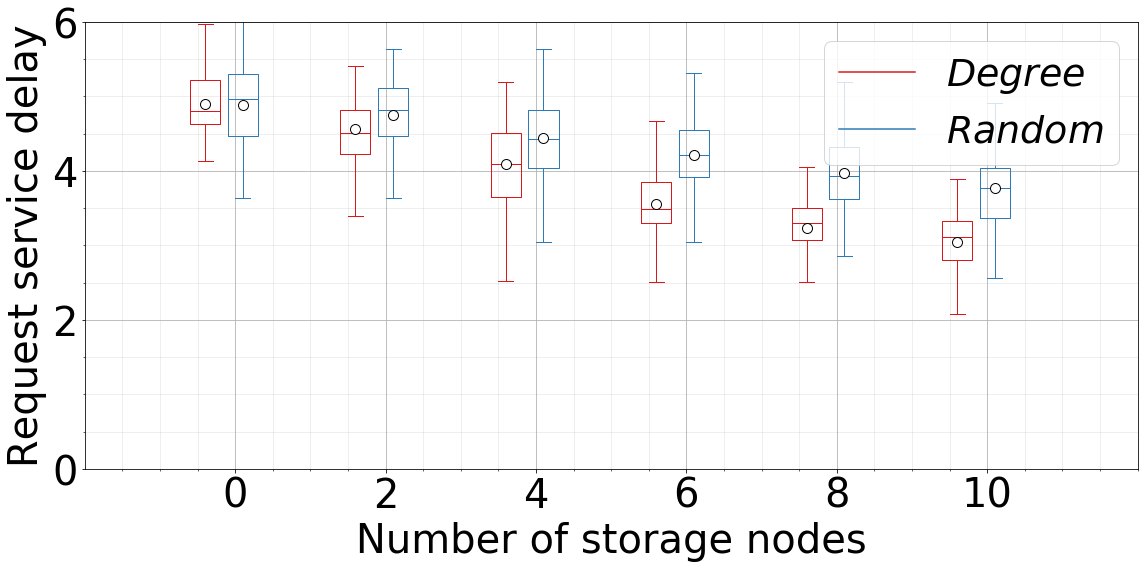

<Figure size 576x576 with 0 Axes>

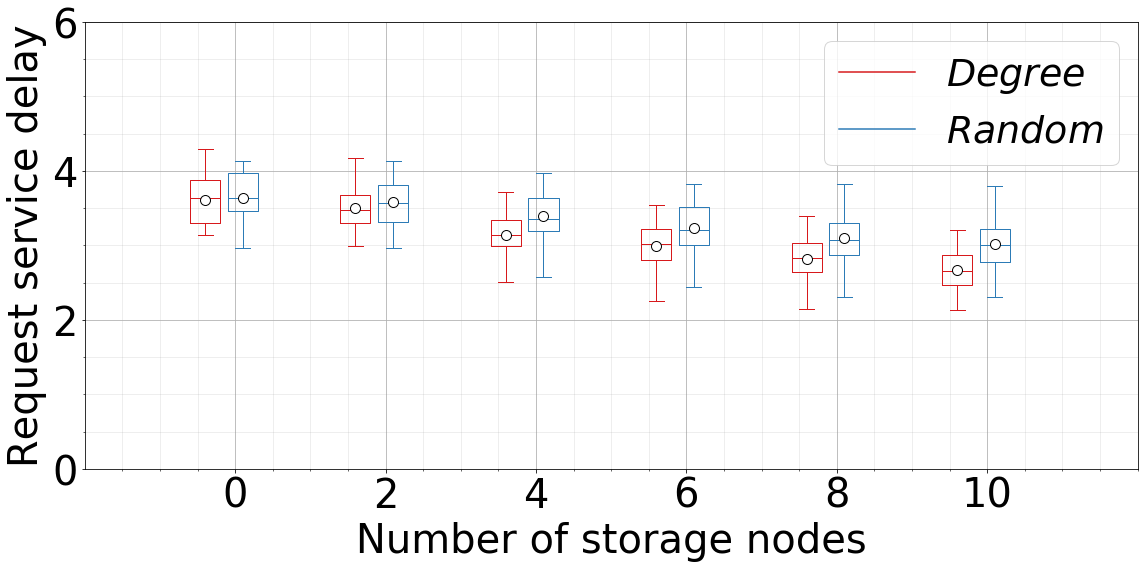

<Figure size 576x576 with 0 Axes>

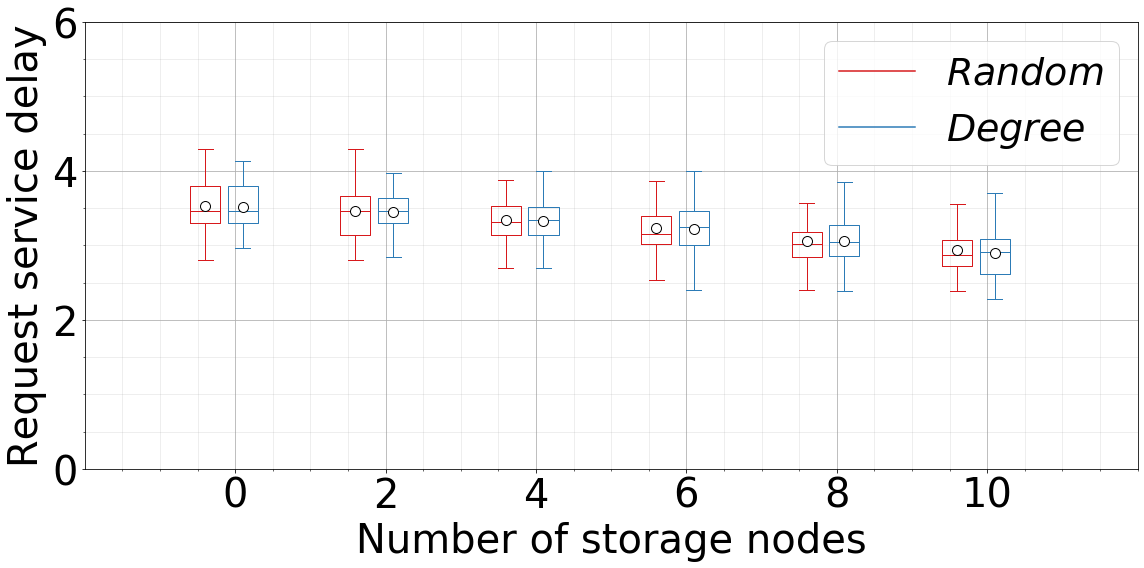

<Figure size 576x576 with 0 Axes>

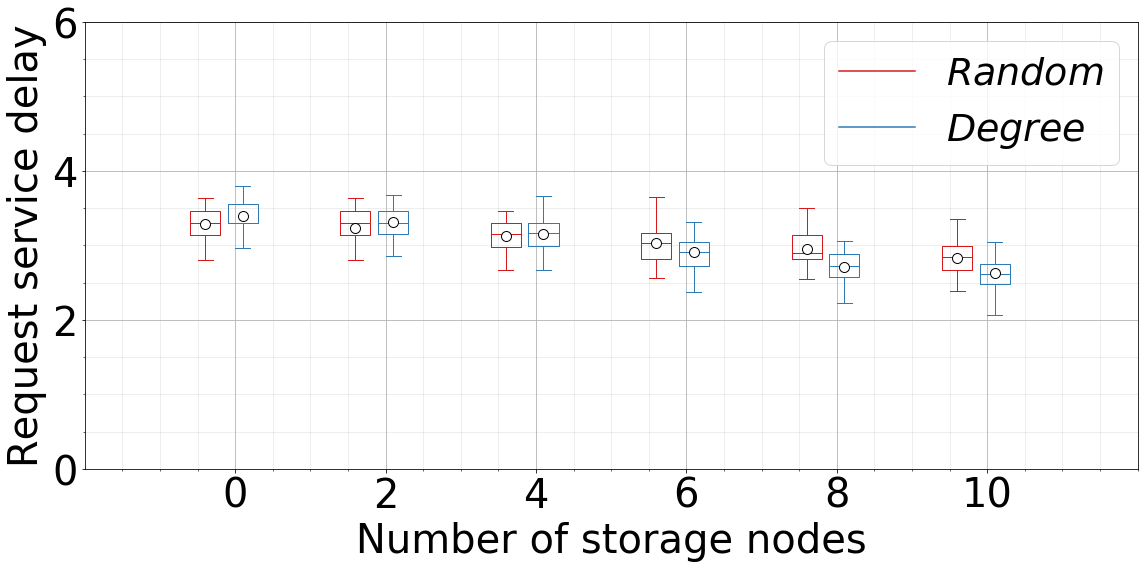

<Figure size 576x576 with 0 Axes>

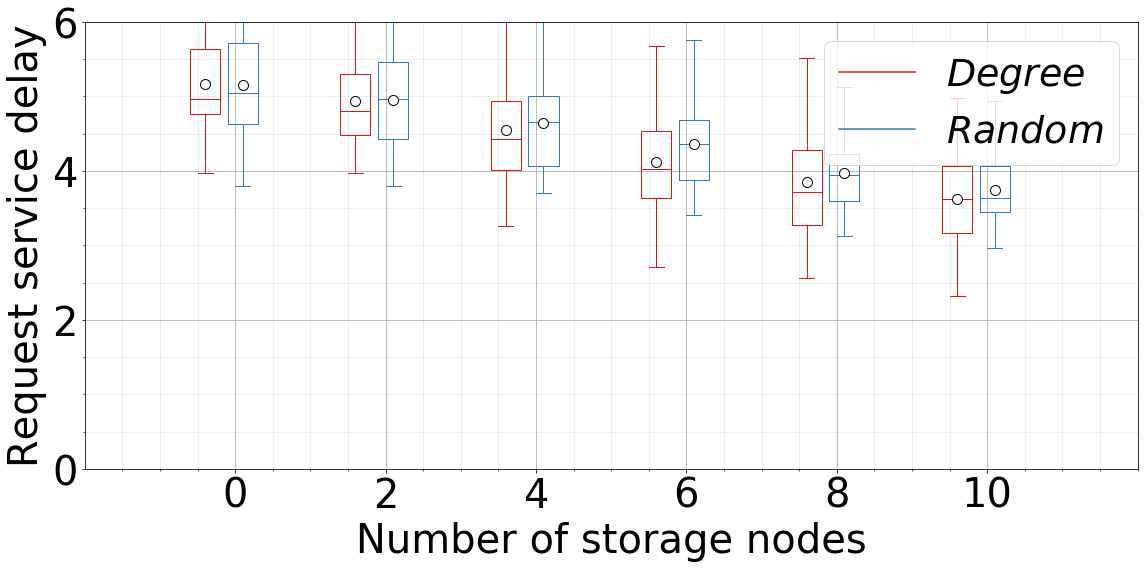

<Figure size 576x576 with 0 Axes>

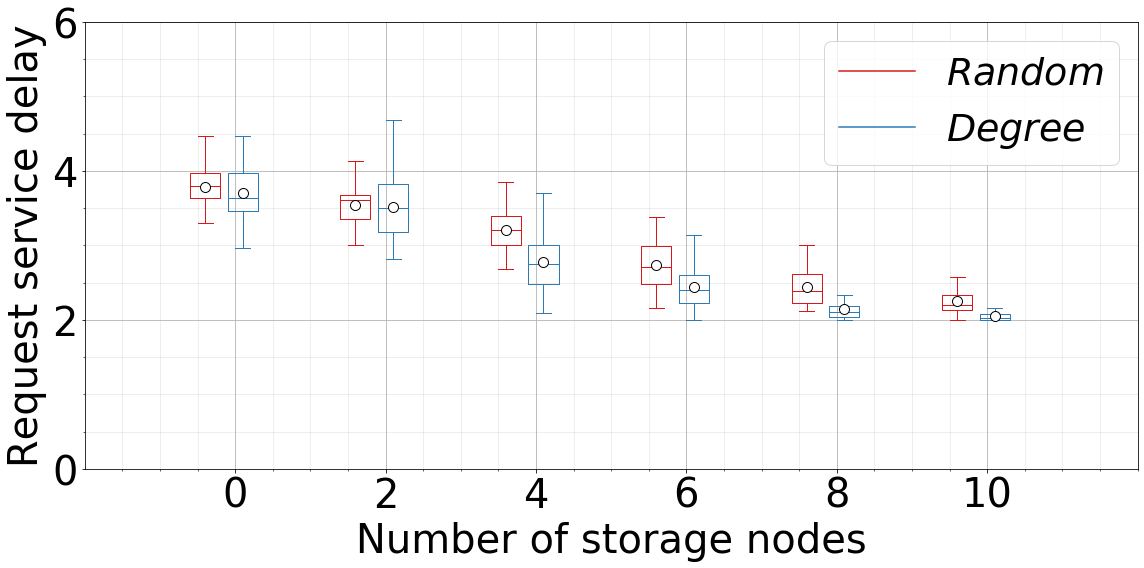

<Figure size 576x576 with 0 Axes>

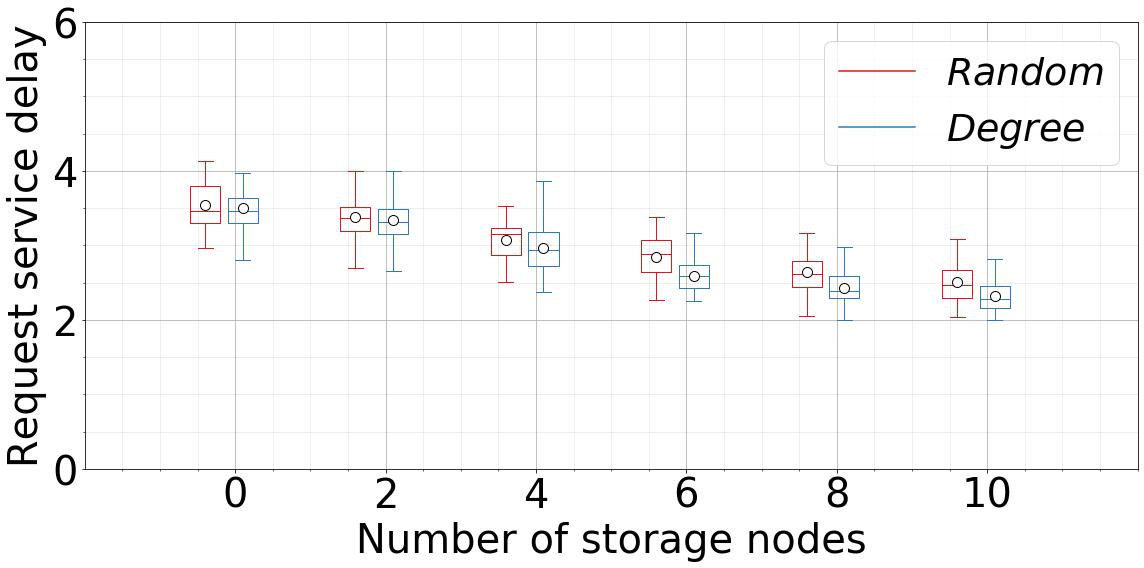

<Figure size 576x576 with 0 Axes>

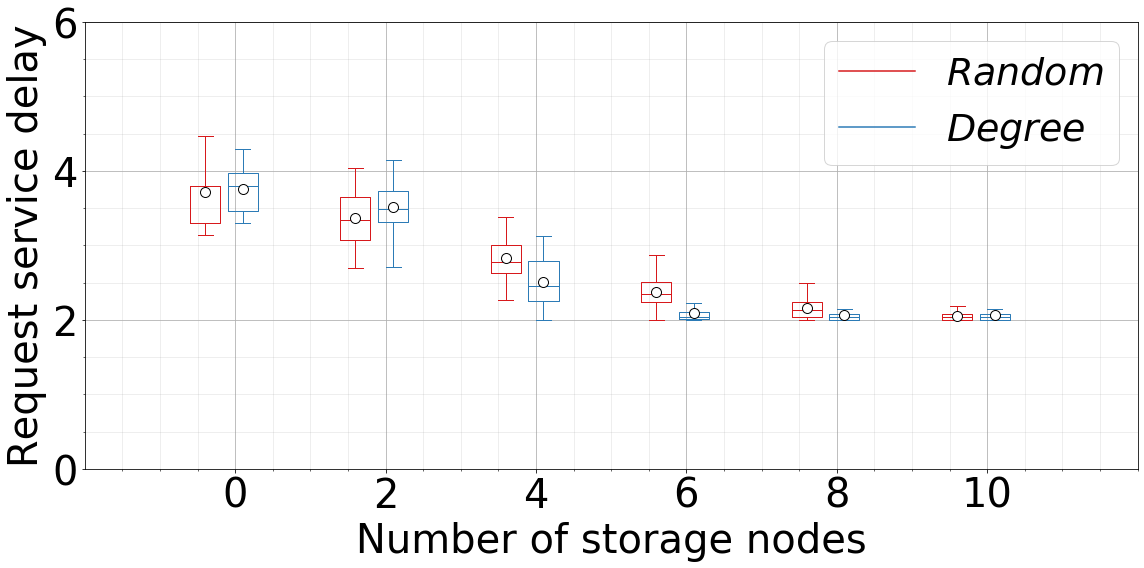

In [9]:
each_approach_events_value = {'random':[10,15,12,15,10,11,5,6,5,6,5,6,5,6,5,6,5,6,5,10,20,30,24,15,11,13,14,15,16,20,40,10,10,10]}
results_file_path = '../quantum_storage/results/results_feasibility_final.csv'
results_file_path='../quantum_storage/results/results_feasibility_final_20_sec_interval_new_formulation.csv'
avaiable_spike_mean_values= [350]
# avaiable_spike_mean_values = get_avaiable_spike_mean_values(file_result_path)
print("avaiable_spike_mean_values",avaiable_spike_mean_values)

    
# results_file_path =  "../quantum_storage/results/results_minimizing_swappings.csv"
for spike_mean in avaiable_spike_mean_values:
    available_topologies,all_available_storage_capacities = get_available_topologies(results_file_path,spike_mean,0.8,1,1000)
    print("all_available_storage_capacities",all_available_storage_capacities)
    print("available_topologies",available_topologies)
    for storage_capacity in [12000]:
        print(available_topologies,all_available_storage_capacities)
        for topology in available_topologies:

            each_approach_events_value,each_topology_plot_name = get_each_storage_capacity_storage_numbers_swaps(
                                                                                                results_file_path,
                                                                                                topology,spike_mean,
                                                                                                0.8,1,1000,storage_capacity)
            #print("each_approach_events_value",each_approach_events_value)
            tickets_on_x_axis=[]
            cdf_info_dictionary_over_multi_item = {}
            # cdf_info_dictionary_over_multi_item["random"] = {}
            each_approach_each_x_axis_pont_values = {}
            for scheme, storage_number_values in each_approach_events_value.items():
                if "One" not in scheme:
                    if "Random" in scheme:
                        scheme_key2 = "$\it{Random}$"
                    elif "Degree" in scheme:
                        scheme_key2="$\it{Degree}$"
                    for storage_number,values in storage_number_values.items():
                        storage_number = int(storage_number)
                        new_values = []
                        for value in values:
                            new_values.append(max(2,value+1.8))
                        values = new_values
                        if int(storage_number) in [0,2,4,6,8,10]:
                            try:
                                each_approach_each_x_axis_pont_values[scheme_key2][storage_number] = values
                            except:
                                each_approach_each_x_axis_pont_values[scheme_key2]={}
                                each_approach_each_x_axis_pont_values[scheme_key2][storage_number] = values
                            if storage_number not in tickets_on_x_axis:
                                tickets_on_x_axis.append(storage_number)
            tickets_on_x_axis.sort()
            maximum_given_value_of_y_axis = 6
            print("For topology %s we have :"%(topology))
            #print("each_approach_each_x_axis_pont_values",each_approach_each_x_axis_pont_values)
            multiple_box_plot_on_each_x_axis('Number of storage nodes','Request service delay',
                                             tickets_on_x_axis,tickets_on_x_axis,
                                             each_approach_each_x_axis_pont_values,
                                             "plots/Box_plot_"+each_topology_plot_name[topology]+'.pdf',
                                            maximum_given_value_of_y_axis)

#     print("cdf_info_dictionary_over_multi_item",cdf_info_dictionary_over_multi_item)
    #cdf_info_dictionary_over_multi_item[scheme][0] = 0
#     print("for topology %s the max value on x axis is %s"%(topology,max(values)))
#     for value in values:
#         try:
#             cdf_info_dictionary_over_multi_item[scheme][value]+=1
#         except:
#             try:
#                 cdf_info_dictionary_over_multi_item[scheme][value] = 1
#             except:
#                 cdf_info_dictionary_over_multi_item[scheme]={}
#                 cdf_info_dictionary_over_multi_item[scheme][value] = 1
#     list_of_keys = list(each_approach_events_value.keys())
#     min_value = 0
#     max_value = 0
#     for scheme, swapp_values in each_approach_events_value.items():
#         print(scheme,min(swapp_values), max(swapp_values),swapp_values)
#         if min(swapp_values)<min_value:
#             min_value = min(swapp_values)
#         if  max(swapp_values)>max_value:
#             max_value =  max(reductions)
#     y_min_value= 0.0
#     y_max_value = 1.0

#     multiple_lines_cdf('Number of entanglement swapping',"Fraction of workloads",
#                        cdf_info_dictionary_over_multi_item,False,'plots/'+each_topology_plot_name[topology],
#                        list_of_keys,y_min_value,y_max_value)
                         

In [ ]:
for spike_mean in [300]:
    file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_weight2.csv'
    file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_weight_final_20_sec_interval_new_formulation_12k.csv'
    each_scheme_each_storage_number_EGRs ,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities = get_each_scheme_EGR(file_result_path,spike_mean)
    print("available_networks",available_networks)
    # print("each_scheme_each_storage_number_satisfying",each_scheme_each_storage_number_satisfying)
    print("each_scheme_each_storage_number_EGRs",each_scheme_each_storage_number_EGRs.keys())
    

    indx =0
    num_of_paths = [1]
    threshold_ranges.sort()
    for n_path in num_of_paths:
        for storage_num in [4]:
            for topology in list(available_networks):
                print("topology is",topology)
                if topology !="ATT" or 1==1:
                    for storage_capacity in [12000]:
                        each_scheme_each_storage_numbers_avg_EGRs = {}
                        schemes_title_in_order = []
                        max_value_on_y_axis = 0
                        selected_thresholds = []
                        tickets_on_x_axis = []
                        each_approach_each_x_axis_pont_values = {}
                        for scheme_key in each_scheme_each_storage_number_EGRs:
                            #print("for scheme ",scheme_key)
                            if "One" not in scheme_key:
                                if "Random" in scheme_key:
                                    scheme_key2 = "$\it{Random}$"
                                elif "Degree" in scheme_key:
                                    scheme_key2="$\it{Degree}$"
                                for threshold_range in threshold_ranges:
                                    if threshold_range>0.75 and threshold_range<=0.98:
#                                     if threshold_range==0.65:
#                                         try:
#                                             EGRs = each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][0.7][n_path][storage_num]
#                                         except ValueError:
#                                             print(ValueError)
#                                             EGRs = [0]
#                                     else:
                                        try:
                                            EGRs = each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num]
                                        except ValueError:
                                            print(ValueError)
                                            EGRs = [0]
                                        new_EGRs = []
                                        for EGR in EGRs:
    #                                         if threshold_range==0.65:
                                            EGR = EGR/100
                                            new_EGRs.append(EGR)
                                        try:
                                            each_approach_each_x_axis_pont_values[scheme_key2][threshold_range] = new_EGRs
                                        except:
                                            each_approach_each_x_axis_pont_values[scheme_key2]={}
                                            each_approach_each_x_axis_pont_values[scheme_key2][threshold_range] = new_EGRs
                                        if threshold_range not in tickets_on_x_axis:
                                            tickets_on_x_axis.append(threshold_range)
                        tickets_on_x_axis.sort()
                        x_axis_min_value = min(tickets_on_x_axis)
                        print("For topology %s we have :"%(topology))
                        #print("each_approach_each_x_axis_pont_values",each_approach_each_x_axis_pont_values)
                        for scheme,x_axis_value in each_approach_each_x_axis_pont_values.items():
                            for x,p in x_axis_value.items():
                                print("scheme %s x_axis %s value %s"%(scheme,x,max(p)))
                        multiple_box_plot_on_each_x_axis('Fidelity threshold','EGR (in hundreds)',
                                                         tickets_on_x_axis,tickets_on_x_axis,
                                                         each_approach_each_x_axis_pont_values,
                                "plots/box_plot_EGR_as_threshold_range_"+topology+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf",
                                                        )

                                    
                                    
                                    
                                    


In [ ]:
print("ok")

In [ ]:
for spike_mean in [200]:
    file_result_path = '../quantum_storage/results/results_feasibility_final.csv'
    each_scheme_each_storage_number_satisfying , each_topology_each_storage_available,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities = get_each_scheme_available_satisfied(file_result_path,spike_mean)
    print("available_networks",available_networks)
    # print("each_scheme_each_storage_number_satisfying",each_scheme_each_storage_number_satisfying)
    print("each_topology_each_storage_available",each_topology_each_storage_available.keys())
    print(list(each_scheme_each_storage_number_satisfying.keys()))

    indx =0
    num_of_paths = [3]
    threshold_ranges.sort()
    for n_path in num_of_paths:
        for storage_num in [5]:
            for topology in list(available_networks):
                print("topology is",topology)
                for storage_capacity in available_storage_capacities:
                    each_scheme_each_storage_numbers_satisfying_percentage = {}
                    schemes_title_in_order = []
                    for scheme_key in each_scheme_each_storage_number_satisfying:
                        print("for scheme ",scheme_key)
                        for threshold_range in threshold_ranges:
                            print("threshold",threshold_range)
                            if scheme_key not in schemes_title_in_order:
                                schemes_title_in_order.append(scheme_key)

        #                     print(each_topology_each_storage_available[scheme_key][topology][threshold_range][n_path][storage_num])
        #                     print(each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][n_path][storage_num])
                            try:
                                all_solutions =each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num]
                            except:
                                all_solutions=0
                            try:
                                satisfied_work_loads = len(each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num])
                            except:
        #                         print(ValueError)
                                satisfied_work_loads = 0
                            if all_solutions==0:
                                satisfied_percentage = 0
                            else:
                                satisfied_percentage = (satisfied_work_loads/all_solutions)*100
                            try:
                                each_scheme_each_storage_numbers_satisfying_percentage[scheme_key][threshold_range] = satisfied_percentage
                            except:
                                each_scheme_each_storage_numbers_satisfying_percentage[scheme_key]={}
                                each_scheme_each_storage_numbers_satisfying_percentage[scheme_key][threshold_range] = satisfied_percentage
                            print("for scheme %s storage %s and range %s we have  available %s satisfied %s and percentage is %s"%
                                  (scheme_key,storage_num,threshold_range,all_solutions,satisfied_work_loads,satisfied_percentage))
                            #time.sleep(3)
            #                 each_scheme_each_storage_numbers_satisfying_percentage[scheme_key][storage_num] = 1

        #         print("each_scheme_each_storage_numbers_satisfying_percentage",each_scheme_each_storage_numbers_satisfying_percentage)    
                    threshold_ranges.sort()
                    for scheme in schemes_title_in_order:
                        for threshold_range in threshold_ranges:
                            print("for scheme %s range %s we have %s "%(scheme,threshold_range,each_scheme_each_storage_numbers_satisfying_percentage[scheme][threshold_range]))
                            print(threshold_range,each_scheme_each_storage_numbers_satisfying_percentage[scheme].keys())
                    ploting_simple_y_as_x("Fidelity threshold",'Percentage of \n satisfied workloads',
                                          min(threshold_ranges),100,
                                          list(schemes_title_in_order),
                                          each_scheme_each_storage_numbers_satisfying_percentage,
                                          threshold_ranges,threshold_ranges,
                                          False,"plots/feasibility_percentage_as_threshold_range_"+topology+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf")



In [ ]:
for spike_mean in [40]:
    file_result_path = '../quantum_storage/results/results_maximizing_fidelity.csv'
    each_scheme_each_storage_number_EGRs ,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities = get_each_scheme_EGR(file_result_path,spike_mean)
    print("available_networks",available_networks)
    # print("each_scheme_each_storage_number_satisfying",each_scheme_each_storage_number_satisfying)
    print("each_scheme_each_storage_number_EGRs",each_scheme_each_storage_number_EGRs)
    

    indx =0
    num_of_paths = [3]
    
    for storage_capacity in available_storage_capacities:
        for topology in list(available_networks):
            each_scheme_each_storage_numbers_avg_fidelity = {}
            schemes_title_in_order = []
            for scheme_key in each_scheme_each_storage_number_EGRs:
                if scheme_key not in schemes_title_in_order:
                    schemes_title_in_order.append(scheme_key)
                for n_path in num_of_paths:
                    #print("topology is",topology)
                    
                    selected_thresholds = []
                    for storage_num in number_of_storages:
                        try:
                            avg_fidelities = each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][0.8][n_path][storage_num]
                        except ValueError:
                            print(ValueError)
                        avg_fidelity = sum(avg_fidelities)/len(avg_fidelities)
                        if avg_fidelity>max_value_on_y_axis:
                            max_value_on_y_axis = avg_fidelity
                        
                        try:
                            each_scheme_each_storage_numbers_avg_fidelity[scheme_key][storage_num] = avg_fidelity
                        except:
                            each_scheme_each_storage_numbers_avg_fidelity[scheme_key]={}
                            each_scheme_each_storage_numbers_avg_fidelity[scheme_key][storage_num] = avg_fidelity
                        print("for topology %s scheme %s storage %s and range %s we have %s"%
                              (topology, scheme_key,storage_num,0.8,avg_fidelity))
            number_of_storages.sort()
            max_value_on_y_axis = 1
            print("each_scheme_each_storage_numbers_avg_fidelity",each_scheme_each_storage_numbers_avg_fidelity)
            print("schemes_title_in_order",schemes_title_in_order)
            ploting_simple_y_as_x("Number of storages",'Average fidelity',
                                  min(number_of_storages),max_value_on_y_axis,
                                  list(schemes_title_in_order),
                                  each_scheme_each_storage_numbers_avg_fidelity,
                                  number_of_storages,number_of_storages,
                                  False,"plots/fidelity_"+topology+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf")


In [ ]:

for spike_mean in [300]:
    file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_weight.csv'
    each_scheme_each_storage_number_EGRs ,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities = get_each_scheme_EGR(file_result_path,spike_mean)
    print("available_networks",available_networks)
    # print("each_scheme_each_storage_number_satisfying",each_scheme_each_storage_number_satisfying)
    print("each_scheme_each_storage_number_EGRs",each_scheme_each_storage_number_EGRs.keys())
    

    indx =0
    num_of_paths = [3]
    threshold_ranges.sort()
    for n_path in num_of_paths:
        for storage_num in [5]:
            for topology in list(available_networks):
                #print("topology is",topology)
                for storage_capacity in available_storage_capacities:
                    each_scheme_each_storage_numbers_avg_EGRs = {}
                    schemes_title_in_order = []
                    max_value_on_y_axis = 0
                    selected_thresholds = []
                    for scheme_key in each_scheme_each_storage_number_EGRs:
                        #print("for scheme ",scheme_key)
                        for threshold_range in threshold_ranges:
                            if threshold_range>=0.65:
                                if threshold_range not in selected_thresholds:
                                    selected_thresholds.append(threshold_range)
                                #print("threshold",threshold_range)
                                if scheme_key not in schemes_title_in_order:
                                    schemes_title_in_order.append(scheme_key)


                                try:
                                    EGRs = each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num]
                                except:
            #                         print(ValueError)
                                    EGRs = [0]
                
                                if max(EGRs)>max_value_on_y_axis:
                                    max_value_on_y_axis = max(EGRs)
                                avg_EGRs = sum(EGRs)/len(EGRs)
                                try:
                                    each_scheme_each_storage_numbers_avg_EGRs[scheme_key][threshold_range] = avg_EGRs
                                except:
                                    each_scheme_each_storage_numbers_avg_EGRs[scheme_key]={}
                                    each_scheme_each_storage_numbers_avg_EGRs[scheme_key][threshold_range] = avg_EGRs
                                #print("for topology %s scheme %s storage %s and range %s we have %s"%
#                                       (topology, scheme_key,storage_num,threshold_range,avg_EGRs))
                                #time.sleep(3)
                #                 each_scheme_each_storage_numbers_satisfying_percentage[scheme_key][storage_num] = 1

        #         print("each_scheme_each_storage_numbers_satisfying_percentage",each_scheme_each_storage_numbers_satisfying_percentage)    
                    selected_thresholds.sort()
#                     for scheme in schemes_title_in_order:
#                         for threshold_range in threshold_ranges:
#                             print("for scheme %s range %s we have %s "%(scheme,threshold_range,each_scheme_each_storage_numbers_satisfying_percentage[scheme][threshold_range]))
#                             print(threshold_range,each_scheme_each_storage_numbers_satisfying_percentage[scheme].keys())
                    print("for storage capacity %s for topology %s"%(storage_capacity,topology))
                    ploting_simple_y_as_x("Fidelity threshold",'EGR',
                                          min(selected_thresholds),max_value_on_y_axis,
                                          list(schemes_title_in_order),
                                          each_scheme_each_storage_numbers_avg_EGRs,
                                          selected_thresholds,selected_thresholds,
                                          False,"plots/EGR_as_threshold_range_"+topology+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf")


In [ ]:
def get_each_scheme_available_satisfied_workloads():    
    file_result_path = '../quantum_storage/results/results_feasibility_storage_selection_schemes_cyclic_sequence_workload.csv'
    each_scheme_each_storage_number_satisfying = {}
    num_of_paths = []
    number_of_storages = []
    each_num_of_storage_num_of_paths = {}
    each_topology_each_storage_available = {}
    topologies = set([])
    life_times = set([])
    unique_topologies = []
    all_selected_topologies = []
    threshold_ranges = []
    each_topology_plot_name = {}
    available_networks = []
    cyclic_sequence_schemes = []
    with open(file_result_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):##[network_topology,number_of_storages,num_paths,life_time,
            #objective_value,spike_mean,num_spikes,i,storage_node_selection_scheme,fidelity_threshold_range]
            topology = line[0]
            threshold_range = float(line[9])
            cyclic_sequence = line[10]
            storage_numbers = int(line[1])
            if storage_numbers>0 or 1==1:
                if cyclic_sequence not in cyclic_sequence_schemes:
                    cyclic_sequence_schemes.append(cyclic_sequence)
                if threshold_range not in threshold_ranges:
                    threshold_ranges.append(threshold_range)
                if topology not in unique_topologies:
                    unique_topologies.append(topology)
                if "erdos" in topology and "erdos_renyi2" not in topology:
                    topology = "G(n,p=0.1)"
                    plot_name = "life_time_feasibility_G_n_p_0.1_"+str(threshold_range)+".pdf"

                elif "barabasi_albert_" in topology and "barabasi_albert2_" not in topology:
                    topology= "G(n,m=3)"
                    plot_name = "life_time_feasibility_G_n_m_3_"+str(threshold_range)+".pdf"
                elif "erdos_renyi2" in topology:
                    topology = "G(n,p=0.05)"
                    plot_name = "life_time_feasibility_G_n_p_0.05_"+str(threshold_range)+".pdf"
                elif "barabasi_albert2" in topology:
                    topology= "G(n,m=2)"
                    plot_name = "life_time_feasibility_G_n_m_2_"+str(threshold_range)+".pdf"
                else:
                    topology = topology
                    plot_name = "life_time_feasibility_"+str(topology)+"_"+str(threshold_range)+".pdf"
    #             if topology in "G(n,p=0.1)":
    #                 print(line)
                if topology not in available_networks:
                    available_networks.append(topology)
                try:
                    each_topology_plot_name[topology][threshold_range]=plot_name
                except:
                    each_topology_plot_name[topology] = {}
                    each_topology_plot_name[topology][threshold_range]=plot_name
                if topology not in all_selected_topologies:
                    all_selected_topologies.append(topology)
                topologies.add(topology)

                num_paths = int(line[2])
                life_time =float(line[3])
                life_times.add(life_time)
                objective_function_value =float(line[4])
                storage_selection_scheme = line[8]

                if int(life_time)==1000:
                    scheme_key = str(float('inf'))+" time slots, "+storage_selection_scheme
                else:
                    scheme_key = "One time slot, "+storage_selection_scheme

                try:
                    each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence][num_paths][storage_numbers]+=1
                except:
                    try:
                        each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence][num_paths][storage_numbers]=1
                    except:
                        try:
                            each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence][num_paths]={}
                            each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence][num_paths][storage_numbers]=1
                        except:
                            try:
                                each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence]={}
                                each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence][num_paths]={}
                                each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence][num_paths][storage_numbers]=1
                            except:
                                try:
                                    each_topology_each_storage_available[scheme_key][topology][threshold_range]={}
                                    each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence]={}
                                    each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence][num_paths] = {}
                                    each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence][num_paths][storage_numbers]=1

                                except:
                                    try:
                                        each_topology_each_storage_available[scheme_key][topology]={}
                                        each_topology_each_storage_available[scheme_key][topology][threshold_range] = {}
                                        each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence]={}
                                        each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence][num_paths]={}
                                        each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence][num_paths][storage_numbers]=1

                                    except:
                                        each_topology_each_storage_available[scheme_key]={}
                                        each_topology_each_storage_available[scheme_key][topology]={}
                                        each_topology_each_storage_available[scheme_key][topology][threshold_range] = {}
                                        each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence]={}
                                        each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence][num_paths]={}
                                        each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence][num_paths][storage_numbers]=1

                if num_paths not in num_of_paths:
                        num_of_paths.append(num_paths)
                if storage_numbers not in number_of_storages:
                        number_of_storages.append(storage_numbers)        
                if objective_function_value >0.0:
                    #print(line,"one satisfied case")
                    try:
                        each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence][num_paths][storage_numbers].append(objective_function_value)
                    except:
                        try:
                            each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence][num_paths][storage_numbers] = [objective_function_value]
                        except:
                            try:
                                each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence][num_paths]= {}
                                each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence][num_paths][storage_numbers] = [objective_function_value]
                            except:
                                try:
                                    each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence]= {}
                                    each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence][num_paths]= {}
                                    each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence][num_paths][storage_numbers] = [objective_function_value]

                                except:

                                    try:
                                        each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range]= {}
                                        each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence]= {}
                                        each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence][num_paths]= {}
                                        each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence][num_paths][storage_numbers] = [objective_function_value]
                                    except:
                                        try:
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology] = {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence][num_paths]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence][num_paths][storage_numbers] = [objective_function_value]

                                        except:
                                            each_scheme_each_storage_number_satisfying[scheme_key]={}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence][num_paths]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence][num_paths][storage_numbers] = [objective_function_value]
    print("unique_topologies ",storage_selection_scheme,unique_topologies,storage_selection_scheme)
    print("all_selected_topologies",storage_selection_scheme,all_selected_topologies)
    return each_scheme_each_storage_number_satisfying,each_topology_each_storage_available,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,cyclic_sequence_schemes

In [ ]:

each_scheme_each_storage_number_satisfying , each_topology_each_storage_available,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,cyclic_sequence_schemes = get_each_scheme_available_satisfied_workloads()


print(list(each_scheme_each_storage_number_satisfying.keys()))
print(threshold_ranges,available_networks)

print('each_scheme_each_storage_number_satisfying',each_scheme_each_storage_number_satisfying)
# print('num_of_paths',num_of_paths)
# print('number_of_storages',number_of_storages)
# print("each_topology_each_storage_available",each_topology_each_storage_available)
indx =0
num_of_paths = [3]
for n_path in num_of_paths:
    for threshold_range in threshold_ranges:
        print("thrshold", threshold_range)
        for topology in list(available_networks):
            
            print("topology is",topology)
            for basic_scheme in ["One","inf"]:
                each_scheme_each_storage_numbers_satisfying_percentage = {}
                for scheme_key in each_scheme_each_storage_number_satisfying:
                    print("scheme",scheme_key)
                    if basic_scheme in scheme_key:
                        for cyclic_sequence in cyclic_sequence_schemes:
                            print("for syclice",cyclic_sequence)
                            scheme_key2= scheme_key+","+cyclic_sequence
                            each_scheme_each_storage_numbers_satisfying_percentage[scheme_key2] = {}
                            for storage_num in number_of_storages:
                                print("for storage ",storage_num)
                                try:
                                    all_solutions =each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence][n_path][storage_num]
                                except:
                                    all_solutions=0
                                try:
                                    print("for scheme %s for topology %s for threshold %s cyclic %s path %s storage %s "%
                                          (scheme_key,topology,threshold_range,cyclic_sequence,n_path,storage_num))
                                    print("paths in available",each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence].keys())
                                    print("paths in satisfied",each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence].keys())
                                    print("storages in available",each_topology_each_storage_available[scheme_key][topology][threshold_range][cyclic_sequence][n_path].keys())
                                    print("storages in satisfied",each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence][n_path].keys())
                                    satisfied_work_loads = len(each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][cyclic_sequence][n_path][storage_num])
                                except:
                                    #print(ValueError)
                                    satisfied_work_loads = 0
                                satisfied_percentage = (satisfied_work_loads/all_solutions)*100
                                each_scheme_each_storage_numbers_satisfying_percentage[scheme_key2][storage_num] = satisfied_percentage
                #                 each_scheme_each_storage_numbers_satisfying_percentage[scheme_key][storage_num] = 1

                print("each_scheme_each_storage_numbers_satisfying_percentage",each_scheme_each_storage_numbers_satisfying_percentage)    

                plot_bar_plot("Number of storages, for \n network:"+str(topology)+",threshold range:"+str(threshold_range),'Percentage of \n satisfied workloads',
                  each_scheme_each_storage_numbers_satisfying_percentage,number_of_storages,
              "plots/"+basic_scheme+"_"+str(cyclic_sequence)+"_"+str(threshold_range)+"_"+each_topology_plot_name[topology][threshold_range])

rho = '\circ'
test = r'$\alpha$'
#shahrooz
print (rho,test)
# cross_all_topologies_table_sizes = ['[0-1]','4','15k','20k','25k','30k','80k','130k']
# print ('cross_all_topologies_table_sizes',cross_all_topologies_table_sizes)
# plot_bar_chart('Propagation delay','Fraction of events',table_sizes_dictionary,['Not needed','Potential'],cross_all_topologies_table_sizes,'plots/Potentiality_of_MRAI.pdf',False)



In [ ]:
file_result_path = '../quantum_storage/results/results_dynamic_population.csv'
# file_result_path='../quantum_storage/results_file_path_changing_weights.csv'

num_of_paths = []
number_of_storages = []
topologies = set([])
each_topology_num_of_storage_EGRs = {}
life_times = []
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        topology = storage_numbers = line[0]
        if "erdos" in topology:
            topology = "Erdos Renyi"
        elif "barabasi" in topology:
            topology= "Barabasi Albert"
        else:
            topology = topology
        topologies.add(topology)
        storage_numbers = int(line[1])
        num_paths = int(line[2])
        life_time = int(line[3])
        if life_time not in life_times:
            life_times.append(life_time)
        objective_function_value =float(line[4])
        experiment_id = int(line[5])
        if objective_function_value >0:
            if num_paths not in num_of_paths:
                num_of_paths.append(num_paths)
            if storage_numbers not in number_of_storages:
                number_of_storages.append(storage_numbers)
            try:
                each_topology_num_of_storage_EGRs[life_time][topology][num_paths][storage_numbers][experiment_id].append(objective_function_value)
            except:
                try:
                    each_topology_num_of_storage_EGRs[life_time][topology][num_paths][storage_numbers][experiment_id] = [objective_function_value]
                except:
                    try:
                        each_topology_num_of_storage_EGRs[life_time][topology][num_paths][storage_numbers]= {}
                        each_topology_num_of_storage_EGRs[life_time][topology][num_paths][storage_numbers][experiment_id] = [objective_function_value]
                    except:
                        try:
                            each_topology_num_of_storage_EGRs[life_time][topology][num_paths]= {}
                            each_topology_num_of_storage_EGRs[life_time][topology][num_paths][storage_numbers] = {}
                            each_topology_num_of_storage_EGRs[life_time][topology][num_paths][storage_numbers][experiment_id] = [objective_function_value]
                        except:
                            try:
                                each_topology_num_of_storage_EGRs[life_time][topology]= {}
                                each_topology_num_of_storage_EGRs[life_time][topology][num_paths]= {}
                                each_topology_num_of_storage_EGRs[life_time][topology][num_paths][storage_numbers] = {}
                                each_topology_num_of_storage_EGRs[life_time][topology][num_paths][storage_numbers][experiment_id] = [objective_function_value]
                            except:
                                each_topology_num_of_storage_EGRs[life_time]={}
                                each_topology_num_of_storage_EGRs[life_time][topology]= {}
                                each_topology_num_of_storage_EGRs[life_time][topology][num_paths]= {}
                                each_topology_num_of_storage_EGRs[life_time][topology][num_paths][storage_numbers]= {}
                                each_topology_num_of_storage_EGRs[life_time][topology][num_paths][storage_numbers][experiment_id] = [objective_function_value]


In [ ]:
# print("each_topology_num_of_storage_EGRs",each_topology_num_of_storage_EGRs)
# all_data = [[1,20,30,40,30,20,2,4],[10,30,4,20,30,3,3,20,2],[1,1,10,10,10,10,2,3,3,3,2,2],[30,20,3,20,3,20,3,2,3,2,3,2,1]]
# labels = ['0', '1', '2','3']
# horizontal_box_plat("Storage nodes",all_data,labels,"plots/box_plot_cartoon.pdf")
utilization_file_result_path = '../quantum_storage/results/inventory_utilization_dynamic_population.csv'
# utilization_file_result_path = '../quantum_storage/inventory_utilization_results_file_weight.csv'
schemes_in_order = ['OPT','Greedy','RHC','AFHC','Pre-avg']
schemes_in_order = ['OPT']
each_scheme_each_storage_number_EGR = {'OPT':{0:12,2:10,4:9,6:8,8:7,10:6,12:6},
                                                        'Greedy':{0:12,2:12,4:11,6:10,8:10,10:10,12:9},
                                                        'RHC':{0:12,2:11,4:11,6:10,8:10,10:9,12:9},
                                                        'AFHC':{0:12,2:11,4:10,6:9,8:9,10:8,12:8},
                                                        'Pre-avg':{0:12,2:11,4:11,6:10,8:10,10:10,12:9}}
num_of_paths = []
number_of_storages = []
topologies = set([])

life_times = []
storage_pairs= []
each_storage_pair_life_time_EPRs = {}
with open(utilization_file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        #print(line)
        topology = storage_numbers = line[0]
        if "erdos" in topology:
            topology = "Erdos Renyi"
        elif "barabasi" in topology:
            topology= "Barabasi Albert"
        else:
            topology = topology
            
        topologies.add(topology)
        storage_numbers = int(line[1])
        num_paths = int(line[2])
        life_time = int(line[4])
        if life_time not in life_times:
            life_times.append(life_time)
        storage_pair =line[5] 
        t = int(line[6])
        objective_function_value =float(line[7])
        experiment_id = int(line[3])
       
        #if objective_function_value >0:
        if num_paths not in num_of_paths:
            num_of_paths.append(num_paths)
        if storage_numbers not in number_of_storages:
            number_of_storages.append(storage_numbers)
        try:
            each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths][storage_numbers][experiment_id].append(objective_function_value)
        except:
            try:
                each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths][storage_numbers][experiment_id] = [objective_function_value]
            except:
                try:
                    each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths][storage_numbers]= {}
                    each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths][storage_numbers][experiment_id] = [objective_function_value]
                except:
                    try:
                        each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths]= {}
                        each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths][storage_numbers]= {}
                        each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths][storage_numbers][experiment_id] = [objective_function_value]
                    except:
                        try:
                            each_storage_pair_life_time_EPRs[topology][life_time][storage_pair]={}
                            each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths]= {}
                            each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths][storage_numbers]= {}
                            each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths][storage_numbers][experiment_id] = [objective_function_value]

                        except:
                            try:
                                each_storage_pair_life_time_EPRs[topology][life_time]={}
                                each_storage_pair_life_time_EPRs[topology][life_time][storage_pair]={}
                                each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths]= {}
                                each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths][storage_numbers]= {}
                                each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths][storage_numbers][experiment_id] = [objective_function_value]
                            except:
                                each_storage_pair_life_time_EPRs[topology] = {}
                                each_storage_pair_life_time_EPRs[topology][life_time]={}
                                each_storage_pair_life_time_EPRs[topology][life_time][storage_pair]={}
                                each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths]= {}
                                each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths][storage_numbers]= {}
                                each_storage_pair_life_time_EPRs[topology][life_time][storage_pair][num_paths][storage_numbers][experiment_id] = [objective_function_value]

                                

print('num_of_paths',num_of_paths)
print('number_of_storages',number_of_storages)

for n_path in [3]:
    for life_time in life_times:
        each_scheme_each_storage_number_EGR = {}
        for storage_num in [6]:
            for topology,life_time_pair_path_storage_exp_num_EGRs in each_storage_pair_life_time_EPRs.items():
                
                for lt,storage_pair_path_storage_num_exp_EGRs in life_time_pair_path_storage_exp_num_EGRs.items():
                    if lt==life_time:
                        storage_pair_id = 0
                        y_axis_labels=[]
                        x_axis_data=[]
                        for storage_pair,path_storage_num_exp_EGRs in storage_pair_path_storage_num_exp_EGRs.items():
                            for n_p ,storage_num_exp_EGRs in path_storage_num_exp_EGRs.items():
                                if n_path ==n_p:
                                    for storage,exp_EGRs in storage_num_exp_EGRs.items():
                                        if storage ==storage_num:
                                            utilization_values_of_storage_pair = []
                                            for exp,EGRs in exp_EGRs.items():
                                                all_stored_EPRs = max(EGRs)
                                                #print(each_topology_num_of_storage_EGRs[life_time][topology][n_paths][storage_num][exp])
                                                all_EPRs = each_topology_num_of_storage_EGRs[life_time][topology][n_path][storage_num][exp][0]
                                                #print("from %s EPRs this pair has stored %s"%(all_EPRs,max_stored_EPRs))
                                                utilization_values_of_storage_pair.append((all_stored_EPRs/all_EPRs)*100)
                                            x_axis_data.append(utilization_values_of_storage_pair)
                                            y_axis_labels.append(storage_pair_id)
                                            storage_pair_id+=1
                                                
                                            
                                                
                        number_of_storages.sort()
#                         print("storage_pair_id is ",storage_pair_id)
#                         print("x_axis_data for topollgy %s is %s"%(topology,x_axis_data))
                        all_averages = []
                        for each_storage_utilizations in x_axis_data:
                            avg_each_storage_utilizations = sum(each_storage_utilizations)/len(each_storage_utilizations)
                            all_averages.append(avg_each_storage_utilizations)
                        all_averages.sort()
                        
                        top_avgs = all_averages[-7:]
                        new_x_axis_data = []
                        new_y_axis_labels = []
                        storage_pair_indx = 0
                        for each_storage_utilizations in x_axis_data:
                            avg_each_storage_utilizations = sum(each_storage_utilizations)/len(each_storage_utilizations)
                            if avg_each_storage_utilizations in top_avgs:
                                new_x_axis_data.append(each_storage_utilizations)
                                new_y_axis_labels.append(storage_pair_indx)
                                storage_pair_indx+=1
                        x_axis_max_value = 0
                        for values in new_x_axis_data:
                            for item in values:
                                if item >x_axis_max_value:
                                    x_axis_max_value = item
#                         print("new_x_axis_data",new_x_axis_data)
#                         print("new_y_axis_labels",new_y_axis_labels)
                        import pdb
                        #pdb.set_trace()
                        try:
                            horizontal_box_plat("Utilization","",new_x_axis_data,new_y_axis_labels,x_axis_max_value,"plots/utilization_horizontal_box_plot_topology_"+str(topology)+"_life_"+str(life_time)+"_"+str(n_path)+".pdf")
                        except ValueError:
                            print(ValueError)
                            #pass

In [ ]:
my_list  = [4.3,2,8,5,6,3,9]
my_list.sort()
print(my_list[-6:])

In [ ]:
file_result_path = '../quantum_storage/results_file_minimizing_resource_consumption.csv'

file_result_path = '../quantum_storage/results_file_feasibility.csv'
# file_result_path = '../quantum_storage/results_file_feasibility_final_up_down_workload.csv'
file_result_path = '../quantum_storage/results/results_feasibility.csv'
# file_result_path = '../quantum_storage/results_file_feasibility_checking_final.csv'

potentiality_of_getting_benefit={
                                    'p=4':[10,14,20,20,22,23,24,25],
                                    'p=10':[10,16,20,25,34,35,36,37],
                                    'p=20':[10,16,20,25,34,35,36,37]}


schemes_in_order = ['OPT','Greedy','RHC','AFHC','Pre-avg']
schemes_in_order = ['OPT']
each_scheme_each_storage_number_satisfying = {'OPT':{0:12,2:10,4:9,6:8,8:7,10:6,12:6},
                                                        'Greedy':{0:12,2:12,4:11,6:10,8:10,10:10,12:9},
                                                        'RHC':{0:12,2:11,4:11,6:10,8:10,10:9,12:9},
                                                        'AFHC':{0:12,2:11,4:10,6:9,8:9,10:8,12:8},
                                                        'Pre-avg':{0:12,2:11,4:11,6:10,8:10,10:10,12:9}}

each_scheme_each_storage_number_satisfying = {}
num_of_paths = []
number_of_storages = []
each_num_of_storage_num_of_paths = {}
each_topology_each_storage_available = {}
topologies = set([])
life_times = set([])
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        topology = line[0]
        if "erdos" in topology:
            topology = "G(n,p=0.1)"
        elif "barabasi_albert_" in topology:
            topology= "G(n,m=3)"
        elif "erdos_renyi2" in topology:
            topology = "G(n,p=0.01)"
        elif "barabasi_albert2_" in topology:
            topology= "G(n,m=2)"
        else:
            topology = topology
        
        topologies.add(topology)
        storage_numbers = int(line[1])
        num_paths = int(line[2])
        life_time =float(line[3])
        life_times.add(life_time)
        objective_function_value =float(line[4])
        
        try:
            each_topology_each_storage_available[life_time][topology][num_paths][storage_numbers]+=1
        except:
            try:
                each_topology_each_storage_available[life_time][topology][num_paths][storage_numbers]=1
            except:
                try:
                    each_topology_each_storage_available[life_time][topology][num_paths]={}
                    each_topology_each_storage_available[life_time][topology][num_paths][storage_numbers]=1
                except:
                    try:
                        each_topology_each_storage_available[life_time][topology]={}
                        each_topology_each_storage_available[life_time][topology][num_paths]={}
                        each_topology_each_storage_available[life_time][topology][num_paths][storage_numbers]=1
                    except:
                        each_topology_each_storage_available[life_time]={}
                        each_topology_each_storage_available[life_time][topology]={}
                        each_topology_each_storage_available[life_time][topology][num_paths]={}
                        each_topology_each_storage_available[life_time][topology][num_paths][storage_numbers]=1
                        
        if num_paths not in num_of_paths:
                num_of_paths.append(num_paths)
        if storage_numbers not in number_of_storages:
                number_of_storages.append(storage_numbers)        
        if objective_function_value >0.0:
            #print(line,"one satisfied case")
            try:
                each_scheme_each_storage_number_satisfying[life_time][topology][num_paths][storage_numbers].append(objective_function_value)
            except:
                try:
                    each_scheme_each_storage_number_satisfying[life_time][topology][num_paths][storage_numbers] = [objective_function_value]
                except:
                    try:
                        each_scheme_each_storage_number_satisfying[life_time][topology][num_paths]= {}
                        each_scheme_each_storage_number_satisfying[life_time][topology][num_paths][storage_numbers] = [objective_function_value]
                    except:
                        try:
                            each_scheme_each_storage_number_satisfying[life_time][topology]= {}
                            each_scheme_each_storage_number_satisfying[life_time][topology][num_paths]= {}
                            each_scheme_each_storage_number_satisfying[life_time][topology][num_paths][storage_numbers] = [objective_function_value]
                        except:
                            each_scheme_each_storage_number_satisfying[life_time]={}
                            each_scheme_each_storage_number_satisfying[life_time][topology]= {}
                            each_scheme_each_storage_number_satisfying[life_time][topology][num_paths]= {}
                            each_scheme_each_storage_number_satisfying[life_time][topology][num_paths][storage_numbers] = [objective_function_value]
each_scheme_each_storage_number_satisfying1 , each_topology_each_storage_available1 = get_each_scheme_available_satisied("Random")
each_scheme_each_storage_number_satisfying2 , each_topology_each_storage_available2 = get_each_scheme_available_satisied("Degree")

for topology in each_scheme_each_storage_number_satisfying1:
    if topology in each_scheme_each_storage_number_satisfying2:
        list_of_available_topologies.append(topology)

indx =0
num_of_paths = [3]
for n_path in num_of_paths:
    each_life_time_each_storage_numbers_satisfying_percentage = {}
    for life_time in list(life_times):
        each_scheme_each_storage_numbers_satisfying_percentage = {} 
        print("for numbr of paths ",n_path)
        for topology in list(list_of_available_topologies):
            for scheme_key in each_scheme_each_storage_number_satisfying1[topology]:
                each_scheme_each_storage_numbers_satisfying_percentage[topology] = {}
                if int(life_time)==1000:
                    scheme_key = str(topology)+", h="+str(float('inf'))
                else:
                    scheme_key = str(topology)+", h="+str(life_time)
                try:
                    if scheme_key not in each_life_time_each_storage_numbers_satisfying_percentage:
                        each_life_time_each_storage_numbers_satisfying_percentage[scheme_key] = {}
                except:
                    each_scheme_each_storage_numbers_satisfying_percentage[scheme_key] = {}
                for storage_num in number_of_storages:
                    try:
                        all_solutions =each_topology_each_storage_available[life_time][topology][n_path][storage_num]
                    except:
                        all_solutions=1
                    try:
                        satisfied_work_loads = len(each_scheme_each_storage_number_satisfying[life_time][topology][n_path][storage_num])
                    except:
                        #print(ValueError)
                        satisfied_work_loads = 0
                    satisfied_percentage = (satisfied_work_loads/all_solutions)*100
                    each_scheme_each_storage_numbers_satisfying_percentage[topology][storage_num] = satisfied_percentage
                    each_life_time_each_storage_numbers_satisfying_percentage[scheme_key][storage_num] = satisfied_percentage

            ploting_simple_y_as_x("Number of storages",'Percentage of \n satisfied workloads',list(each_life_time_each_storage_numbers_satisfying_percentage.keys()),
                                  each_life_time_each_storage_numbers_satisfying_percentage,number_of_storages,
                              number_of_storages,
                                  False,"plots/satisfied_work_load"+str(topology)+".pdf") 
rho = '\circ'
test = r'$\alpha$'

print (rho,test)
# cross_all_topologies_table_sizes = ['[0-1]','4','15k','20k','25k','30k','80k','130k']
# print ('cross_all_topologies_table_sizes',cross_all_topologies_table_sizes)
# plot_bar_chart('Propagation delay','Fraction of events',table_sizes_dictionary,['Not needed','Potential'],cross_all_topologies_table_sizes,'plots/Potentiality_of_MRAI.pdf',False)



In [ ]:
print(list_of_available_topologies)

In [ ]:
"""there is a typo in naming the topologies in the results_feasibility_checking_delay file

we have used barabasi for reni erdos and reni erdos for barabasi beaware of that

name size_n_random_barabasi_albert_0.txt for G(n,p=0.1)

name size_n_random_barabasi_albert3_0.txt for G(n,p=0.05)

name size_n_random_reny_erdos_0.txt for G(n,m=2)

name size_n_random_reny_erdos3_0.txt for G(n,m=3)

"""


file_result_path = '../quantum_storage/results_file_minimizing_resource_consumption.csv'

file_result_path = '../quantum_storage/results_file_feasibility.csv'
# file_result_path = '../quantum_storage/results_file_feasibility_final_up_down_workload.csv'
file_result_path = '../quantum_storage/results/results_feasibility_checking_delay.csv'

each_scheme_each_storage_number_satisfying = {}
num_of_paths = []
number_of_storages = []
each_num_of_storage_num_of_paths = {}
each_topology_each_storage_available = {}
each_topology_each_size_running_times = {}
topologies = set([])
life_times = set([])
topology_sizes = []
list_of_available_topologies = []
unique_topologies = []
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        topology_name = line[0]
        if topology_name not in unique_topologies:
            unique_topologies.append(topology_name)
        start = int(line[9])
        end = int(line[10])
        running_time = end-start
        topology_size = int(line[11])
        if "barabasi" in topology_name and "albert3" not in topology_name:
            topology = "G(n,p=0.1)"
        elif "erdos_renyi" in topology_name and "renyi3" not in topology_name:
            topology = "G(n,m=2)"
        elif "renyi3" in topology_name:
            topology = "G(n,m=3)"
        elif "albert3" in topology_name:
            topology = "G(n,p=0.05)"
        if topology not in list_of_available_topologies:
            list_of_available_topologies.append(topology)
        if topology_size not in topology_sizes:
            topology_sizes.append(topology_size)        
        try:
            each_topology_each_size_running_times[topology][topology_size].append(running_time)
        except:
            try:
                each_topology_each_size_running_times[topology][topology_size]=[running_time]
            except:
                try:
                    each_topology_each_size_running_times[topology]= {}
                    each_topology_each_size_running_times[topology][topology_size]=[running_time]
                except ValueError:
                    print(ValueError)
                        


# print("each_topology_each_size_running_times",each_topology_each_size_running_times.keys())
# print("each_topology_each_size_running_times",each_topology_each_size_running_times['G(n,m=2)'].keys())
# print("topology_sizes",topology_sizes)
# print("list_of_available_topologies",list_of_available_topologies)
# print("unique_topologies",unique_topologies)
for topology,size_times in each_topology_each_size_running_times.items():
    print(topology,size_times.keys())
each_scheme_each_size_avg_running_time = {}
# topology_sizes = [100,120,140]
topology_sizes.sort()
list_of_available_topologies.sort()
available_topology_sizes = []
for topology in list(list_of_available_topologies):
    scheme_key = topology
    each_scheme_each_size_avg_running_time[scheme_key] = {}
    for topology_size in topology_sizes:
        if topology_size >20:
            if topology_size not in available_topology_sizes:
                available_topology_sizes.append(topology_size)

            all_running_times = each_topology_each_size_running_times[scheme_key][topology_size]
            avg_running_time = sum(all_running_times)/len(all_running_times)/1000
            each_scheme_each_size_avg_running_time[scheme_key][topology_size] = avg_running_time
available_topology_sizes.sort()
ploting_simple_y_as_x("Topology size",'Average \n computation time (sec)',40,list(each_scheme_each_size_avg_running_time.keys()),
                      each_scheme_each_size_avg_running_time,available_topology_sizes,
                  number_of_storages,
                      False,"plots/running_time.pdf") 


In [ ]:
file_result_path = '../quantum_storage/results/results_feasibility_checking_delay.csv'
topology_names = []
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        topology_name = line[0]
        if topology_name not in topology_names:
            topology_names.append(topology_name)
for top in topology_names:
    print(top)

In [ ]:
utilization_file_result_path = '../quantum_storage/inventory_utilization_results_file_dynamic_users.csv'
utilization_file_result_path = '../quantum_storage/inventory_utilization_results_file_weight.csv'

with open(utilization_file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        #print(line)
        topology = storage_numbers = line[0]
        if "erdos" in topology:
            topology = "Erdos Renyi"
        elif "barabasi" in topology:
            topology= "Barabasi Albert"
        else:
            topology = topology
            
        topologies.add(topology)
        storage_numbers = int(line[1])
        num_paths = int(line[2])
        life_time = int(line[4])
        if life_time not in life_times:
            life_times.append(life_time)
        storage_pair =line[5] 
        t = int(line[6])
        objective_function_value =float(line[7])
        experiment_id = int(line[3])
    
        if num_paths not in num_of_paths:
            num_of_paths.append(num_paths)
        if storage_numbers not in number_of_storages:
            number_of_storages.append(storage_numbers)
        if storage_pair =="(5, 0)":
            if life_time==1000:
                if topology in  "ATT":
                    #print("ok1")
                    if num_paths==3:
                        #print("ok2")
                        if storage_numbers==6:
                            print("ok3",line)
                            print(objective_function_value)
                

In [ ]:
print("each_storage_pair_life_time_EPRs",each_storage_pair_life_time_EPRs)

In [ ]:
schemes_in_order = ['OPT','Greedy','RHC','AFHC','Pre-avg']
schemes_in_order = ['OPT']
each_scheme_each_storage_numbers_resource_consumption = {'OPT':{0:12,2:10,4:9,6:8,8:7,10:6,12:6},
                                                        'Greedy':{0:12,2:12,4:11,6:10,8:10,10:10,12:9},
                                                        'RHC':{0:12,2:11,4:11,6:10,8:10,10:9,12:9},
                                                        'AFHC':{0:12,2:11,4:10,6:9,8:9,10:8,12:8},
                                                        'Pre-avg':{0:12,2:11,4:11,6:10,8:10,10:10,12:9}}
num_of_paths = []
number_of_storages = []
each_num_of_storage_num_of_paths = {}
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        storage_numbers = int(line[0])
        num_paths = int(line[1])
        objective_function_value =float(line[2])
        if objective_function_value ==0.0:
            if num_paths not in num_of_paths:
                num_of_paths.append(num_paths)
            if storage_numbers not in number_of_storages:
                number_of_storages.append(storage_numbers)
            try:
                each_num_of_storage_num_of_paths[storage_numbers][num_paths].append(objective_function_value)
            except:
                try:
                    each_num_of_storage_num_of_paths[storage_numbers][num_paths] = [objective_function_value]
                except:
                    each_num_of_storage_num_of_paths[storage_numbers]= {}
                    each_num_of_storage_num_of_paths[storage_numbers][num_paths] = [objective_function_value]
                
print('each_num_of_storage_num_of_paths',each_num_of_storage_num_of_paths)
print('num_of_paths',num_of_paths)
print('number_of_storages',number_of_storages)
each_scheme_each_storage_numbers_resource_consumption = {}
each_scheme_each_number_of_paths_resource_consumption = {}
for num_paths in num_of_paths:
    print("for numbr of paths ",num_paths)
    each_scheme_each_storage_numbers_resource_consumption["OPT"] = {}
    print(each_num_of_storage_num_of_paths)
    for storage_num in number_of_storages:
        each_scheme_each_storage_numbers_resource_consumption["OPT"][storage_num] = len(each_num_of_storage_num_of_paths[storage_num][num_paths])/200*100
    number_of_storages.sort()
    print('each_scheme_each_storage_numbers_resource_consumption',each_scheme_each_storage_numbers_resource_consumption)
    ploting_simple_y_as_x("Number of storages (for #paths ="+str(num_paths)+")",'# of entanglement \n swapping',schemes_in_order,
                          each_scheme_each_storage_numbers_resource_consumption,number_of_storages,number_of_storages,
                          False,'plots/normalized_resource_consumption_'+str(num_paths)+'.pdf')
for num_storage in number_of_storages:
    each_scheme_each_number_of_paths_resource_consumption["OPT"] = {}
    for path_num in num_of_paths:
        each_scheme_each_number_of_paths_resource_consumption["OPT"][path_num] =len(each_num_of_storage_num_of_paths[num_storage][path_num])/200 *100
    num_of_paths.sort()
    ploting_simple_y_as_x("Number of paths (for #storages="+str(num_storage)+")",'# of entanglement \n swapping',schemes_in_order,
                          each_scheme_each_number_of_paths_resource_consumption,num_of_paths,num_of_paths,
                          False,'plots/normalized_resource_consumption'+str(num_storage)+'.pdf')

In [ ]:
until the 1 th iteration we have {0: {1: 3.9999999999999996, 2: 3.9999999999999996, 3: 3.9999999999999996}, 1: {1: 2.0, 2: 2.0, 3: 2.0}, 2: {1: 2.071428571428571, 2: 2.071428571428571, 3: 2.0714285714285716}}

In [ ]:
schemes_in_order = ['OPT','Greedy','RHC','AFHC','Pre-avg']
each_scheme_each_storage_numbers_resource_consumption = {'OPT':{0:40,2:50,4:55,6:57,8:60,10:63,12:64},
                                                        'Greedy':{0:40,2:44,4:47,6:50,8:51,10:51,12:52},
                                                        'RHC':{0:40,2:46,4:48,6:52,8:55,10:56,12:58},
                                                        'AFHC':{0:40,2:46,4:50,6:54,8:58,10:62,12:61},
                                                        'Pre-avg':{0:40,2:45,4:46,6:49,8:50,10:51,12:52}}

storage_numbers = [0,2,4,6,8,10,12]
ploting_simple_y_as_x('Number of storage servers','Entanglement generation \n rate',schemes_in_order,
                      each_scheme_each_storage_numbers_resource_consumption,storage_numbers,storage_numbers,
                      False,'plots/egr.pdf')


In [ ]:
schemes_in_order = ['OPT','Pre-avg','RHC','AFHC']
each_scheme_each_storage_numbers_resource_consumption = {'OPT':{0:1,2:1,4:1,6:1,8:1},
                                                        'Pre-avg':{0:0.4,2:0.4,4:0.4,6:0.4,8:0.4},
                                                        'RHC':{0:0.4,2:0.6,4:0.6,6:0.6,8:0.6},
                                                        'AFHC':{0:0.4,2:0.6,4:0.7,6:0.7,8:0.7}}

storage_numbers = [0,2,4,6,8]
ploting_simple_y_as_x('Prediction window size','Satisfied workload ratio',0,schemes_in_order,
                      each_scheme_each_storage_numbers_resource_consumption,storage_numbers,storage_numbers,
                      False,'plots/normalized_satisfied_workloads_prediction_window.pdf')


In [ ]:
schemes_in_order = ['OPT','Greedy','RHC','AFHC','Pre-avg']
each_scheme_each_storage_numbers_resource_consumption = {'OPT':{0:12,2:10,4:7,6:7,8:6},
                                                        'Greedy':{0:14,2:12,4:11,6:10,8:10},
                                                        'RHC':{0:14,2:12,4:10,6:9,8:9},
                                                        'AFHC':{0:14,2:11,4:9,6:8,8:8},
                                                        'Pre-avg':{0:14,2:12,4:11,6:10,8:9}}

storage_numbers = [0,2,4,6,8]
ploting_simple_y_as_x('Decoherence time \n (# time slots that EPR pairs are valid)','# of entanglement \n swapping',schemes_in_order,
                      each_scheme_each_storage_numbers_resource_consumption,storage_numbers,storage_numbers,
                      False,'plots/normalized_resource_consumption_decoherence.pdf')


In [ ]:
tm = modulated_gravity_tm(num_nodes=2, num_tms=2, mean_traffic=1.0)
# Parameters:	
#     num_nodes – number of Points-of-Presence (i.e., origin-destination pairs)
#     num_tms – total number of traffic matrices to generate (i.e., time epochs)
#     mean_traffic – the average total volume of traffic
#     pm_ratio – peak-to-mean ratio. Peak traffic will be larger by this much (must be bigger than 1). Default is 1.5
#     t_ratio – trough-to-mean ratio. Default is 0.75
#     diurnal_freq – Frequency of modulation. Default is 1/24 (i.e., hourly) if you are generating multi-day TMs
#     spatial_variance – Variance on the volume of traffic between origin-destination pairs. Pick something reasonable with respect to your mean_traffic. Default is 100
#     temporal_variance – Variance on the volume in time

In [ ]:
def generate_demands(num_of_pairs,time_slots,each_method_mean):
    each_minute_average_demand = {}
    methods =  ["uniform","spike","exponential"]
    for method,mean in each_method_mean.items():
        each_minute_average_demand[method] = {}
        each_minute_demands = {}
        if "spike" in method:
            tm = spike_tm(num_of_pairs,3,mean,time_slots)
        elif method =='uniform':
            tm = uniform_tm(6,1,30,60)
        elif method =="modulated_gravity":
            tm = modulated_gravity_tm(6,60,100)
        elif method == "random_gravity":
            tm = random_gravity_tm(6,20,60)
        elif method == "gravity":
            tm = 1
        elif method == "exponential":
            tm = exp_tm(6,10,60)
        # print(tm)
        for time in range(time_slots):
            traffic = tm.at_time(time)
            printed_pairs = []
            sum_demands = 0
            user_indx = 0
            for i in range(num_of_pairs):
                for j in range(num_of_pairs):
                    if i!=j:
                        if (i,j) not in printed_pairs and (j,i) not in printed_pairs and user_indx<num_of_pairs:
                            printed_pairs.append((i,j))
                            printed_pairs.append((j,i))
                            print("time %s traffic from %s to %s is %s"%(time,i,j,traffic[i][j]))
                            sum_demands+=traffic[i][j]
                            user_indx+=1
            
#             for demands in traffic:
#                 sum_demands= 0
#                 for demand in demands:
#                     #print("item ",pair)
#                     sum_demands+=demand
            try:
                each_minute_demands[time].append(sum_demands)
            except:
                each_minute_demands[time]=[sum_demands]
        for minute,demands in each_minute_demands.items():
            each_minute_average_demand[method][minute] = sum(demands)/len(demands)
    return each_minute_average_demand
each_scheme_mean = {"spike, mean=150":150,"spike, mean=200":200}
time_slots = 60
each_scheme_each_time_demands=generate_demands(6,time_slots,each_scheme_mean)
y_axis_max = 0
for scheme,time_demands in each_scheme_each_time_demands.items():
    for t,demands in time_demands.items():
        if demands> y_axis_max:
            y_axis_max = demands
schemes_in_order = ["uniform","spike","exponential"]
schemes_in_order = ["spike, mean=150","spike, mean=200"]
time_numbers = []
for i in range(0,time_slots):
    time_numbers.append(i)
ploting_simple_y_as_x('Time (e.g., minute)','Summation of demands',0,y_axis_max+10,schemes_in_order,
                      each_scheme_each_time_demands,time_numbers,time_numbers,
                      False,'plots/demands.pdf')


In [ ]:

tm = modulated_gravity_tm(6,60,5,1.5,0.75,0.041666666666666664,100,0.01)

In [ ]:
tm = spike_tm(2,1,50,2)
each_t_user_pairs = {0:[(1,2),(3,5),(7,10)],1:[(10,2),(3,50),(7,10)],
                    2:[(1,2),(3,5),(7,1)],3:[(1,2),(30,5),(7,1)],}
print(tm)
for time in range(2):
    traffic = tm.at_time(time)
    pair_indx = 0
    print(time,traffic)
    printed_pairs = []
    for i in range(2):
        for j in range(2):
            if i!=j:
                if (i,j) not in printed_pairs and (j,i) not in printed_pairs:
                    printed_pairs.append((i,j))
                    printed_pairs.append((j,i))
                    usr_pair = each_t_user_pairs[time][pair_indx]
                    pair_indx+=1
                    print("time %s traffic from %s to %s for pair %s is %s"%(time,i,j,usr_pair,traffic[i][j]))
    for demands in traffic:
        sum_demands= 0
        for demand in demands:
            #print("item ",pair)
            sum_demands+=demand

In [ ]:
each_approach_potential_events_fraction = {'random':[10,15,12,15,10,11,5,6,5,6,5,6,5,6,5,6,5,6,5,10,20,30,24,15,11,13,14,15,16,20,40,10,10,10]}
cdf_info_dictionary_over_multi_item = {}
cdf_info_dictionary_over_multi_item['random'] = {}
for scheme, reductions in each_approach_potential_events_fraction.items():
    #cdf_info_dictionary_over_multi_item[scheme][0] = 0
    for RD in reductions:
        try:
            cdf_info_dictionary_over_multi_item[scheme][RD] =cdf_info_dictionary_over_multi_item[scheme][RD] +1
        except:
            cdf_info_dictionary_over_multi_item[scheme][RD] = 1

list_of_keys = list(each_approach_potential_events_fraction.keys())
min_value = 0
max_value = 0
for scheme, reductions in each_approach_potential_events_fraction.items():
    print(scheme,min(reductions), max(reductions),reductions)
    if min(reductions)<min_value:
        min_value = min(reductions)
    if  max(reductions)>max_value:
        max_value =  max(reductions)
y_min_value= 0.0
y_max_value = 1.0

multiple_lines_cdf("Fraction of events that have necessary condition",'cumulative fraction \n of sub topologies',cdf_info_dictionary_over_multi_item,False,'plots/Distribution_on_subtopology_events.pdf',list_of_keys,min_value,max_value,y_min_value,y_max_value)


In [ ]:
print(life_times)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
x = [[40, 2.3, 3.0, 4.5],
     [1.1, 2.2, 2.9, 5.0],
    [1.1, 2.2, 2.9, 5.0]]
df = pd.DataFrame(x, index=['0', '1','2'])

df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.xlabel("", fontsize=30,labelpad=20)
    #matplotlib.rcParams['text.usetex'] = True
plt.ylabel("Storage nodes",fontsize=30,labelpad=10)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(plt['boxes'], colors):
    patch.set_facecolor(color)
plt.savefig(plot_name)
plt.show()

In [ ]:
num_of_paths = []
number_of_storages = []
topologies = set([])
each_topology_num_of_storage_EGRs = {}
life_times = []
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        topology = storage_numbers = line[0]
        topologies.add(topology)
        storage_numbers = int(line[1])
        num_paths = int(line[2])
        life_time = int(line[3])
        if life_time not in life_times:
            life_times.append(life_time)
        objective_function_value =float(line[4])
        if objective_function_value >0:

In [ ]:
file_result_path = '../quantum_storage/results_file_path_changing_weights.csv'

schemes_in_order = ['OPT','Greedy','RHC','AFHC','Pre-avg']
schemes_in_order = ['OPT']
each_scheme_each_storage_number_EGR = {'OPT':{0:12,2:10,4:9,6:8,8:7,10:6,12:6},
                                                        'Greedy':{0:12,2:12,4:11,6:10,8:10,10:10,12:9},
                                                        'RHC':{0:12,2:11,4:11,6:10,8:10,10:9,12:9},
                                                        'AFHC':{0:12,2:11,4:10,6:9,8:9,10:8,12:8},
                                                        'Pre-avg':{0:12,2:11,4:11,6:10,8:10,10:10,12:9}}
num_of_paths = []
number_of_storages = []
topologies = set([])
each_topology_num_of_storage_EGRs = {}
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        try:
            topology = storage_numbers = line[0]
            topologies.add(topology)
            storage_numbers = int(line[1])
            num_paths = int(line[2])
            objective_function_value =float(line[3])
            if objective_function_value >0:
                if num_paths not in num_of_paths:
                    num_of_paths.append(num_paths)
                if storage_numbers not in number_of_storages:
                    number_of_storages.append(storage_numbers)
                try:
                    each_topology_num_of_storage_EGRs[topology][storage_numbers].append(objective_function_value)
                except:
                    try:
                        each_topology_num_of_storage_EGRs[topology][storage_numbers] = [objective_function_value]
                    except:
                        each_topology_num_of_storage_EGRs[topology]= {}
                        each_topology_num_of_storage_EGRs[topology][storage_numbers] = [objective_function_value]
        except:
            pass

print('num_of_paths',num_of_paths)
print('number_of_storages',number_of_storages)

each_scheme_each_storage_number_EGR = {}
for topology,storage_num_EGRs in each_topology_num_of_storage_EGRs.items():
    for storage_num,EGRs in storage_num_EGRs.items():
        try:
            each_scheme_each_storage_number_EGR[topology][storage_num] = sum(EGRs)/len(EGRs)
        except:
            each_scheme_each_storage_number_EGR[topology]={}
            each_scheme_each_storage_number_EGR[topology][storage_num] = sum(EGRs)/len(EGRs)

print('each_scheme_each_storage_number_EGR',each_scheme_each_storage_number_EGR)
ploting_simple_y_as_x("Number of storages",'Average EGR',list(topologies),
                          each_scheme_each_storage_number_EGR,number_of_storages,number_of_storages,
                          False,'plots/EGR_over_dynamic_weights.pdf')
plot_bar_plot("Number of storages",'Average EGR',
              each_scheme_each_storage_number_EGR,number_of_storages,'plots/EGR_over_dynamic_weights_bar_chart.pdf')


In [ ]:

each_approach_each_x_axis_pont_values = {'Work-conserving':{
                                        0:[0.6,0.7,0.7,0.6,0.7,1.4,1.2],
                                        10:[0.6,0.7,0.7,0.6,0.7,1.4,1.2], 
                                        20: [0.7,0.7,0.6,0.7,0.6,0.4,1.1], 
                                        30:[0.8,0.9,0.7,1.2,0.7,1.1]},
                                         'Optimal MRAI':{
                                            0:[0.5,0.5,0.4,0.6,0.5,0.3,0.1,0.1], 
                                             10:[0.5,0.5,0.4,0.6,0.5,0.3,0.1,0.1], 
                                             20: [0.6,0.6,0.4,0.7,0.8,0.9,1.0], 
                                             30:[1.0,0.9,1.0,0.8,0.9,0.7]},
                                         
}


# each_approach_each_x_axis_pont_values = {'Work-conserving':{
#                                         0:[0.5,0.6,0.7,0.5,0.6,0.2,0.0], 
#                                         10: [0.5,0.3,0.4,0.4,0.6,0.2], 
#                                         20:[0.3,0.2,0.3,0.2,0.1,0.0]},
#                                          'Optimal MRAI':{
#                                         0:[0.4,0.3,0.4,0.4,0.6,0.3,0.1,0.0], 
#                                              10: [0.3,0.3,0.2,0.3,0.5,0.2,0.0], 
#                                              20:[0.1,0.1,0.3,0.1,0.0,1.0]},
                                         
# }


# each_approach_each_x_axis_pont_values = {'Work-conserving':{
#                                         0:[0.4,0.5,0.6,0.5,0.6,0.1,0.0], 
#                                         10: [0.4,0.3,0.3,0.4,0.6,0.0], 
#                                         20:[0.2,0.2,0.2,0.1,0.0,0.0]},
#                                          'Optimal MRAI':{
#                                         0:[0.3,0.3,0.4,0.3,0.6,0.2,0.0,0.0], 
#                                              10: [0.2,0.3,0.2,0.2,0.5,0.0,0.0], 
#                                              20:[0.1,0.1,0.2,0.1,0.0,0.0]},
                                         
# }

tickets_on_x_axis = ['[1-1]','[1-10]','[10-50]','[50-100]']

# positions [-0.4  1.6  3.6]
multiple_box_plot_on_each_x_axis('Propagation delay(ms)','Normalized CD',tickets_on_x_axis,[0,10,20,30],each_approach_each_x_axis_pont_values,'plots/normalized_CD_propagation_dealy_p=4.pdf')



In [ ]:
each_approach_each_x_axis_pont_values = {'Work-conserving':{
                                        0:[2,1,1,2,1,2,0.0,0,2,0,1,1,2,1,2,2,2,2,0,1,2,3,2], 
                                        10: [1,0,1,1,1,1,0.0,0,0,0,1,0,0,1,1,2,1,0,0,1,1,2,2], 
                                        20:[2,1,1,0,1,1,0.0,0,0,0,1,1,1,1,1,1,2,2,0,1,1,1,2]},
                                                                                  
}

# each_approach_each_x_axis_pont_values = {'Work-conserving':{
#                                         0:[0.5,0.6,0.7,0.5,0.6,0.2,0.0], 10: [0.5,0.3,0.4,0.4,0.6,0.2], 20:[0.3,0.2,0.3,0.2,0.1,0.0]},
#                                          'Optimal MRAI':{
#                                         0:[0.4,0.3,0.4,0.4,0.6,0.3,0.1,0.0], 10: [0.3,0.3,0.2,0.3,0.5,0.2,0.0], 20:[0.1,0.1,0.3,0.1,0.0,1.0]},
                                         
# }


# each_approach_each_x_axis_pont_values = {'Work-conserving':{
#                                         0:[0.6,0.7,0.7,0.6,0.7,0.4,0.2], 10: [0.6,0.5,0.6,0.7,0.6,0.4,0.4], 20:[0.4,0.4,0.3,0.2,0.3,0.2]},
#                                          'Optimal MRAI':{
#                                         0:[0.5,0.5,0.4,0.6,0.5,0.3,0.1,0.1], 10: [0.4,0.5,0.4,0.3,0.6,0.2,0.1], 20:[0.2,0.3,0.4,0.3,0.2,0.0]},
                                         
# }
tickets_on_x_axis = ['[1-10]','[10-50]','[50-100]']

# positions [-0.4  1.6  3.6]
multiple_box_plot_on_each_x_axis('Propagation delay(ms)','Average queue size',tickets_on_x_axis,[0,10,20],each_approach_each_x_axis_pont_values,'plots/queuing_size_propagation_dealy_p=5.pdf')



In [ ]:
event_info_result_file = 'each_event_info_result.csv'
file_result_path = 'each_event_path_exploration_file.csv'
each_topology_events = {} 
each_event_info_directionary = {}
folder_counter = 1
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        event_folder_ID = line[0]
        folder_counter+=1
        event_link = line[8].split('-')[0]
        each_event_info_directionary[event_folder_ID] = event_link
        
        
        


each_topology_events = {} 
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        event_title = line[0]
        topology_size = line[6]
        try:
            each_topology_events[topology_size].add(event_title)
        except:
            each_topology_events[topology_size] =set([event_title])
        

        
each_topology_events_has_necessary_conditions = {}

print('each_topology_events',each_topology_events.keys())
for target_topology_size,events in each_topology_events.items():
    each_event_each_router_each_prefix_sent_to_list = {}
    each_event_each_router_each_prefix_received_from_list = {}
    each_event_each_prefix_longest_ASPATH = {}
    each_event_each_prefix_routes = {}
    for e in events:
        each_event_each_router_each_prefix_sent_to_list[e]= {}
        each_event_each_router_each_prefix_received_from_list[e]= {}
        each_event_each_prefix_routes[e] = {}
        each_event_each_prefix_longest_ASPATH[e] = {}

    
    print("for topology ",target_topology_size,events)
    print('we ahve this dictionary',each_event_each_router_each_prefix_sent_to_list,each_event_each_router_each_prefix_received_from_list)
    counter =0
    with open(file_result_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):
            topology_size = line[6]

            if target_topology_size == topology_size:
                if counter <4:
                    print(target_topology_size , topology_size)
                counter+=1
                event_title = line[0]
                router = line[2]
                sent_to = line[3]
                prefix_value = line[4]
                ASPATH_value = line[7]
                ASPATH_value = ASPATH_value.split(" ")
                try:
                    each_event_each_router_each_prefix_sent_to_list[event_title][router][prefix_value].append(sent_to)
                except:
                    try:
                        each_event_each_router_each_prefix_sent_to_list[event_title][router][prefix_value] = [sent_to]
                    except:
                        try:
                            each_event_each_router_each_prefix_sent_to_list[event_title][router]={}
                            each_event_each_router_each_prefix_sent_to_list[event_title][router][prefix_value] = [sent_to]
                        except ValueError:
#                             try:
#                                 each_event_each_router_each_prefix_sent_to_list[event_title][router]={}
#                                 each_event_each_router_each_prefix_sent_to_list[event_title][router]={}
#                                 each_event_each_router_each_prefix_sent_to_list[event_title][router]={}
#                             except ValueError:
                                print(ValueError)
                            
                            
                ASPATH_value.insert(0,sent_to)
                try:
                    each_event_each_prefix_routes[event_title][prefix_value].append(ASPATH_value)
                except:
                    each_event_each_prefix_routes[event_title][prefix_value] = {}
                    each_event_each_prefix_routes[event_title][prefix_value] =[ASPATH_value]
                    
                try:
                    each_event_each_router_each_prefix_received_from_list[event_title][sent_to][prefix_value].append(router)
                except:
                    try:
                        each_event_each_router_each_prefix_received_from_list[event_title][sent_to][prefix_value] = [router]
                    except:
                        try:
                            each_event_each_router_each_prefix_received_from_list[event_title][sent_to]={}
                            each_event_each_router_each_prefix_received_from_list[event_title][sent_to][prefix_value] = [router]
                        except ValueError:
                            print('ValueError',ValueError)
                            pass       
#             else:
#                 print('not equal',target_topology_size , topology_size)


    print("printing in and out degree of routers")
    
    for event,prefix_ASPATHes in each_event_each_prefix_routes.items():
        for prefix, ASPATHes in prefix_ASPATHes.items():
            path_length = 0
            for path in ASPATHes:
                if len(path)>path_length:
                    path_length = len(path)
                    
            for path in ASPATHes:
                if len(path)==path_length:
                    ASPATH = path
#             if len(ASPATHes)>1:
#                 print('for event %s prefix %s ASPATHes %s we got %s '%(event,prefix,ASPATHes,ASPATH))
            if 'withdrawn' not in ASPATH:
                each_event_each_prefix_longest_ASPATH[event][prefix] = ASPATHes
    for event,router_prefix_sents in each_event_each_router_each_prefix_sent_to_list.items():
        print('for event %s of topology %s'%(event,target_topology_size))
        each_prefix_each_router_in_degree = {}
        each_prefix_each_router_out_degree = {}
        out_degree_routers= []
        in_degree_routers = []
        for router, prefixes_sents in router_prefix_sents.items():
            for prefix, sents in prefixes_sents.items():
                if len(list(set(sents))) >1:
                    try:
                        each_prefix_each_router_out_degree[prefix][router] = len(list(set(sents)))
                    except:
                        each_prefix_each_router_out_degree[prefix] = {}
                        each_prefix_each_router_out_degree[prefix][router] = len(list(set(sents)))

    #             if len(list(set(sents))) != len(list(sents)):
    #                 print(event,router,prefix,sents)
        router_prefix_received_from = each_event_each_router_each_prefix_received_from_list[event]
        for router, prefixes_received_from in router_prefix_received_from.items():
            for prefix, receiveds in prefixes_received_from.items():
                if len(list(set(receiveds))) >1:
                    try:
                        each_prefix_each_router_in_degree[prefix][router] = len(list(set(receiveds)))
                    except:
                        each_prefix_each_router_in_degree[prefix]={}
                        each_prefix_each_router_in_degree[prefix][router] = len(list(set(receiveds)))

        for prefix, routers_in_degree in each_prefix_each_router_in_degree.items():
            for router, in_degree in routers_in_degree.items():
                if in_degree>1:
                    in_degree_routers.append(router)

        for prefix, routers_out_degree in each_prefix_each_router_out_degree.items():
            for router, out_degree in routers_out_degree.items():
                if out_degree>1:
                    out_degree_routers.append(router)  

#         if len(list(set(out_degree_routers)))>=1 and len(list(set(in_degree_routers)))>=2:
#             print('event %s out degrees >1 %s  '%(event,set(out_degree_routers)))
#             print('event %s  in degree >2 %s '%(event,set(in_degree_routers)))
#             try:
#                 each_topology_events_has_necessary_conditions[target_topology_size].append(event)
#             except:
#                 each_topology_events_has_necessary_conditions[target_topology_size] = [event]
                
                
                
    for event,prefix_longest_route in each_event_each_prefix_longest_ASPATH.items():
        print('for event we are checking out in degrees ',event)
        for prefix,ASPATHes in prefix_longest_route.items():
            #print("we are going to check for %s %s %s"%(event,prefix,ASPATHes))
            for PATH in ASPATHes:
                Out_degree_indexes = check_outdegree(event,prefix,PATH,each_event_each_router_each_prefix_sent_to_list)
                in_degree_indexes = check_indegree(event,prefix,PATH,each_event_each_router_each_prefix_received_from_list)
                if in_degree_indexes and Out_degree_indexes:
                    if min(in_degree_indexes)>= min(Out_degree_indexes):
                        print('these are indegree and out degree ',in_degree_indexes , Out_degree_indexes)
                        try:
                            each_topology_events_has_necessary_conditions[target_topology_size].add(event)
                        except:
                            each_topology_events_has_necessary_conditions[target_topology_size] = set([event])
        


In [ ]:
each_approach_potential_events_fraction = {}
print('each_topology_events_has_necessary_conditions',each_topology_events_has_necessary_conditions)
for each_topology,events_with_necessary in each_topology_events_has_necessary_conditions.items():
    print(each_topology,len(list(set(list(events_with_necessary)))),len(list(set(each_topology_events[each_topology]))))
for each_topology,satisfied_events in each_topology_events_has_necessary_conditions.items():
    try:
        each_approach_potential_events_fraction['z=%10,q=0.4'].append(100*(len(list(set(satisfied_events)))/len(list(set(each_topology_events[each_topology])))))
    except:
        each_approach_potential_events_fraction['z=%10,q=0.4'] =[100* (len(list(set(satisfied_events)))/len(list(set(each_topology_events[each_topology]))))]

cdf_info_dictionary_over_multi_item = {}
# cdf_info_dictionary_over_multi_item['z=%10,q=0.1'] = {}
cdf_info_dictionary_over_multi_item['z=%10,q=0.4'] = {}
# cdf_info_dictionary_over_multi_item['z=%10,q=0.8'] = {}
# cdf_info_dictionary_over_multi_item['z=%40,q=0.4'] = {}

In [ ]:
# each_approach_potential_events_fraction = {'random':[10,15,12,15,10,11,5,6,5,6,5,6,5,6,5,6,5,6,5,10,20,30,24,15,11,13,14,15,16,20,40,10,10,10]}
# each_approach_potential_events_fraction = {}
# cdf_info_dictionary_over_multi_item['z=%10,q=0.1'] = {}

for each_topology,satisfied_events in each_topology_events_has_necessary_conditions.items():
#     folder_counter = 0
#     print(each_topology,satisfied_events)
#     satisfying_event_info_result = '/srv/data1/shahrooz/CIRCA/daemons_log_files/MRAI_benefit_topology_finding_experiment_parametrized_probability_breath_first_search_q_4_z_10/MRAI_MRAI_0/topology_size_'+str(each_topology)+'/selected_events.csv'
#     if not os.path.exists(satisfying_event_info_result):
#         os.mknod(satisfying_event_info_result)
#     with open(satisfying_event_info_result, 'a') as newFile:                                
#         newFileWriter = csv.writer(newFile)
#         for e in satisfied_events:
#             link = each_event_info_directionary[e]
#             newFileWriter.writerow([folder_counter,'0',str(each_topology),link,'link_up']) #50_04:00:05.606476,0,1000,"3320,6724",link_down_reverse


    
    
    try:
        each_approach_potential_events_fraction['z=%10,q=0.4'].append(100*(len(list(set(satisfied_events)))/len(list(set(each_topology_events[each_topology])))))
    except:
        each_approach_potential_events_fraction['z=%10,q=0.4'] =[100* (len(list(set(satisfied_events)))/len(list(set(each_topology_events[each_topology]))))]



In [ ]:
# each_approach_potential_events_fraction = {'random':[10,15,12,15,10,11,5,6,5,6,5,6,5,6,5,6,5,6,5,10,20,30,24,15,11,13,14,15,16,20,40,10,10,10]}
# each_approach_potential_events_fraction = {}
# cdf_info_dictionary_over_multi_item['z=%10,q=0.1'] = {}
# each_approach_potential_events_fraction = {}

for each_topology,satisfied_events in each_topology_events_has_necessary_conditions.items():
    try:
        each_approach_potential_events_fraction['z=%10,q=0.8'].append(100*(len(list(set(satisfied_events)))/len(list(set(each_topology_events[each_topology])))))
    except:
        each_approach_potential_events_fraction['z=%10,q=0.8'] =[100* (len(list(set(satisfied_events)))/len(list(set(each_topology_events[each_topology]))))]

# cdf_info_dictionary_over_multi_item['z=%10,q=0.8'] = {}

In [ ]:
# each_approach_potential_events_fraction = {'random':[10,15,12,15,10,11,5,6,5,6,5,6,5,6,5,6,5,6,5,10,20,30,24,15,11,13,14,15,16,20,40,10,10,10]}
# each_approach_potential_events_fraction = {}
# cdf_info_dictionary_over_multi_item['z=%10,q=0.1'] = {}
# each_approach_potential_events_fraction = {}

for each_topology,satisfied_events in each_topology_events_has_necessary_conditions.items():
    try:
        each_approach_potential_events_fraction['z=%40,q=0.4'].append(100*(len(list(set(satisfied_events)))/len(list(set(each_topology_events[each_topology])))))
    except:
        each_approach_potential_events_fraction['z=%40,q=0.4'] =[100* (len(list(set(satisfied_events)))/len(list(set(each_topology_events[each_topology]))))]

# cdf_info_dictionary_over_multi_item['z=%40,q=0.4'] = {}

In [ ]:

for scheme, reductions in each_approach_potential_events_fraction.items():
    #cdf_info_dictionary_over_multi_item[scheme][0] = 0
    for RD in reductions:
        try:
            cdf_info_dictionary_over_multi_item[scheme][RD] =cdf_info_dictionary_over_multi_item[scheme][RD] +1
        except:
            cdf_info_dictionary_over_multi_item[scheme][RD] = 1

list_of_keys = list(each_approach_potential_events_fraction.keys())

max_value = 0
min_value=1000
for scheme, reductions in each_approach_potential_events_fraction.items():
    print(scheme,min(reductions), max(reductions),reductions)
    if min(reductions)<min_value:
        min_value = min(reductions)
    if  max(reductions)>max_value:
        max_value =  max(reductions)
y_min_value= 0.0
y_max_value = 1.0
print('min_value',min_value)
# cdf_info_dictionary_over_multi_item['random'][int(min_value]=0

print('cdf_info_dictionary_over_multi_item',cdf_info_dictionary_over_multi_item)
# cdf_info_dictionary_over_multi_item 
# {'random': {5.0: 1, 5.263157894736842: 1, 2.631578947368421: 0, 3.508771929824561: 1, 5.714285714285714: 1, 12.068965517241379: 1, 9.523809523809524: 1, 7.142857142857142: 1, 12.727272727272727: 1, 7.6923076923076925: 1, 10.256410256410255: 1}}

multiple_lines_cdf("Percentage of events with necessary conditions",'cumulative fraction \n of sub topologies',cdf_info_dictionary_over_multi_item,False,'plots/real_distribution_on_subtopology_events_paramtrized_3.pdf',list_of_keys,y_min_value,y_max_value)


In [ ]:
cdf_info_dictionary_over_multi_item = {}
each_approach_ASPATH_lengths = {}
each_approach_explored_ASPATH_lengths = {}

In [ ]:
file_result_path = 'each_event_path_exploration_file.csv'
schemes = ['z=%80,q=0.4']
# schemes = ['z=%40,q=0.4']
# schemes = ['z=%10,q=0.8']
# schemes = ['z=%10,q=0.4']
# schemes = ['z=%10,q=0.1']
each_topology_events = {} 
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        event_title = line[0]
        topology_size = line[6]
        event_title = line[0]+','+topology_size
        try:
            each_topology_events[topology_size].add(event_title)
        except:
            each_topology_events[topology_size] =set([event_title])
        

        

print('each_topology_events',each_topology_events.keys())
for scheme in schemes:
    cdf_info_dictionary_over_multi_item[scheme] = {}
    each_approach_ASPATH_lengths[scheme] = {}
    each_approach_explored_ASPATH_lengths[scheme] = {}
    each_event_each_router_each_prefix_sent_to_list = {}
    each_event_each_router_each_prefix_received_from_list = {}
    each_event_each_prefix_longest_ASPATH = {}
    each_event_each_prefix_routes = {}
    each_event_each_prefix_senders = {}
    for target_topology_size,events in each_topology_events.items():

        for e in events:
            each_event_each_router_each_prefix_sent_to_list[e]= {}
            each_event_each_router_each_prefix_received_from_list[e]= {}
            each_event_each_prefix_routes[e] = {}
            each_event_each_prefix_longest_ASPATH[e] = {}
            each_event_each_prefix_senders[e] = {}
        print("for topology ",target_topology_size)
#         print('we ahve this dictionary',each_event_each_router_each_prefix_sent_to_list,each_event_each_router_each_prefix_received_from_list)
        counter =0
        with open(file_result_path, "r") as f:
            reader = csv.reader(f, delimiter=",")
            for line in (reader):
                topology_size = line[6]

                if target_topology_size == topology_size:
                    if counter <4:
                        print(target_topology_size , topology_size)
                    counter+=1
                    event_title = line[0]+','+topology_size
                    router = line[2]
                    sent_to = line[3]
                    prefix_value = line[4]
                    ASPATH_value = line[7]
                    ASPATH_value = ASPATH_value.split(" ")
                    ASPATH_value.insert(0,sent_to)
                    
                    try:
                        if router not in each_event_each_prefix_senders[event_title][prefix_value]:
                            each_event_each_prefix_senders[event_title][prefix_value].append(router)
                    except:
                        each_event_each_prefix_senders[event_title][prefix_value] = [router]
                    
                    try:
                        each_event_each_prefix_routes[event_title][prefix_value].append(ASPATH_value)
                    except:
                        each_event_each_prefix_routes[event_title][prefix_value] = {}
                        each_event_each_prefix_routes[event_title][prefix_value] =[ASPATH_value]

                    try:
                        each_event_each_router_each_prefix_sent_to_list[event_title][router][prefix_value].append(sent_to)
                    except:
                        try:
                            each_event_each_router_each_prefix_sent_to_list[event_title][router][prefix_value] = [sent_to]
                        except:
                            try:
                                each_event_each_router_each_prefix_sent_to_list[event_title][router]={}
                                each_event_each_router_each_prefix_sent_to_list[event_title][router][prefix_value] = [sent_to]
                            except ValueError:
    #                             try:
    #                                 each_event_each_router_each_prefix_sent_to_list[event_title][router]={}
    #                                 each_event_each_router_each_prefix_sent_to_list[event_title][router]={}
    #                                 each_event_each_router_each_prefix_sent_to_list[event_title][router]={}
    #                             except ValueError:
                                    print(ValueError)


                    try:
                        each_event_each_prefix_routes[event_title][prefix_value].append(ASPATH_value)
                    except:
                        each_event_each_prefix_routes[event_title][prefix_value] = {}
                        each_event_each_prefix_routes[event_title][prefix_value] =[ASPATH_value]

                    try:
                        each_event_each_router_each_prefix_received_from_list[event_title][sent_to][prefix_value].append(router)
                    except:
                        try:
                            each_event_each_router_each_prefix_received_from_list[event_title][sent_to][prefix_value] = [router]
                        except:
                            try:
                                each_event_each_router_each_prefix_received_from_list[event_title][sent_to]={}
                                each_event_each_router_each_prefix_received_from_list[event_title][sent_to][prefix_value] = [router]
                            except ValueError:
                                print('ValueError',ValueError)
                                pass       
    #             else:
    #                 print('not equal',target_topology_size , topology_size)


    print("printing in and out degree of routers")

    for event,prefix_ASPATHes in each_event_each_prefix_routes.items():
        for prefix, ASPATHes in prefix_ASPATHes.items():
            path_length = 0
            for path in ASPATHes:
                if len(path)>path_length:
                    path_length = len(path)

            for path in ASPATHes:
                if len(path)==path_length:
                    ASPATH = path
#             if len(ASPATHes)>1:
#                 print('for event %s prefix %s ASPATHes %s we got %s '%(event,prefix,ASPATHes,ASPATH))
            if 'withdrawn' not in ASPATH:
                each_event_each_prefix_longest_ASPATH[event][prefix] = ASPATHes
    for event,router_prefix_sents in each_event_each_router_each_prefix_sent_to_list.items():
        #print('for event %s of topology %s'%(event,target_topology_size))
        each_prefix_each_router_in_degree = {}
        each_prefix_each_router_out_degree = {}
        out_degree_routers= []
        in_degree_routers = []
        for router, prefixes_sents in router_prefix_sents.items():
            for prefix, sents in prefixes_sents.items():
                if len(list(set(sents))) >1:
                    try:
                        each_prefix_each_router_out_degree[prefix][router] = len(list(set(sents)))
                    except:
                        each_prefix_each_router_out_degree[prefix] = {}
                        each_prefix_each_router_out_degree[prefix][router] = len(list(set(sents)))

    #             if len(list(set(sents))) != len(list(sents)):
    #                 print(event,router,prefix,sents)
        router_prefix_received_from = each_event_each_router_each_prefix_received_from_list[event]
        for router, prefixes_received_from in router_prefix_received_from.items():
            for prefix, receiveds in prefixes_received_from.items():
                if len(list(set(receiveds))) >1:
                    try:
                        each_prefix_each_router_in_degree[prefix][router] = len(list(set(receiveds)))
                    except:
                        each_prefix_each_router_in_degree[prefix]={}
                        each_prefix_each_router_in_degree[prefix][router] = len(list(set(receiveds)))


        #print("printing in and out degree of routers")

    for event,prefix_ASPATHes in each_event_each_prefix_routes.items():
        for prefix, ASPATHes in prefix_ASPATHes.items():
            path_length = 0
            for path in ASPATHes:
                if len(path)>path_length:
                    path_length = len(path)

            for path in ASPATHes:
                if len(path)==path_length:
                    ASPATH = path
#             if len(ASPATHes)>1:
#                 print('for event %s prefix %s ASPATHes %s we got %s '%(event,prefix,ASPATHes,ASPATH))
            if 'withdrawn' not in ASPATH:
                each_event_each_prefix_longest_ASPATH[event][prefix] = ASPATH


    for event,prefix_longest_route in each_event_each_prefix_longest_ASPATH.items():
        #print('for event we are checking out in degrees ',event)
        each_prefix_longest_in_degree = []
        for prefix,ASPATH in prefix_longest_route.items():
            #print("we are going to check for %s %s %s"%(event,prefix,ASPATHes))
            explored_PATH = []
            for AS in ASPATH:
                if AS in each_event_each_prefix_senders[event][prefix]:
                    if AS not in explored_PATH:
                        explored_PATH.append(AS)
                        
            in_degree_value_of_long_ASPATH_ASes = []
            for AS in explored_PATH:
                if AS in each_event_each_router_each_prefix_received_from_list[event]:
                    if prefix in each_event_each_router_each_prefix_received_from_list[event][AS]:
                        #print(each_event_each_prefix_senders[event][prefix])
                        in_degree_value_of_long_ASPATH_ASes.append(len(each_event_each_router_each_prefix_received_from_list[event][AS][prefix]))
                        
#             try:
#                 each_approach_ASPATH_lengths[scheme].append(len(ASPATH))
#             except:
#                 each_approach_ASPATH_lengths[scheme] = [len(ASPATH)]
            if in_degree_value_of_long_ASPATH_ASes:
                each_prefix_longest_in_degree.append(max(in_degree_value_of_long_ASPATH_ASes))
        if each_prefix_longest_in_degree:
            if max(each_prefix_longest_in_degree)>2:
                try:
                    each_approach_ASPATH_lengths[scheme].append(max(each_prefix_longest_in_degree))
                except:
                    each_approach_ASPATH_lengths[scheme] = [max(each_prefix_longest_in_degree)]

        try:
            each_approach_explored_ASPATH_lengths[scheme].append(len(explored_PATH)+1)
        except:
            each_approach_explored_ASPATH_lengths[scheme] = [len(explored_PATH)+1]



print('done')

In [ ]:
list_of_keys = list(cdf_info_dictionary_over_multi_item.keys())
list_of_keys = []

for scheme,indegree_values in each_approach_ASPATH_lengths.items():
    print('scheme,len(indegree_values)',scheme,len(indegree_values))

for scheme, lengths in each_approach_ASPATH_lengths.items():
    #cdf_info_dictionary_over_multi_item[scheme][0] = 0
    list_of_keys.append(scheme)
    for length in lengths:
        try:
            cdf_info_dictionary_over_multi_item[scheme][length] =cdf_info_dictionary_over_multi_item[scheme][length] +1
        except:
            cdf_info_dictionary_over_multi_item[scheme][length] = 1

max_value = 0
min_value=1000
for scheme, lengths in each_approach_ASPATH_lengths.items():
    print(scheme,min(lengths), max(lengths),lengths)
    if min(lengths)<min_value:
        min_value = min(lengths)
    if  max(lengths)>max_value:
        max_value =  max(lengths)
y_min_value= 0.0
y_max_value = 1.0
print('min_value',min_value)
# cdf_info_dictionary_over_multi_item['random'][int(min_value]=0

print('cdf_info_dictionary_over_multi_item',cdf_info_dictionary_over_multi_item)
# cdf_info_dictionary_over_multi_item 
# {'random': {5.0: 1, 5.263157894736842: 1, 2.631578947368421: 0, 3.508771929824561: 1, 5.714285714285714: 1, 12.068965517241379: 1, 9.523809523809524: 1, 7.142857142857142: 1, 12.727272727272727: 1, 7.6923076923076925: 1, 10.256410256410255: 1}}


multiple_lines_cdf("indegree of routers",'cumulative fraction \n of routes',cdf_info_dictionary_over_multi_item,False,'plots/real_distribution_on_subtopology_events_ASPATH_lengths.pdf',list_of_keys,y_min_value,y_max_value)


In [ ]:
each_event_max_extra_processed_updates = {}

In [ ]:

approach_key = 'p=4'+'\u03BCs'+',d=[1-50]'
each_event_max_extra_processed_updates[approach_key] = []

In [ ]:
print("each_topology_events_has_necessary_conditions ",each_topology_events_has_necessary_conditions)
target_events = []
for topology,events in each_topology_events_has_necessary_conditions.items():
    for event in events:
        target_events.append(event)
        
import networkx as nx
print('target_events',target_events)
import matplotlib.pyplot as plt

file_result_path = 'each_event_path_exploration_file.csv'

each_topology_events = {} 
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        event_title = line[0]
        topology_size = line[6]
        try:
            each_topology_events[topology_size].add(event_title)
        except:
            each_topology_events[topology_size] =set([event_title])
        

each_event_max_in_degree = {}
each_event_max_in_degree['approach'] = []



for target_topology_size,events in each_topology_events.items():
    each_event_each_router_each_prefix_sent_to_list = {}
    each_event_each_router_each_prefix_received_from_list = {}
    
    for e in events:
        each_event_each_router_each_prefix_sent_to_list[e]= {}
        each_event_each_router_each_prefix_received_from_list[e]= {}

    
    counter =0
    with open(file_result_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):
            topology_size = line[6]

            if target_topology_size == topology_size:
               
                event_title = line[0]
                router = line[2]
                sent_to = line[3]
                prefix_value = line[4]
                
                try:
                    each_event_each_router_each_prefix_received_from_list[event_title][sent_to][prefix_value].append(router)
                except:
                    try:
                        each_event_each_router_each_prefix_received_from_list[event_title][sent_to][prefix_value] = [router]
                    except:
                        try:
                            each_event_each_router_each_prefix_received_from_list[event_title][sent_to]={}
                            each_event_each_router_each_prefix_received_from_list[event_title][sent_to][prefix_value] = [router]
                        except ValueError:
                            print('ValueError',ValueError)
                            pass       

                
                
                
                try:
                    each_event_each_router_each_prefix_sent_to_list[event_title][router][prefix_value].append(sent_to)
                except:
                    try:
                        each_event_each_router_each_prefix_sent_to_list[event_title][router][prefix_value] = [sent_to]
                    except:
                        try:
                            each_event_each_router_each_prefix_sent_to_list[event_title][router]={}
                            each_event_each_router_each_prefix_sent_to_list[event_title][router][prefix_value] = [sent_to]
                        except ValueError:
#                             try:
#                                 each_event_each_router_each_prefix_sent_to_list[event_title][router]={}
#                                 each_event_each_router_each_prefix_sent_to_list[event_title][router]={}
#                                 each_event_each_router_each_prefix_sent_to_list[event_title][router]={}
#                             except ValueError:
                                print(ValueError)
                            
    each_event_affected_prefixes = {}
    for each_event,router_prefix_sent_to in each_event_each_router_each_prefix_sent_to_list.items():
        if each_event in target_events:
            this_event_edges = []
            for router, prefix_sent_to in router_prefix_sent_to.items():

                for prefix,sent_to in prefix_sent_to.items():
                    try:
                        each_event_affected_prefixes[each_event].add(prefix)
                    except:
                        each_event_affected_prefixes[each_event] = set([prefix])
                        
    
    for each_event,router_prefix_sent_to in each_event_each_router_each_prefix_sent_to_list.items():
        counter = 0
        if each_event in target_events:
            each_prefix_path_exploration_edges = {}
            for each_prefix in list(each_event_affected_prefixes[each_event]):
                this_event_edges = []
                for router, prefix_sent_to in router_prefix_sent_to.items():

                    for prefix,sent_to in prefix_sent_to.items():
                        if prefix == each_prefix:
                            for sent in sent_to:
                                if sent in list(router_prefix_sent_to.keys()):
                                    if prefix in router_prefix_sent_to[sent]:
                                        if len(list(router_prefix_sent_to[sent][prefix]))>1:
#                                             if counter <100:
#                                                 counter +=1
#                                                 print(each_event,router,each_prefix,sent,len(list(router_prefix_sent_to[sent][prefix])))
#                                                 print((list(router_prefix_sent_to[sent][prefix])))
                                            this_event_edges.append((router,sent))
                if this_event_edges:
                    each_prefix_path_exploration_edges[each_prefix] = this_event_edges
                #print('edges are ',this_event_edges)
            max_edges = 0
            for prefix, edges in each_prefix_path_exploration_edges.items():
                if len(edges) >max_edges:
                    max_edges = len(edges)
                    target_prefix = prefix
                
            this_event_edges = each_prefix_path_exploration_edges[target_prefix]
            
            each_node_in_degree = {}
            for each_edge in this_event_edges:
                try:
                    if each_edge[0] not in each_node_in_degree[each_edge[1]]:
                        each_node_in_degree[each_edge[1]].append(each_edge[0])
                except:
                    each_node_in_degree[each_edge[1]] = [each_edge[0]]
            in_degree_values = []
            for node , in_degree_neighbors in each_node_in_degree.items():
                if node in list(router_prefix_sent_to.keys()):
                    if target_prefix in router_prefix_sent_to[node]:
                        in_degree_values.append(len(in_degree_neighbors))
                        
                        print("**************** node %s in event %s receives prefix %s from at most %s neighbors and send it to someone also "%(node,each_event,target_prefix,len(in_degree_neighbors)))
                        
                        
            extra_processed_updates = []     
            for node , in_degree_neighbors in each_node_in_degree.items():
                if node in each_event_each_router_each_prefix_received_from_list[each_event]:
                    if target_prefix in each_event_each_router_each_prefix_received_from_list[each_event][node]:
                        extra_processed_update = len(list(each_event_each_router_each_prefix_received_from_list[each_event][node][target_prefix]))-len(list(set(each_event_each_router_each_prefix_received_from_list[each_event][node][target_prefix])))
                        extra_processed_updates.append(extra_processed_update)
                        
                        
            each_event_max_extra_processed_updates[approach_key].append(max(extra_processed_updates))
            
            each_event_max_in_degree['approach'].append(max(in_degree_values))
            each_node_out_degree = {}
            for each_edge in this_event_edges:
                try:
                    each_node_out_degree[each_edge[0]].append(each_edge[1])
                except:
                    each_node_out_degree[each_edge[0]] = [each_edge[1]]
            new_edges = []
            for each_edge in this_event_edges:
                if each_edge[1] in each_node_out_degree:
                    if len(each_node_out_degree[each_edge[0]])>1 and len(each_node_in_degree[each_edge[1]])>1:
                        new_edges.append(each_edge)
            this_event_edges=new_edges
            G=nx.DiGraph()
            # G.add_node("a")
            # G.add_nodes_from(["b","c"])

            # G.add_edge(1,2)
            # edge = ("d", "e")
            # G.add_edge(*edge)
            # edge = ("a", "b")
            # G.add_edge(*edge)

            print("Nodes of graph: ")
            print(G.nodes())
            #print("Edges of graph: ")
            #print(G.edges())
            G.add_edges_from(this_event_edges)

            nx.draw(G,arrowsize=30,with_labels=True)
            print("event and prefix are ",each_event,each_prefix)
            plt.figure(3,figsize=(16,16)) 


            #plt.savefig("plots/path_exploration/"+str(each_event)+".png") # save as png
            #plt.show() # display
            #plt.tight_layout()
            plt.savefig("plots/path_exploration/"+str(each_event)+".pdf")
            plt.show()
        # adding a list of edges:
        # G.add_edges_from([("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])
        else:
            G=nx.DiGraph()
            print (each_event,' not in target')

In [ ]:
cdf_info_dictionary_over_multi_item = {}
for scheme, reductions in each_event_max_extra_processed_updates.items():
    #cdf_info_dictionary_over_multi_item[scheme][0] = 0
    for RD in reductions:
        if RD>0:
            RD = 1/RD 
        else:
            RD = 1
        try:
            cdf_info_dictionary_over_multi_item[scheme][RD] =cdf_info_dictionary_over_multi_item[scheme][RD] +1
        except:
            try:
                cdf_info_dictionary_over_multi_item[scheme][RD] = 1
            except:
                cdf_info_dictionary_over_multi_item[scheme] = {}
                cdf_info_dictionary_over_multi_item[scheme][RD] = 1

list_of_keys = list(each_event_max_extra_processed_updates.keys())

max_value = 0
min_value=1000
for scheme, reductions in each_event_max_extra_processed_updates.items():
    print(scheme,min(reductions), max(reductions),reductions)
    if min(reductions)<min_value:
        min_value = min(reductions)
    if  max(reductions)>max_value:
        max_value =  max(reductions)
y_min_value= 0.0
y_max_value = 1.0
print('min_value',min_value)
# cdf_info_dictionary_over_multi_item['random'][int(min_value]=0

print('cdf_info_dictionary_over_multi_item',cdf_info_dictionary_over_multi_item)
# cdf_info_dictionary_over_multi_item 
# {'random': {5.0: 1, 5.263157894736842: 1, 2.631578947368421: 0, 3.508771929824561: 1, 5.714285714285714: 1, 12.068965517241379: 1, 9.523809523809524: 1, 7.142857142857142: 1, 12.727272727272727: 1, 7.6923076923076925: 1, 10.256410256410255: 1}}

multiple_lines_cdf("Lowest potential normalized CD value",'Cumulative fraction events',cdf_info_dictionary_over_multi_item,False,'plots/CDF_on_lowest_potential_normalized_value.pdf',list_of_keys,y_min_value,y_max_value)


In [ ]:
each_approach_each_x_axis_pont_values = {
                                         'z=10':{
                                        0:[12,14,16,15,14,16,14,20,12,15,14,12,18,12], 
                                        10: [11,12,13,12,14,12,11,14,10,11,12,13,12,10,11,12,12,11],
                                        20:[10,12,11,10,9,11,12,10,8,9,9,9,8,7,10],
                                        30:[9,8,9,7,8,9,6,7,9,9,10,11,11,11,10,11,10,9],
                                        40:[8,9,10,8,10,9,10,8,9,10,8,9,10],
                                        50:[6,7,8,6,8,7,6,7,8,6,7,8],
                                         
                                        },
                                        'z=40':{
                                        0:[10,9,8,10,11,10,11,9,7,8,9,11,10,12], 
                                        10: [8,8,7,6,8,9,9,10,8,6,8,13,6,5,7,9,10,4],
                                        20:[6,5,4,5,6,7,5,4,6,7,7,8,5,7,10],
                                        30:[4,4,5,2,5,5,3,2,4,5,6,6,4,5,4,5,4,5],
                                        40:[4,3,2,3,2,2,3,4,2,3,2,3,2],
                                        50:[2,2,3,1,1,0,2,3,2,3,4,0],
                                         
},
                                        'z=80':{
                                        0:[8,9,7,2,8,9,10,8,6,7,8,10,8,7], 
                                        10: [6,7,6,6,6,5,7,5,6,7,8,4,6,7,6,8,3,4],
                                        20:[5,4,5,4,3,6,5,4,4,5,3,6,4,5,5],
                                        30:[3,2,1,2,3,1,2,2,2,3,3,3,4,4,4,2,4,2],
                                        40:[2,1,1,2,1,0,0,0,1,1,2,3,3],
                                        50:[1,2,0.0,0,1,0,0,0,1,2,1,1],
                                         
}
}

# each_approach_each_x_axis_pont_values = {'Work-conserving':{
#                                         0:[0.5,0.6,0.7,0.5,0.6,0.2,0.0], 10: [0.5,0.3,0.4,0.4,0.6,0.2], 20:[0.3,0.2,0.3,0.2,0.1,0.0]},
#                                          'Optimal MRAI':{
#                                         0:[0.4,0.3,0.4,0.4,0.6,0.3,0.1,0.0], 10: [0.3,0.3,0.2,0.3,0.5,0.2,0.0], 20:[0.1,0.1,0.3,0.1,0.0,1.0]},
                                         
# }


# each_approach_each_x_axis_pont_values = {'Work-conserving':{
#                                         0:[0.6,0.7,0.7,0.6,0.7,0.4,0.2], 10: [0.6,0.5,0.6,0.7,0.6,0.4,0.4], 20:[0.4,0.4,0.3,0.2,0.3,0.2]},
#                                          'Optimal MRAI':{
#                                         0:[0.5,0.5,0.4,0.6,0.5,0.3,0.1,0.1], 10: [0.4,0.5,0.4,0.3,0.6,0.2,0.1], 20:[0.2,0.3,0.4,0.3,0.2,0.0]},
                                         
# }
tickets_on_x_axis = ['0.0','0.2','0.4','0.6','0.8','1.0']

# positions [-0.4  1.6  3.6]
multiple_box_plot_on_each_x_axis('q','Percentage of events \n with necessary condition',tickets_on_x_axis,[0,10,20,30,40,50],each_approach_each_x_axis_pont_values,'plots/events_coverage_percentage_neighbors.pdf')


In [ ]:
my_list = [1,2,3]
my_list.insert(0,0)
print(my_list)
print(26.798747-25.900050)


In [ ]:

list_of_keys = []

cdf_info_dictionary_over_multi_item = {}

each_approach_normalized_CDs = {'Work-conserving,p=5ms':[0.8,0.8,0.9,1.1,0.7,1.5,1.2,0.6,0.6,0.7,0.7,0.8],
                                        'Work-conserving,p=20ms':[0.7,0.7,0.7,0.8,0.7,1.5,1.2,0.6,0.6,0.7,0.7,0.8], 
                                        'Work-conserving,p=50ms': [0.5,0.6,0.6,0.7,0.6,1.2,1.1,0.5,0.5,0.6,0.6,0.7], 
                                        
                                             'Optimal MRAI,p=5ms':[0.6,0.6,0.6,0.7,0.5,0.6,1.0,0.4,0.7,0.6,0.5,0.4], 
                                             'Optimal MRAI,p=10ms':[0.5,0.6,0.5,0.6,0.5,0.9,1.0,0.4,0.6,0.6,0.5,0.3], 
                                             'Optimal MRAI,p=50ms': [0.4,0.5,0.4,0.5,0.4,0.9,1.0,0.3,0.4,0.5,0.4,0.3], 
                                            }
                                         



each_approach_normalized_CDs = {'Work-conserving,p=5ms':[0.7,0.8,0.8,0.8,0.6,1.0,1.0,1.0,0.7,0.6,0.7,0.5],
                                        'Work-conserving,p=20ms':[0.7,0.8,0.8,0.8,0.6,1.0,1.0,1.0,0.7,0.6,0.7,0.5], 
                                        'Work-conserving,p=50ms': [0.6,0.6,0.6,0.7,0.6,1.0,1.0,0.6,0.5,0.6,0.5,0.5], 
                                        
                                             'Optimal MRAI,p=5ms':[0.7,0.8,0.8,0.8,0.6,1.0,1.0,1.0,0.7,0.6,0.7,0.5], 
                                             'Optimal MRAI,p=10ms':[0.7,0.8,0.8,0.8,0.6,1.0,1.0,1.0,0.7,0.6,0.7,0.5], 
                                             'Optimal MRAI,p=50ms': [0.6,0.6,0.6,0.7,0.6,1.0,1.0,0.6,0.5,0.6,0.5,0.5], 
                                            }


# each_approach_each_x_axis_pont_values = {'Work-conserving':{
#                                         0:[0.4,0.5,0.6,0.5,0.6,0.1,0.0], 
#                                         10: [0.4,0.3,0.3,0.4,0.6,0.0], 
#                                         20:[0.2,0.2,0.2,0.1,0.0,0.0]},
#                                          'Optimal MRAI':{
#                                         0:[0.3,0.3,0.4,0.3,0.6,0.2,0.0,0.0], 
#                                              10: [0.2,0.3,0.2,0.2,0.5,0.0,0.0], 
#                                              20:[0.1,0.1,0.2,0.1,0.0,0.0]},
                                         
# }

for scheme, values in each_approach_normalized_CDs.items():
    #cdf_info_dictionary_over_multi_item[scheme][0] = 0
    list_of_keys.append(scheme)
    for value in values:
        try:
            cdf_info_dictionary_over_multi_item[scheme][value] =cdf_info_dictionary_over_multi_item[scheme][value] +1
        except:
            try:
                cdf_info_dictionary_over_multi_item[scheme][value] = 1
            except:
                cdf_info_dictionary_over_multi_item[scheme]={}
                cdf_info_dictionary_over_multi_item[scheme][value] = 1

max_value = 0
min_value=1000
for scheme, values in each_approach_normalized_CDs.items():
    print(scheme,min(values), max(values),values)
    if min(values)<min_value:
        min_value = min(values)
    if  max(values)>max_value:
        max_value =  max(values)
y_min_value= 0.0
y_max_value = 1.0

multiple_lines_cdf("Normalized CD regarding zero-batching scheme",'Cumulative fraction \n of events',cdf_info_dictionary_over_multi_item,False,'plots/real_distribution_on_normalized_CD_propagation_10.pdf',list_of_keys,y_min_value,y_max_value)


In [ ]:
each_approach_processing_delays = {}
cdf_info_dictionary_over_multi_item = {}


In [ ]:
for scheme, processing_delays in each_approach_processing_delays.items():
    #cdf_info_dictionary_over_multi_item[scheme][0] = 0
    for RD in processing_delays:
        RD = 1000*RD

        try:
            cdf_info_dictionary_over_multi_item[scheme][RD] =cdf_info_dictionary_over_multi_item[scheme][RD] +1
        except:
            cdf_info_dictionary_over_multi_item[scheme][RD] = 1

list_of_keys = list(each_approach_processing_delays.keys())

max_value = 0
min_value=1000
for scheme, reductions in each_approach_processing_delays.items():
    #print(scheme,min(reductions), max(reductions),reductions)
    if min(reductions)<min_value:
        min_value = min(reductions)
    if  max(reductions)>max_value:
        max_value =  max(reductions)
    print('each approach max ',scheme,max(reductions))
y_min_value= 0.0
y_max_value = 1.0
#print('min_value',min_value)
# cdf_info_dictionary_over_multi_item['random'][int(min_value]=0

#print('cdf_info_dictionary_over_multi_item',cdf_info_dictionary_over_multi_item)
# cdf_info_dictionary_over_multi_item 
# {'random': {5.0: 1, 5.263157894736842: 1, 2.631578947368421: 0, 3.508771929824561: 1, 5.714285714285714: 1, 12.068965517241379: 1, 9.523809523809524: 1, 7.142857142857142: 1, 12.727272727272727: 1, 7.6923076923076925: 1, 10.256410256410255: 1}}

multiple_lines_cdf("Processing delay (ms)",'Cumulative fraction \n of measurements',cdf_info_dictionary_over_multi_item,False,'plots/Processing_delay_of_tasks.pdf',list_of_keys,y_min_value,y_max_value)


In [ ]:
def check_event_in_both_propagations(event,each_approach_each_propagation_processing_delay_MRAI_CD,propagations):
    
    for processing, propagation_CD in each_approach_each_propagation_processing_delay_MRAI_CD[event].items():
        for propagation in propagations:
            if propagation not in propagation_CD.keys():
                return False
    return True
file_result_path = 'each_event_info_result.csv'
each_event_ID = {}
each_approach_each_propagation_processing_delay_MRAI_CD = {} 
MRAI_values = []
event_counter = 0
propagation_values = []

        
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        propagation_delay = line[8]
        procesing_delay= line[7]
        MRAI_value = int(line[3])
        if MRAI_value not in MRAI_values:
            MRAI_values.append((MRAI_value))
        CD = float(line[9])
#         CD = float(line[10])
        approach = line[1]
        event_title = line[0]
#         if 'Work' in approach or 'work' in approach:
#             approach = 'Work-conserving'
#         if 'MRAI' in approach:
#             approach = 'Optimal MRAI'
        if 'up' in line[0]:
    #             approach = approach+', UP phase'
    #         else:
    #             approach = approach+', DOWN phase'
            approach = approach
            try:
                each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value].append(CD)
            except:
                try:
                    each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value]=[CD]
                except:
                    try:
                        each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay]={}
                        each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value]=[CD]
                    except:
                        try:
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value]=[CD]
                        except:
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value]=[CD]
                            
for approach, each_propagation_processing_delay_MRAI_CD in each_approach_each_propagation_processing_delay_MRAI_CD.items():
    for propagation_delay,processing_delay_MRAI_CDs in each_propagation_processing_delay_MRAI_CD.items():
        for processing_delay,MRAI_CDs in processing_delay_MRAI_CDs.items():
            for MRAI,CDs in MRAI_CDs.items():
                each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][processing_delay][MRAI] = sum(CDs)/len(CDs)


# processing_delays = ['4','20','50']
# propagation_delays = [1]
# for event_approach , processing_propagation_CD in each_approach_each_propagation_processing_delay_MRAI_CD.items():
#     for processing, propagation_CD in processing_propagation_CD.items():
#         print(event_approach,processing,propagation_CD)
each_approach_processing_each_propagation_convergence_delay_reduction = {}
# print('MRAI_values',MRAI_values)
propagation_delays = []
new_x_axis_tickets = []
each_processing_scheme_MRAI_CD_value = {}
MRAI_value_for_x_axis = []
processing_delay_as_schemes_in_order = []
for approach, each_propagation_processing_delay_MRAI_CD in each_approach_each_propagation_processing_delay_MRAI_CD.items():
    for each_propagation_delay,each_processing_delay_MRAI_CD in each_propagation_processing_delay_MRAI_CD.items():
        
        processing_delays = list(each_processing_delay_MRAI_CD.keys())
        if str(each_propagation_delay) not in propagation_delays:
            propagation_delays.append(str(each_propagation_delay))
        if '[1-'+str(each_propagation_delay)+']' not in new_x_axis_tickets:
            new_x_axis_tickets.append('[1-'+str(each_propagation_delay)+']')
        schemes_in_order = processing_delays
    #     each_processing_delay_MRAI_CD = {'4':{0:4,5:2,10:6},
    #                                     '20':{0:4,5:2,10:6},
    #                                     '50':{0:4,5:2,10:6},}
        MRAI_values.sort()
       # print('each_processing_delay_MRAI_CD ',each_processing_delay_MRAI_CD)
        #print('MRAI_values ',MRAI_values)

        tickets_on_x_axis = ['[1-10]','[10-50]','[50-100]']
        tickets_on_x_axis =MRAI_values

        # positions [-0.4  1.6  3.6]

        #multiple_box_plot_on_each_x_axis('Propagation delay(ms)','Average queue size',tickets_on_x_axis,[0,10,20],each_approach_each_x_axis_pont_values,'plots/queuing_size_propagation_dealy_p=5.pdf')
        for processing_delay,MRAI_CD in each_processing_delay_MRAI_CD.items():

            convergence_delays = []
            if approach+',t='+str(processing_delay)+'\u03BCs' not in processing_delay_as_schemes_in_order:
                processing_delay_as_schemes_in_order.append(approach+',t='+str(processing_delay)+'\u03BCs')
            for MRAI, CD in MRAI_CD.items():
                if MRAI not in MRAI_value_for_x_axis:
                    MRAI_value_for_x_axis.append(MRAI)
                convergence_delays.append(CD)
                try:
                    each_processing_scheme_MRAI_CD_value[approach+',t='+str(processing_delay)+'\u03BCs'][MRAI] = CD
                except:
                    each_processing_scheme_MRAI_CD_value[approach+',t='+str(processing_delay)+'\u03BCs']={}
                    each_processing_scheme_MRAI_CD_value[approach+',t='+str(processing_delay)+'\u03BCs'][MRAI] = CD   

        MRAI_value_for_x_axis.sort()
ploting_simple_y_as_x('MRAI(msec) d='+str(each_propagation_delay),'CD(ms) ',processing_delay_as_schemes_in_order,each_processing_scheme_MRAI_CD_value,MRAI_value_for_x_axis,MRAI_value_for_x_axis,False,'plots/CD_MRAI_nodes.pdf')


In [ ]:
def check_event_in_both_propagations(event,each_approach_each_propagation_processing_delay_MRAI_CD,propagations):
    
    for processing, propagation_CD in each_approach_each_propagation_processing_delay_MRAI_CD[event].items():
        for propagation in propagations:
            if propagation not in propagation_CD.keys():
                return False
    return True
file_result_path = 'each_event_info_result.csv'
each_event_ID = {}
each_approach_each_propagation_processing_delay_MRAI_CD = {} 
MRAI_values = []
event_counter = 0
propagation_values = []

        
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        propagation_delay = line[8]
        procesing_delay= line[7]
        MRAI_value = int(line[3])
        if MRAI_value not in MRAI_values:
            MRAI_values.append((MRAI_value))
        CD = float(line[9])
#         CD = float(line[10])
        approach = line[1]
        event_title = line[0]
        if 'Work' in approach or 'work' in approach:
            approach = 'Work-conserving'
        if 'MRAI' in approach:
            approach = 'Optimal MRAI'
        if 'up' in line[0]:
    #             approach = approach+', UP phase'
    #         else:
    #             approach = approach+', DOWN phase'
            approach = approach
            try:
                each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value].append(CD)
            except:
                try:
                    each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value]=[CD]
                except:
                    try:
                        each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay]={}
                        each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value]=[CD]
                    except:
                        try:
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value]=[CD]
                        except:
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value]=[CD]
                            
for approach, each_propagation_processing_delay_MRAI_CD in each_approach_each_propagation_processing_delay_MRAI_CD.items():
    for propagation_delay,processing_delay_MRAI_CDs in each_propagation_processing_delay_MRAI_CD.items():
        for processing_delay,MRAI_CDs in processing_delay_MRAI_CDs.items():
            for MRAI,CDs in MRAI_CDs.items():
                each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][processing_delay][MRAI] = sum(CDs)/len(CDs)


# processing_delays = ['4','20','50']
# propagation_delays = [1]
# for event_approach , processing_propagation_CD in each_approach_each_propagation_processing_delay_MRAI_CD.items():
#     for processing, propagation_CD in processing_propagation_CD.items():
#         print(event_approach,processing,propagation_CD)
each_approach_processing_each_propagation_convergence_delay_reduction = {}
# print('MRAI_values',MRAI_values)
propagation_delays = []
new_x_axis_tickets = []
for approach, each_propagation_processing_delay_MRAI_CD in each_approach_each_propagation_processing_delay_MRAI_CD.items():
    for each_propagation_delay,each_processing_delay_MRAI_CD in each_propagation_processing_delay_MRAI_CD.items():
        processing_delay_as_schemes_in_order = []
        processing_delays = list(each_processing_delay_MRAI_CD.keys())
        if str(each_propagation_delay) not in propagation_delays:
            propagation_delays.append(str(each_propagation_delay))
        if '[1-'+str(each_propagation_delay)+']' not in new_x_axis_tickets:
            new_x_axis_tickets.append('[1-'+str(each_propagation_delay)+']')
        schemes_in_order = processing_delays
    #     each_processing_delay_MRAI_CD = {'4':{0:4,5:2,10:6},
    #                                     '20':{0:4,5:2,10:6},
    #                                     '50':{0:4,5:2,10:6},}
        MRAI_values.sort()
       # print('each_processing_delay_MRAI_CD ',each_processing_delay_MRAI_CD)
        #print('MRAI_values ',MRAI_values)

        #tickets_on_x_axis = ['[1-10]','[10-50]','[50-100]']
        tickets_on_x_axis =MRAI_values
        each_processing_scheme_MRAI_CD_value = {}
        MRAI_value_for_x_axis = []
        # positions [-0.4  1.6  3.6]

        #multiple_box_plot_on_each_x_axis('Propagation delay(ms)','Average queue size',tickets_on_x_axis,[0,10,20],each_approach_each_x_axis_pont_values,'plots/queuing_size_propagation_dealy_p=5.pdf')
        for processing_delay,MRAI_CD in each_processing_delay_MRAI_CD.items():

            zero_batch_CD = each_approach_each_propagation_processing_delay_MRAI_CD['Optimal MRAI'][each_propagation_delay][processing_delay][1]
            convergence_delays = []
            if 'p='+str(processing_delay) not in processing_delay_as_schemes_in_order:
                processing_delay_as_schemes_in_order.append('p='+str(processing_delay))
            for MRAI, CD in MRAI_CD.items():
                if MRAI not in MRAI_value_for_x_axis:
                    MRAI_value_for_x_axis.append(MRAI)
                if 'Work-conserving' in approach:
                    if int(MRAI)==1000:
                        convergence_delays.append(CD)
                else:
                    if int(MRAI)!=1000:
                        convergence_delays.append(CD)
                if 'Optimal MRAI' in approach:
                    if int(MRAI)!=1000:
                        try:
                            each_processing_scheme_MRAI_CD_value['p='+str(processing_delay)][MRAI] = CD
                        except:
                            each_processing_scheme_MRAI_CD_value['p='+str(processing_delay)]={}
                            each_processing_scheme_MRAI_CD_value['p='+str(processing_delay)][MRAI] = CD
                else:
                    try:
                        each_processing_scheme_MRAI_CD_value['p='+str(processing_delay)][MRAI] = CD
                    except:
                        each_processing_scheme_MRAI_CD_value['p='+str(processing_delay)]={}
                        each_processing_scheme_MRAI_CD_value['p='+str(processing_delay)][MRAI] = CD   

            convergence_delay_reduction = (zero_batch_CD-min(convergence_delays))/zero_batch_CD
            convergence_delay_reduction =min(convergence_delays)/zero_batch_CD
            
            print('scheme %s  d %s min(CDs) %s zero CD %s   result %s'%(approach+', p='+processing_delay+'\u03BCs',each_propagation_delay,min(convergence_delays),zero_batch_CD,convergence_delay_reduction))
            try:
                each_approach_processing_each_propagation_convergence_delay_reduction[approach+', p='+processing_delay+'\u03BCs'][int(each_propagation_delay)] = convergence_delay_reduction
            except:
                each_approach_processing_each_propagation_convergence_delay_reduction[approach+', p='+processing_delay+'\u03BCs'] = {}
                each_approach_processing_each_propagation_convergence_delay_reduction[approach+', p='+processing_delay+'\u03BCs'][int(each_propagation_delay)] = convergence_delay_reduction
        MRAI_value_for_x_axis.sort()
        ploting_simple_y_as_x('MRAI(msec) d='+str(each_propagation_delay),'CD(ms) ',processing_delay_as_schemes_in_order,each_processing_scheme_MRAI_CD_value,MRAI_value_for_x_axis,MRAI_value_for_x_axis,False,'plots/CD_focus_MRAI_processing_delay_propagation_'+str(each_propagation_delay)+'.pdf')

schemes_in_order = []
processing_delays.sort()
for approach in each_approach_each_propagation_processing_delay_MRAI_CD:
    for processing_delay in processing_delays:
        schemes_in_order.append(approach+', p='+str(processing_delay)+'\u03BCs')
# print('each_processing_each_propagation_convergence_delay_reduction ',each_approach_processing_each_propagation_convergence_delay_reduction)
# print('schemes_in_order ',schemes_in_order)
# print('propagation_delays ',propagation_delays)
plot_convergence_detection_alg_overhead('Propagation delay range(msec): log scale','Normalized CD',schemes_in_order,each_approach_processing_each_propagation_convergence_delay_reduction,propagation_delays,new_x_axis_tickets,False,'plots/normalized_CD_real_internet_subtopologies_propagation_delay.pdf')


In [ ]:

tickets_on_x_axis = ['[1-1]','[1-10]']
each_approach_each_x_axis_point_values = {'Work-conserving':{
                                        0:[0.6,0.7,0.7,0.6,0.7,1.4,1.2],
                                        10:[0.6,0.7,0.7,0.6,0.7,1.4,1.2], 
                                        20: [0.7,0.7,0.6,0.7,0.6,0.4,1.1], 
                                        30:[0.8,0.9,0.7,1.2,0.7,1.1]},
                                         'Optimal MRAI':{
                                            0:[0.5,0.5,0.4,0.6,0.5,0.3,0.1,0.1], 
                                             10:[0.5,0.5,0.4,0.6,0.5,0.3,0.1,0.1], 
                                             20: [0.6,0.6,0.4,0.7,0.8,0.9,1.0], 
                                             30:[1.0,0.9,1.0,0.8,0.9,0.7]},
                                         
}
# positions [-0.4  1.6  3.6]


def check_event_in_both_propagations(event,each_approach_each_propagation_processing_delay_MRAI_CD,propagations):
    
    for processing, propagation_CD in each_approach_each_propagation_processing_delay_MRAI_CD[event].items():
        for propagation in propagations:
            if propagation not in propagation_CD.keys():
                return False
    return True
file_result_path = 'each_event_info_result.csv'
each_event_ID = {}
each_approach_each_propagation_processing_delay_MRAI_CD = {} 
MRAI_values = []
event_counter = 0
propagation_values = []
each_event_each_approach_each_processing_propagation_CDs = {}
processing_delays = []
propagation_delays = []
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        propagation_delay = line[8]
        if propagation_delay not in propagation_delays:
            propagation_delays.append(propagation_delay)
        procesing_delay= line[7]
        if procesing_delay not in processing_delays:
            processing_delays.append(procesing_delay)
        MRAI_value = int(line[3])
        if MRAI_value not in MRAI_values:
            MRAI_values.append((MRAI_value))
        CD = float(line[9])
#         CD = float(line[10])
        approach = line[1]
        event_title = line[0]
        if 'up' in event_title or 1==1:
            if 'Work' in approach or 'work' in approach:
                approach = 'Work-conserving'
            if 'MRAI' in approach or 'optimal' in approach:
                approach = 'Optimal MRAI'
    #         if 'up' in line[0]:
    #             approach = approach+', UP phase'
    #         else:
    #             approach = approach+', DOWN phase'
            approach = approach
            try:
                each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay][propagation_delay].append(CD)
            except:
                try:
                    each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay][propagation_delay]= [CD]
                except:
                    try:
                        each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay] = {}
                        each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay][propagation_delay] = [CD]
                    except:
                        try:
                            each_event_each_approach_each_processing_propagation_CDs[event_title][approach] = {}
                            each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay] = {}
                            each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay][propagation_delay] = [CD]
                        except:
                            try:
                                each_event_each_approach_each_processing_propagation_CDs[event_title] = {}
                                each_event_each_approach_each_processing_propagation_CDs[event_title][approach] = {}
                                each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay] = {}
                                each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay][propagation_delay] = [CD]
                            except ValueError:
                                print('ValueError',ValueError)


            if 'MRAI' in approach:
                
                approach = 'zero_batching'
                try:
                    each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay][propagation_delay].append(CD)
                except:
                    try:
                        each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay][propagation_delay]= [CD]
                    except:
                        try:
                            each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay] = {}
                            each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay][propagation_delay] = [CD]
                        except:
                            try:
                                each_event_each_approach_each_processing_propagation_CDs[event_title][approach] = {}
                                each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay] = {}
                                each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay][propagation_delay] = [CD]
                            except:
                                try:
                                    each_event_each_approach_each_processing_propagation_CDs[event_title] = {}
                                    each_event_each_approach_each_processing_propagation_CDs[event_title][approach] = {}
                                    each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay] = {}
                                    each_event_each_approach_each_processing_propagation_CDs[event_title][approach][procesing_delay][propagation_delay] = [CD]
                                except ValueError:
                                    print('ValueError',ValueError)

each_approach_processing_each_propagation_convergence_delay_reduction = {}
print('MRAI_values',MRAI_values)

new_x_axis_tickets = []

        #ploting_simple_y_as_x('MRAI(msec) d='+str(each_propagation_delay),'CD(ms) ',processing_delay_as_schemes_in_order,each_processing_scheme_MRAI_CD_value,MRAI_value_for_x_axis,MRAI_value_for_x_axis,False,'plots/CD_focus_MRAI_processing_delay_propagation_'+str(each_propagation_delay)+'.pdf')
print('done')
apporaches = ['Optimal MRAI','Work-conserving']
print('processing_delays',processing_delays)
print('propagation_delays',propagation_delays)
for processing_delay in processing_delays:
    each_approach_each_x_axis_point_values = {}
    print('for processing delay ',processing_delay)
    for each_approach in apporaches:
        print('for approach ',each_approach)
        for propagation_delay in propagation_delays:
            print('for propagation delay ',propagation_delay)
            list_of_normalized_CDs = []
            for event,each_approach_each_processing_propagation_CDs in each_event_each_approach_each_processing_propagation_CDs.items():
                for approach,processing_propagation_CDs in each_approach_each_processing_propagation_CDs.items():
                    if approach == each_approach:
                        for processing,propagation_CDs in processing_propagation_CDs.items():
                            if processing == processing_delay:
                                for propagation, CDs in propagation_CDs.items():
                                    if propagation_delay == propagation:
                                        CD_this_approach = sum(CDs)/len(CDs)
                                        try:
                                            zero_batch_CDs = each_event_each_approach_each_processing_propagation_CDs[event]['zero_batching'][processing][propagation]
                                            zero_batch_CD = sum(zero_batch_CDs)/len(zero_batch_CDs)
                                            if CD_this_approach/zero_batch_CD==10.030782029950082:
                                                print('this is unnrmal !!!!!!!',event)
                                            if CD_this_approach/zero_batch_CD<10:
                                                
                                                if CD_this_approach/zero_batch_CD >2:
                                                    print('this is why we do have higher than 2 ',event,CD_this_approach,zero_batch_CD)
                                                list_of_normalized_CDs.append(CD_this_approach/zero_batch_CD)
                                            
                                        except:
                                            pass
            print('this is normalized CDs ',each_approach,int(propagation_delay),list_of_normalized_CDs,sum(list_of_normalized_CDs)/len(list_of_normalized_CDs))
            if list_of_normalized_CDs:
                try:
                    each_approach_each_x_axis_point_values[each_approach][int(propagation_delay)] = list_of_normalized_CDs
                except:
                    #print('error approach, processing propagation',each_approach,processing_delay,int(propagation_delay))
                    each_approach_each_x_axis_point_values[each_approach] = {}
                    each_approach_each_x_axis_point_values[each_approach][int(propagation_delay)] = list_of_normalized_CDs

            #print('each_approach_each_x_axis_point_values at this point ',each_approach_each_x_axis_point_values)
    tickets_on_x_axis = ['[1-1]','[1-50]','[1-100]']
#     tickets_on_x_axis = ['[1-1]','[1-50]']
    #print('each_approach_each_x_axis_point_values',each_approach_each_x_axis_point_values)
   # multiple_box_plot_on_each_x_axis('Propagation delay(ms)','Normalized \n sent messages',tickets_on_x_axis,[1,50,100],each_approach_each_x_axis_point_values,'plots/normalized_CD_propagation_dealy_p=4.pdf')
    
    cdf_info_dictionary_over_multi_item={}
    list_of_keys=[]
    for approach,propagation_delay_CDs in each_approach_each_x_axis_point_values.items():
        if 'Optimal' not in approach:
            for propagation_value ,CDs in propagation_delay_CDs.items():
                approach_key = approach+',[1-'+str(propagation_value)+']'
                list_of_keys.append(approach_key)
                for CD in CDs:
                    try:
                        cdf_info_dictionary_over_multi_item[approach_key][CD] =cdf_info_dictionary_over_multi_item[approach_key][CD] +1
                    except:
                        try:
                            cdf_info_dictionary_over_multi_item[approach_key][CD] = 1
                        except:
                            cdf_info_dictionary_over_multi_item[approach_key]={}
                            cdf_info_dictionary_over_multi_item[approach_key][CD] = 1

    max_value = 0
    min_value=1000
    for approach,propagation_delay_CDs in each_approach_each_x_axis_point_values.items():
        if 'Optimal' not in approach:
            for propagation_value ,CDs in propagation_delay_CDs.items():
                print('******************************* ',max(CDs))
                if min(CDs)<min_value:
                    min_value = min(CDs)
                if  max(CDs)>max_value:
                    max_value =  max(CDs)
    y_min_value= 0.0
    y_max_value = 1.0

    multiple_lines_cdf("Normalized CD regarding zero-batching scheme",'Cumulative fraction \n of events',cdf_info_dictionary_over_multi_item,False,'plots/normalized_CDs_CDF_plot'+str(processing_delay)+'.pdf',list_of_keys,y_min_value,y_max_value)

                    

    





In [ ]:

tickets_on_x_axis = ['[1-1]','[1-10]']
each_approach_each_x_axis_point_values = {'Work-conserving':{
                                        0:[0.6,0.7,0.7,0.6,0.7,1.4,1.2],
                                        10:[0.6,0.7,0.7,0.6,0.7,1.4,1.2], 
                                        20: [0.7,0.7,0.6,0.7,0.6,0.4,1.1], 
                                        30:[0.8,0.9,0.7,1.2,0.7,1.1]},
                                         'Optimal MRAI':{
                                            0:[0.5,0.5,0.4,0.6,0.5,0.3,0.1,0.1], 
                                             10:[0.5,0.5,0.4,0.6,0.5,0.3,0.1,0.1], 
                                             20: [0.6,0.6,0.4,0.7,0.8,0.9,1.0], 
                                             30:[1.0,0.9,1.0,0.8,0.9,0.7]},
                                         
}
# positions [-0.4  1.6  3.6]


def check_event_in_both_propagations(event,each_approach_each_propagation_processing_delay_MRAI_CD,propagations):
    
    for processing, propagation_CD in each_approach_each_propagation_processing_delay_MRAI_CD[event].items():
        for propagation in propagations:
            if propagation not in propagation_CD.keys():
                return False
    return True
global_each_approach_each_x_axis_point_values = {}
global_each_approach_each_x_axis_point_values_for_optimal_MRAI = {}
list_of_topologies  = set([])
file_result_path = 'each_event_info_result.csv'
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        
        list_of_topologies.add(line[4])
for topology_size in list(list_of_topologies):
    each_event_ID = {}
    each_approach_each_propagation_processing_delay_MRAI_CD = {} 
    MRAI_values = []
    event_counter = 0
    propagation_values = []
    each_event_each_each_processing_propagation_each_approach_CDs = {}
    processing_delays = []
    propagation_delays = []
    with open(file_result_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):
            
            if line[4] == topology_size:
                propagation_delay = line[8]
                if propagation_delay not in propagation_delays:
                    propagation_delays.append(propagation_delay)
                procesing_delay= line[7]
                if procesing_delay not in processing_delays:
                    processing_delays.append(procesing_delay)
                MRAI_value = int(line[3])
                if MRAI_value not in MRAI_values:
                    MRAI_values.append((MRAI_value))
                CD = float(line[9])
        #         CD = float(line[10])
                approach = line[1]
                event_title = line[0]
                event_longest_route = line[11]
                optimal_CD = float(line[12])
                use_this_optimal_CD = line[13]
                if  'withdraw' not in event_longest_route and ( 'up' in event_title or 'down' in event_title):
                    if 'Work' in approach or 'work' in approach:
                        approach = 'Work-conserving'
                    if 'MRAI' in approach or 'optimal' in approach:
                        approach = 'MRAI,'+str(MRAI_value)
            #         if 'up' in line[0]:
            #             approach = approach+', UP phase'
            #         else:
            #             approach = approach+', DOWN phase'
                    approach = approach
                
                   
                
                    try:
                        each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay][approach].append(CD)
                    except:
                        try:
                            each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay][approach]= [CD]
                        except:
                            try:
                                each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay] = {}
                                each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay][approach] = [CD]
                            except:
                                try:
                                    each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay] = {}
                                    each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay] = {}
                                    each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay][approach] = [CD]
                                except:
                                    try:
                                        each_event_each_each_processing_propagation_each_approach_CDs[event_title] = {}
                                        each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay] = {}
                                        each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay] = {}
                                        each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay][approach] = [CD]
                                    except ValueError:
                                        print('ValueError',ValueError)
                                        
                                        
                    if use_this_optimal_CD =='yes':
                        approach = 'Physical bound'
                        CD = optimal_CD
                        try:
                            each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay][approach].append(CD)
                        except:
                            try:
                                each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay][approach]= [CD]
                            except:
                                try:
                                    each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay] = {}
                                    each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay][approach] = [CD]
                                except:
                                    try:
                                        each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay] = {}
                                        each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay] = {}
                                        each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay][approach] = [CD]
                                    except:
                                        try:
                                            each_event_each_each_processing_propagation_each_approach_CDs[event_title] = {}
                                            each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay] = {}
                                            each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay] = {}
                                            each_event_each_each_processing_propagation_each_approach_CDs[event_title][procesing_delay][propagation_delay][approach] = [CD]
                                        except ValueError:
                                            print('ValueError',ValueError)
    minimum_mrai_value = min(MRAI_values)
    zero_batching_key = 'MRAI,'+str(minimum_mrai_value)
    apporaches = ['Optimal MRAI','Work-conserving']


    each_approach_processing_each_propagation_convergence_delay_reduction = {}
#     print('MRAI_values',MRAI_values)

    new_x_axis_tickets = []

            #ploting_simple_y_as_x('MRAI(msec) d='+str(each_propagation_delay),'CD(ms) ',processing_delay_as_schemes_in_order,each_processing_scheme_MRAI_CD_value,MRAI_value_for_x_axis,MRAI_value_for_x_axis,False,'plots/CD_focus_MRAI_processing_delay_propagation_'+str(each_propagation_delay)+'.pdf')
    print('done')
    approaches = ['Optimal MRAI','Work-conserving','Physical bound']
    approaches = ['Work-conserving','Optimal MRAI']
#     approaches = ['Optimal MRAI','Optimal']
#     print('processing_delays',processing_delays)
#     print('propagation_delays',propagation_delays)
    events_that_did_not_have_both_schemes = set([])
#     print(' each_event_each_each_processing_propagation_each_approach_CDs :',each_event_each_each_processing_propagation_each_approach_CDs)
    for processing_delay in processing_delays:
        each_approach_each_x_axis_point_values = {}
        for propagation_delay_value in propagation_delays:
            for approach in approaches:
                list_of_normalized_CDs = []
                list_of_optimal_MRAI_values = []
                if approach =='Work-conserving':        
                    for each_event,each_each_processing_propagation_each_approach_CDs in each_event_each_each_processing_propagation_each_approach_CDs.items():
                        for each_processing_delay, propagation_each_approach_CDs in each_each_processing_propagation_each_approach_CDs.items():
                            if processing_delay ==each_processing_delay:
                                for each_propagation,each_approach_CDs in propagation_each_approach_CDs.items():
                                    if each_propagation ==propagation_delay_value:
                                        try:
                                            work_conserving_CDs = each_event_each_each_processing_propagation_each_approach_CDs[each_event][each_processing_delay][each_propagation][approach]
                                            zero_batching_CDs = each_event_each_each_processing_propagation_each_approach_CDs[each_event][each_processing_delay][each_propagation][zero_batching_key]
                                            mean_CD_work_conserving = sum(work_conserving_CDs)/len(work_conserving_CDs)
                                            mean_CD_zero_batching = sum(zero_batching_CDs)/len(zero_batching_CDs)
                                            noralized_CD = mean_CD_work_conserving/mean_CD_zero_batching
                                            #f noralized_CD <2:
                                            list_of_normalized_CDs.append(noralized_CD)
                                        except:
                                            events_that_did_not_have_both_schemes.add(each_event)


                elif approach =='Optimal MRAI':


                    for each_event,each_each_processing_propagation_each_approach_CDs in each_event_each_each_processing_propagation_each_approach_CDs.items():
                        all_MRAI_normalized_CD =[]
                        minimum_CD_MRAI = {}
                        for each_processing_delay, propagation_each_approach_CDs in each_each_processing_propagation_each_approach_CDs.items():
                            if processing_delay ==each_processing_delay:
                                for each_propagation,each_approach_CDs in propagation_each_approach_CDs.items():
                                    if each_propagation ==propagation_delay_value:
                                        for each_scheme,CDs in each_approach_CDs.items():
                                            if each_scheme !='Work-conserving' and each_scheme!='Physical bound':
                                                try:
                                                    this_MRAI_CDs = each_event_each_each_processing_propagation_each_approach_CDs[each_event][each_processing_delay][each_propagation][each_scheme]
                                                    zero_batching_CDs = each_event_each_each_processing_propagation_each_approach_CDs[each_event][each_processing_delay][each_propagation][zero_batching_key]
                                                    mean_CD_this_MRAI = sum(this_MRAI_CDs)/len(this_MRAI_CDs)
                                                    mean_CD_zero_batching = sum(zero_batching_CDs)/len(zero_batching_CDs)
                                                    noralized_CD = mean_CD_this_MRAI/mean_CD_zero_batching
                                                    
                                                    all_MRAI_normalized_CD.append(noralized_CD)
                                                    MRAI_value_scheme = int(each_scheme.split(",")[1])
                                                    minimum_CD_MRAI[noralized_CD] = MRAI_value_scheme
                                                except:
                                                    events_that_did_not_have_both_schemes.add(each_event)

                        if all_MRAI_normalized_CD:
                            #f min(all_MRAI_normalized_CD)<2:
#                             print('error',all_MRAI_normalized_CD)
#                             print('************************ we are selecing min %s among %s'%(min(all_MRAI_normalized_CD),(all_MRAI_normalized_CD)))
#                             print('minimum_CD_MRAI',minimum_CD_MRAI)
                            optimal_MRAI_value_for_this_event = minimum_CD_MRAI[min(all_MRAI_normalized_CD)]
                            list_of_optimal_MRAI_values.append(optimal_MRAI_value_for_this_event)
                            list_of_normalized_CDs.append(min(all_MRAI_normalized_CD))

                elif approach =='Physical bound':
                    for each_event,each_each_processing_propagation_each_approach_CDs in each_event_each_each_processing_propagation_each_approach_CDs.items():
                        for each_processing_delay, propagation_each_approach_CDs in each_each_processing_propagation_each_approach_CDs.items():
                            if processing_delay ==each_processing_delay:
                                for each_propagation,each_approach_CDs in propagation_each_approach_CDs.items():
                                    if each_propagation ==propagation_delay_value:
                                        try:
                                            optimal_scheme_CDs = each_event_each_each_processing_propagation_each_approach_CDs[each_event][each_processing_delay][each_propagation][approach]
                                            zero_batching_CDs = each_event_each_each_processing_propagation_each_approach_CDs[each_event][each_processing_delay][each_propagation][zero_batching_key]
                                            mean_CD_optimal_scheme = sum(optimal_scheme_CDs)/len(optimal_scheme_CDs)
                                            mean_CD_zero_batching = sum(zero_batching_CDs)/len(zero_batching_CDs)
                                            noralized_CD = mean_CD_optimal_scheme/mean_CD_zero_batching
                                            #if noralized_CD <2:
                                            list_of_normalized_CDs.append(noralized_CD)
                                        except:
                                            events_that_did_not_have_both_schemes.add(each_event)

                if list_of_normalized_CDs:
                    try:
                        each_approach_each_x_axis_point_values[approach][int(propagation_delay_value)] = list_of_normalized_CDs
                    except:
                        #print('error approach, processing propagation',each_approach,processing_delay,int(propagation_delay))
                        each_approach_each_x_axis_point_values[approach] = {}
                        each_approach_each_x_axis_point_values[approach][int(propagation_delay_value)] = list_of_normalized_CDs
                    print('for scheme %s propagation delay %s we are adding to the global x_pints-Values'%(approach,propagation_delay_value))
                    try:
                        global_each_approach_each_x_axis_point_values[approach][processing_delay][int(propagation_delay_value)].extend(list_of_normalized_CDs)
                    except:
                        try:
                            global_each_approach_each_x_axis_point_values[approach][processing_delay][int(propagation_delay_value)] = list_of_normalized_CDs
                        except:
                            try:
                                global_each_approach_each_x_axis_point_values[approach][processing_delay] = {}
                                global_each_approach_each_x_axis_point_values[approach][processing_delay][int(propagation_delay_value)] = list_of_normalized_CDs
                            except:
                                global_each_approach_each_x_axis_point_values[approach] = {}
                                global_each_approach_each_x_axis_point_values[approach][processing_delay] = {}
                                global_each_approach_each_x_axis_point_values[approach][processing_delay][int(propagation_delay_value)] = list_of_normalized_CDs
                                
                    try:
                        global_each_approach_each_x_axis_point_values_for_optimal_MRAI[approach][int(propagation_delay_value)].extend(list_of_optimal_MRAI_values)
                    except:
                        global_each_approach_each_x_axis_point_values_for_optimal_MRAI[approach] = {}
                        global_each_approach_each_x_axis_point_values_for_optimal_MRAI[approach][int(propagation_delay_value)] = list_of_optimal_MRAI_values
        tickets_on_x_axis = ['[1-1]','[1-50]','[1-100]']

        cdf_info_dictionary_over_multi_item={}
        list_of_keys=[]
        for approach,propagation_delay_CDs in each_approach_each_x_axis_point_values.items():
            for propagation_value ,CDs in propagation_delay_CDs.items():
                approach_key = approach+',[1-'+str(propagation_value)+']'
                list_of_keys.append(approach_key)
                for CD in CDs:
                    try:
                        cdf_info_dictionary_over_multi_item[approach_key][CD] =cdf_info_dictionary_over_multi_item[approach_key][CD] +1
                    except:
                        try:
                            cdf_info_dictionary_over_multi_item[approach_key][CD] = 1
                        except:
                            cdf_info_dictionary_over_multi_item[approach_key]={}
                            cdf_info_dictionary_over_multi_item[approach_key][CD] = 1

    #     max_value = 0
    #     min_value=1000
    #     for approach,propagation_delay_CDs in each_approach_each_x_axis_point_values.items():

    #         for propagation_value ,CDs in propagation_delay_CDs.items():
    #             print('******************************* ',max(CDs))
    #             if min(CDs)<min_value:
    #                 min_value = min(CDs)
    #             if  max(CDs)>max_value:
    #                 max_value =  max(CDs)
        y_min_value= 0.0
        y_max_value = 1.0
        #print('these are the numbers we have ',cdf_info_dictionary_over_multi_item)
        
        
        for s, propagation_points in each_approach_each_x_axis_point_values.items():
            for d,v in propagation_points.items():
                print('******* scheme %s for propagation delay value %s has %s points ********'%(s,d,len(v)))
            
        multiple_lines_cdf("Normalized CD for topology "+topology_size+', p='+str(processing_delay),'Cumulative fraction \n of events',cdf_info_dictionary_over_multi_item,False,'plots/normalized_CDs_CDF_plot'+str(processing_delay)+'_'+str(topology_size)+'.pdf',list_of_keys,y_min_value,y_max_value)







#     print(len(list(events_that_did_not_have_both_schemes)),events_that_did_not_have_both_schemes)
    
each_event_each_each_processing_propagation_each_approach_CDs
print('global_each_approach_each_x_axis_point_values',global_each_approach_each_x_axis_point_values)

for processing_delay in processing_delays:
    cdf_info_dictionary_over_multi_item={}
    list_of_keys=[]
    for approach,processing_propagation_delay_CDs in global_each_approach_each_x_axis_point_values.items():
        for each_p, propagation_delay_CDs in processing_propagation_delay_CDs.items():
            if each_p == processing_delay:
                for propagation_value ,CDs in propagation_delay_CDs.items():
                    approach_key = approach+',[1-'+str(propagation_value)+']'
                    list_of_keys.append(approach_key)
                    for CD in CDs:
                        try:
                            cdf_info_dictionary_over_multi_item[approach_key][CD] =cdf_info_dictionary_over_multi_item[approach_key][CD] +1
                        except:
                            try:
                                cdf_info_dictionary_over_multi_item[approach_key][CD] = 1
                            except:
                                cdf_info_dictionary_over_multi_item[approach_key]={}
                                cdf_info_dictionary_over_multi_item[approach_key][CD] = 1
    y_min_value= 0.0
    y_max_value = 1.0
    print('list_of_keys for global one ',list_of_keys)
    multiple_lines_cdf("Normalized CD",'Cumulative fraction \n of events',cdf_info_dictionary_over_multi_item,False,'plots/global_normalized_CDs_CDF_plot_p_'+str(processing_delay)+'.pdf',list_of_keys,y_min_value,y_max_value)



In [ ]:
cdf_info_dictionary_over_multi_item={}
list_of_keys=[]
for approach,propagation_delay_CDs in global_each_approach_each_x_axis_point_values_for_optimal_MRAI.items():
    for propagation_value ,CDs in propagation_delay_CDs.items():
        approach_key = approach+',[1-'+str(propagation_value)+']'
        list_of_keys.append(approach_key)
        for CD in CDs:
            try:
                cdf_info_dictionary_over_multi_item[approach_key][CD] =cdf_info_dictionary_over_multi_item[approach_key][CD] +1
            except:
                try:
                    cdf_info_dictionary_over_multi_item[approach_key][CD] = 1
                except:
                    cdf_info_dictionary_over_multi_item[approach_key]={}
                    cdf_info_dictionary_over_multi_item[approach_key][CD] = 1
y_min_value= 0.0
y_max_value = 1.0

multiple_lines_cdf("Optimal MRAI (ms)",'Cumulative fraction \n of events',cdf_info_dictionary_over_multi_item,False,'plots/global_optimal_MRAI_CDF_plot'+str(processing_delay)+'.pdf',list_of_keys,y_min_value,y_max_value)


In [ ]:
print("plotting normalized CD for synthetic topologies")
#python Parsing_synthetic_topologies_results_per_MRAI_processing_propagation_delay.py  [] [180] [optimal_MRAI] [0,10,15] [1,50,100] [100] yes delete yes no
# synthetic_experiment_work_conserving_scheme_focus_topology_final_version
# synthetic_experiment_optimal_MRAI_focus_topology
# synthetic_experiment_optimal_MRAI_focus_topology_random_propagation_delay
file_result_path = 'each_event_info_result.csv'
target_MRAI_as_zero_batching = '0'
each_approach_each_propagation_processing_delay_MRAI_CD = {} 
MRAI_values = []
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):
        propagation_delay = line[8]
        procesing_delay= line[7]
        MRAI_value = int(line[3])
        if MRAI_value not in MRAI_values:
            MRAI_values.append((MRAI_value))
        CD = float(line[9])
#         CD = float(line[10])
        approach = line[1]
        if 'up' in line[0]:
            if 'Work' in approach or 'work' in approach:
                approach = 'Work-conserving'
            if 'optimal_MRAI' in approach:
                approach = 'Optimal MRAI'
            if 'MRAI_scheme' in approach:
                approach = '5 sec. MRAI'
    #         if 'up' in line[0]:
    #             approach = approach+', UP phase'
    #         else:
    #             approach = approach+', DOWN phase'
            approach = approach
            try:
                each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value].append(CD)
            except:
                try:
                    each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value]=[CD]
                except:
                    try:
                        each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay]={}
                        each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value]=[CD]
                    except:
                        try:
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value]=[CD]
                        except:
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay]={}
                            each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][procesing_delay][MRAI_value]=[CD]
                            
for approach, each_propagation_processing_delay_MRAI_CD in each_approach_each_propagation_processing_delay_MRAI_CD.items():
    for propagation_delay,processing_delay_MRAI_CDs in each_propagation_processing_delay_MRAI_CD.items():
        for processing_delay,MRAI_CDs in processing_delay_MRAI_CDs.items():
            for MRAI,CDs in MRAI_CDs.items():
                each_approach_each_propagation_processing_delay_MRAI_CD[approach][propagation_delay][processing_delay][MRAI] = sum(CDs)/len(CDs)


# processing_delays = ['4','20','50']
# propagation_delays = [1]
print('each_approach_each_propagation_processing_delay_MRAI_CD is ',each_approach_each_propagation_processing_delay_MRAI_CD)
each_approach_processing_each_propagation_convergence_delay_reduction = {}
print('MRAI_values',MRAI_values)
propagation_delays = []
new_x_axis_tickets = []
for approach, each_propagation_processing_delay_MRAI_CD in each_approach_each_propagation_processing_delay_MRAI_CD.items():
    for each_propagation_delay,each_processing_delay_MRAI_CD in each_propagation_processing_delay_MRAI_CD.items():
        processing_delay_as_schemes_in_order = []
        processing_delays = list(each_processing_delay_MRAI_CD.keys())
        if int(each_propagation_delay) not in propagation_delays:
            propagation_delays.append(int(each_propagation_delay))
        if '[1-'+str(each_propagation_delay)+']' not in new_x_axis_tickets:
            new_x_axis_tickets.append('[1-'+str(each_propagation_delay)+']')
        schemes_in_order = processing_delays
    #     each_processing_delay_MRAI_CD = {'4':{0:4,5:2,10:6},
    #                                     '20':{0:4,5:2,10:6},
    #                                     '50':{0:4,5:2,10:6},}
        MRAI_values.sort()
        print('each_processing_delay_MRAI_CD ',each_processing_delay_MRAI_CD)
        print('MRAI_values ',MRAI_values)

        #tickets_on_x_axis = ['[1-10]','[10-50]','[50-100]']
        tickets_on_x_axis =MRAI_values
        each_processing_scheme_MRAI_CD_value = {}
        MRAI_value_for_x_axis = []
        # positions [-0.4  1.6  3.6]
        #multiple_box_plot_on_each_x_axis('Propagation delay(ms)','Average queue size',tickets_on_x_axis,[0,10,20],each_approach_each_x_axis_pont_values,'plots/queuing_size_propagation_dealy_p=5.pdf')
        for processing_delay,MRAI_CD in each_processing_delay_MRAI_CD.items():
            if 'UP' in approach:
                zero_batch_CD = each_approach_each_propagation_processing_delay_MRAI_CD['Optimal MRAI'+', UP phase'][each_propagation_delay][processing_delay][0]
            else:
                zero_batch_CD = each_approach_each_propagation_processing_delay_MRAI_CD['Optimal MRAI'][each_propagation_delay][processing_delay][0]  
            convergence_delays = []
            if 'p='+str(processing_delay) not in processing_delay_as_schemes_in_order:
                processing_delay_as_schemes_in_order.append('p='+str(processing_delay))
            for MRAI, CD in MRAI_CD.items():
                if MRAI not in MRAI_value_for_x_axis:
                    MRAI_value_for_x_axis.append(MRAI)
                if 'Work-conserving' in approach:
                    if int(MRAI)==1000:
                        convergence_delays.append(CD)
                else:
                    if int(MRAI)!=1000:
                        convergence_delays.append(CD)
                if 'Optimal MRAI' in approach:
                    if int(MRAI)!=1000:
                        try:
                            each_processing_scheme_MRAI_CD_value['p='+str(processing_delay)][MRAI] = CD
                        except:
                            each_processing_scheme_MRAI_CD_value['p='+str(processing_delay)]={}
                            each_processing_scheme_MRAI_CD_value['p='+str(processing_delay)][MRAI] = CD
                else:
                    try:
                        each_processing_scheme_MRAI_CD_value['p='+str(processing_delay)][MRAI] = CD
                    except:
                        each_processing_scheme_MRAI_CD_value['p='+str(processing_delay)]={}
                        each_processing_scheme_MRAI_CD_value['p='+str(processing_delay)][MRAI] = CD   
                    
            convergence_delay_reduction = (zero_batch_CD-min(convergence_delays))/zero_batch_CD
            convergence_delay_reduction =min(convergence_delays)/zero_batch_CD
            if convergence_delay_reduction >1:
                print('these should not happen min()CDs %s zero CD %s scheme %s '%(min(convergence_delays),zero_batch_CD,approach))
            try:
                each_approach_processing_each_propagation_convergence_delay_reduction[approach+', p='+processing_delay+'\u03BCs'][int(each_propagation_delay)] = convergence_delay_reduction
            except:
                each_approach_processing_each_propagation_convergence_delay_reduction[approach+', p='+processing_delay+'\u03BCs'] = {}
                each_approach_processing_each_propagation_convergence_delay_reduction[approach+', p='+processing_delay+'\u03BCs'][int(each_propagation_delay)] = convergence_delay_reduction
        MRAI_value_for_x_axis.sort()
        #ploting_simple_y_as_x('MRAI(msec) d='+str(each_propagation_delay),'CD(ms) ',processing_delay_as_schemes_in_order,each_processing_scheme_MRAI_CD_value,MRAI_value_for_x_axis,MRAI_value_for_x_axis,False,'plots/CD_focus_MRAI_processing_delay_propagation_'+str(each_propagation_delay)+'.pdf')
print('done')
schemes_in_order = []
processing_delays.sort()
for approach in each_approach_each_propagation_processing_delay_MRAI_CD:
    for processing_delay in processing_delays:
        schemes_in_order.append(approach+', p='+str(processing_delay)+'\u03BCs')
print('each_processing_each_propagation_convergence_delay_reduction ',each_approach_processing_each_propagation_convergence_delay_reduction)
print('schemes_in_order ',schemes_in_order)
print('propagation_delays ',propagation_delays)
propagation_delays.sort()
print('propagation_delays ',propagation_delays)
new_x_axis_tickets = []
for sorted_x_axis_value in propagation_delays:
    new_x_axis_tickets.append('[1-'+str(sorted_x_axis_value)+']')
print('new_x_axis_tickets ',new_x_axis_tickets)
plot_convergence_detection_alg_overhead('Propagation delay range(msec): log scale','Normalized CD',schemes_in_order,each_approach_processing_each_propagation_convergence_delay_reduction,propagation_delays,new_x_axis_tickets,False,'plots/normalized_CD_focus_propagation_delay.pdf')

ploting_simple_y_as_x(                  'Propagation delay(msec)','Normalized CD',schemes_in_order,each_approach_processing_each_propagation_convergence_delay_reduction,propagation_delays,new_x_axis_tickets,False,'plots/normalized_CD_focus_propagation_delay_no_log.pdf')





In [ ]:
normalized_CD_for_each_propagation_range={
                                    'Work-conserving':{'1':10,'20':14,'50':20,'100':20,'200':22,'400':23},
                                    'Optimal MRAI':{   '1' :10,'20':16,'50':20,'100':25,'200':34,'400':35},
                                    '5-sec. MRAI timer':{'1':10,'20':16,'50':20,'100':25,'200':34,'400':35}
                                        }
x_axis_labels = ['1','20','50','100','200','400']



print(propagation_delays,each_approach_processing_each_propagation_convergence_delay_reduction)


# plot_bar_plot('Propagation delay(ms)','Normalized CD',normalized_CD_for_each_propagation_range,x_axis_labels,'plots/bar_plot_normalized_CD_WC_MRAI_schemes.pdf')
plot_bar_plot('Propagation delay(ms): log scale','Normalized CD',each_approach_processing_each_propagation_convergence_delay_reduction,propagation_delays,'plots/bar_plot_normalized_CD_WC_MRAI_schemes_real.pdf')

#              (x_axis_label,          y_axis_label,    invalid_routes_percentage_based_on_rho_compression,x_axis_labels,plot_file_name)


In [ ]:
if 929.5>929.5:
    print('yes')

In [ ]:
schemes_in_order = ['MRAI scheme','Work-conserving']
each_approach_processing_each_propagation_convergence_delay_reduction = {'MRAI scheme':{4:6,20:7,50:10,100:14,500:17},
                                                                       'Work-conserving':{4:8,20:9,50:12,100:18,500:21} }
propagation_delays = [4,20,50,100,500]

new_x_axis_tickets = [4,20,50,100,500]

each_approach_processing_each_propagation_convergence_delay_reductions = {}
schemes_in_order = []
MRAI_values = []
file_result_path = 'each_event_info_result.csv'
each_topology_k = {'150':'50','30':'10'}
with open(file_result_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):    
            MRAI_value = int(line[3])
            if MRAI_value not in MRAI_values:
                MRAI_values.append((MRAI_value))
            CD = float(line[9])/1000
            #CD = float(line[10])
            approach = line[1]
            event_title = line[0]
            event_longest_route = line[11]
            optimal_CD = float(line[12])
            use_this_optimal_CD = line[13]
            procesing_delay= int(line[7])
            k= each_topology_k[line[4]]
            print(MRAI_value)
            if  'withdraw' not in event_longest_route and ('up' in event_title):
                if 'Work' in approach or 'work' in approach:
                    approach = 'Infinite work-conserving,k='+str(k)
                if 'MRAI' in approach or 'optimal' in approach:
                    approach = 'Zero batching non-work-conserving(MRAI=0 sec),k='+str(k)
                if approach not in schemes_in_order:
                    schemes_in_order.append(approach)
                try: 
                    each_approach_processing_each_propagation_convergence_delay_reductions[approach][procesing_delay].append(CD)
                except:
                    try:
                        each_approach_processing_each_propagation_convergence_delay_reductions[approach][procesing_delay]=[CD]
                    except:
                        each_approach_processing_each_propagation_convergence_delay_reductions[approach]={}
                        each_approach_processing_each_propagation_convergence_delay_reductions[approach][procesing_delay]= [CD]

print('each_approach_processing_each_propagation_convergence_delay_reductions',each_approach_processing_each_propagation_convergence_delay_reductions)
each_approach_processing_each_propagation_convergence_delay_reduction = {}
propagation_delays = []
for scheme,p_CDs in each_approach_processing_each_propagation_convergence_delay_reductions.items():
    for p,CDs in p_CDs.items():
        CD = sum(CDs)/len(CDs)
        if p not in propagation_delays:
            propagation_delays.append(int(p))
        try:
            each_approach_processing_each_propagation_convergence_delay_reduction[scheme][p] = CD
        except:
            each_approach_processing_each_propagation_convergence_delay_reduction[scheme] = {}
            each_approach_processing_each_propagation_convergence_delay_reduction[scheme][p] = CD
new_x_axis_tickets = propagation_delays
print('propagation_delays ',propagation_delays)
propagation_delays.sort()
print('propagation_delays ',propagation_delays)
new_x_axis_tickets = []
for sorted_x_axis_value in propagation_delays:
    new_x_axis_tickets.append(str(sorted_x_axis_value))  
    

plot_convergence_detection_alg_overhead('Processing delay(ms)','CD(sec)',schemes_in_order,each_approach_processing_each_propagation_convergence_delay_reduction,propagation_delays,new_x_axis_tickets,False,'plots/batch_for_no_good_CD_focus_topology.pdf')




In [ ]:
each_approach_processing_each_propagation_convergence_delay_reductions = {}
schemes_in_order = []
MRAI_values = []
file_result_path = 'each_event_info_result.csv'
with open(file_result_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):    
            MRAI_value = int(line[3])
            if MRAI_value not in MRAI_values:
                MRAI_values.append((MRAI_value))
            CD = float(line[9])/1000
#             CD = float(line[10])
            approach = line[1]
            event_title = line[0]
            event_longest_route = line[11]
            optimal_CD = float(line[12])
            use_this_optimal_CD = line[13]
            procesing_delay= line[7]
            propagation_delay =  line[8]
            print(MRAI_value)
            if  'withdraw' not in event_longest_route and ('up' in event_title):
                if 'Work' in approach or 'work' in approach:
                    approach = 'Work-conserving'
                if 'MRAI' in approach or 'optimal' in approach:
                    approach = 'MRAI scheme,'+propagation_delay
                if approach not in schemes_in_order:
                    schemes_in_order.append(approach)
                try: 
                    each_approach_processing_each_propagation_convergence_delay_reductions[approach][MRAI_value].append(CD)
                except:
                    try:
                        each_approach_processing_each_propagation_convergence_delay_reductions[approach][MRAI_value]=[CD]
                    except:
                        each_approach_processing_each_propagation_convergence_delay_reductions[approach]={}
                        each_approach_processing_each_propagation_convergence_delay_reductions[approach][MRAI_value]= [CD]

                            
#schemes_in_order = ['MRAI scheme','Infinite work-conserving']
# each_approach_processing_each_propagation_convergence_delay_reduction ={'MRAI scheme':{0:14,100:12,200:10,400:8,600:8,800:10,1000:12,1200:14,1400:16,1600:18},
# 'Infinite work-conserving':{0:12,100:12,200:12,400:12,600:12,800:12,1000:12,1200:12,1400:12,1600:12} }
print('each_approach_processing_each_propagation_convergence_delay_reductions',each_approach_processing_each_propagation_convergence_delay_reductions)
each_approach_processing_each_propagation_convergence_delay_reduction = {}
propagation_delays = []
for scheme,MRAI_CDs in each_approach_processing_each_propagation_convergence_delay_reductions.items():
    if 'MRAI scheme' in scheme:
        for MRAI,CDs in MRAI_CDs.items():
            CD = sum(CDs)/len(CDs)
            if MRAI not in propagation_delays:
                propagation_delays.append(int(MRAI))
            try:
                each_approach_processing_each_propagation_convergence_delay_reduction[scheme][MRAI] = CD
            except:
                each_approach_processing_each_propagation_convergence_delay_reduction[scheme] = {}
                each_approach_processing_each_propagation_convergence_delay_reduction[scheme][MRAI] = CD
for scheme,MRAI_CDs in each_approach_processing_each_propagation_convergence_delay_reductions.items():
    if 'Work-conserving' in scheme:
        for MRAI,CDs in MRAI_CDs.items():
            CD = sum(CDs)/len(CDs)
            for mrai in propagation_delays:
                try:
                    each_approach_processing_each_propagation_convergence_delay_reduction[scheme][mrai] = CD
                except:
                    each_approach_processing_each_propagation_convergence_delay_reduction[scheme] = {}
                    each_approach_processing_each_propagation_convergence_delay_reduction[scheme][mrai] = CD   
            break

print('each_approach_processing_each_propagation_convergence_delay_reduction',each_approach_processing_each_propagation_convergence_delay_reduction)
new_x_axis_tickets = propagation_delays
print('propagation_delays ',propagation_delays)
propagation_delays.sort()
print('propagation_delays ',propagation_delays)
new_x_axis_tickets = []
for sorted_x_axis_value in propagation_delays:
    new_x_axis_tickets.append(str(sorted_x_axis_value))
    
# schemes_in_order = ['MRAI scheme','Work-conserving']
# propagation_delays = [0,100,200,400,600,800,1000,1200,1400,1600]

# new_x_axis_tickets = [0,100,200,300,400,500,600,700,800,1000,1200,1400,1600]
# each_approach_processing_each_propagation_convergence_delay_reduction ={'MRAI scheme':{0:14,100:12,200:10,400:8,600:8,800:10,1000:12,1200:14,1400:16,1600:18},
# 'Work-conserving':{0:12,100:12,200:12,400:12,600:12,800:12,1000:12,1200:12,1400:12,1600:12} }
# plot_convergence_detection_alg_overhead('MRAI(ms)','CD(sec)',schemes_in_order,each_approach_processing_each_propagation_convergence_delay_reduction,propagation_delays,new_x_axis_tickets,False,'plots/not_able_to_reduce_MC_CD_focus_topology.pdf')
plot_convergence_detection_alg_overhead('Parameter/MRAI','CD(sec)',schemes_in_order,each_approach_processing_each_propagation_convergence_delay_reduction,propagation_delays,new_x_axis_tickets,False,'plots/not_able_to_reduce_MC_CD_focus_topology.pdf')




In [ ]:
each_approach_processing_each_propagation_convergence_delay_reductions = {}
schemes_in_order = []
MRAI_values = []
each_topology_k = {'150':'50','30':'10','156':'50','56':'20','106':'40','50':'50','100':'100','10':'10'}
file_result_path = 'each_event_info_result.csv'
with open(file_result_path, "r") as f:
    reader = csv.reader(f, delimiter=",")
    for line in (reader):    
        MRAI_value = int(line[3])
        if MRAI_value ==1000:
            MRAI_value = 100
        if MRAI_value not in MRAI_values:
            MRAI_values.append((MRAI_value))
        CD = float(line[9])/1000
#             CD = float(line[10])
        approach = line[1]
        event_title = line[0]
        event_longest_route = line[11]
        optimal_CD = float(line[12])
        use_this_optimal_CD = line[13]
        procesing_delay= line[7]
        propagation_delay =  line[8]
        k= each_topology_k[line[4]]

        print(MRAI_value)
        if  'withdraw' not in event_longest_route and ('up' in event_title or 'down' in event_title):
            if 'Work' in approach or 'work' in approach:
                approach = 'k='+str(k)

            if approach not in schemes_in_order:
                schemes_in_order.append(approach)
            try: 
                each_approach_processing_each_propagation_convergence_delay_reductions[approach][MRAI_value].append(CD)
            except:
                try:
                    each_approach_processing_each_propagation_convergence_delay_reductions[approach][MRAI_value]=[CD]
                except:
                    each_approach_processing_each_propagation_convergence_delay_reductions[approach]={}
                    each_approach_processing_each_propagation_convergence_delay_reductions[approach][MRAI_value]= [CD]

                            
#schemes_in_order = ['MRAI scheme','Infinite work-conserving']
# each_approach_processing_each_propagation_convergence_delay_reduction ={'MRAI scheme':{0:14,100:12,200:10,400:8,600:8,800:10,1000:12,1200:14,1400:16,1600:18},
# 'Infinite work-conserving':{0:12,100:12,200:12,400:12,600:12,800:12,1000:12,1200:12,1400:12,1600:12} }
print('each_approach_processing_each_propagation_convergence_delay_reductions',each_approach_processing_each_propagation_convergence_delay_reductions)
each_approach_processing_each_propagation_convergence_delay_reduction = {}
print('each_approach_processing_each_propagation_convergence_delay_reduction',each_approach_processing_each_propagation_convergence_delay_reduction)
propagation_delays = []
new_x_axis_tickets = []
for scheme,parameter_CDs in each_approach_processing_each_propagation_convergence_delay_reductions.items():
    for parameter,CDs in parameter_CDs.items():
        CD = sum(CDs)/len(CDs)
        base_scheme_CDs = each_approach_processing_each_propagation_convergence_delay_reductions[scheme][1]
        base_scheme_CD = sum(base_scheme_CDs)/len(base_scheme_CDs)
        normalized_CD = CD/base_scheme_CD
        print('normalized_CD is ',CD,base_scheme_CD,normalized_CD)
        if int(parameter) not in new_x_axis_tickets:
            new_x_axis_tickets.append(int(parameter))
        try:
            each_approach_processing_each_propagation_convergence_delay_reduction[scheme][parameter] = normalized_CD
        except:
            each_approach_processing_each_propagation_convergence_delay_reduction[scheme] = {}
            each_approach_processing_each_propagation_convergence_delay_reduction[scheme][parameter] = normalized_CD   
        

print('each_approach_processing_each_propagation_convergence_delay_reduction',each_approach_processing_each_propagation_convergence_delay_reduction)
parameter_values = new_x_axis_tickets
print('parameter_values ',parameter_values)
parameter_values.sort()
print('parameter_values ',parameter_values)

# for sorted_x_axis_value in propagation_delays:
#     new_x_axis_tickets.append(str(sorted_x_axis_value))
    
# schemes_in_order = ['MRAI scheme','Work-conserving']
# propagation_delays = [0,100,200,400,600,800,1000,1200,1400,1600]

# new_x_axis_tickets = [0,100,200,300,400,500,600,700,800,1000,1200,1400,1600]
# each_approach_processing_each_propagation_convergence_delay_reduction ={'MRAI scheme':{0:14,100:12,200:10,400:8,600:8,800:10,1000:12,1200:14,1400:16,1600:18},
# 'Work-conserving':{0:12,100:12,200:12,400:12,600:12,800:12,1000:12,1200:12,1400:12,1600:12} }
# plot_convergence_detection_alg_overhead('MRAI(ms)','CD(sec)',schemes_in_order,each_approach_processing_each_propagation_convergence_delay_reduction,propagation_delays,new_x_axis_tickets,False,'plots/not_able_to_reduce_MC_CD_focus_topology.pdf')
plot_convergence_detection_alg_overhead('Work-conserving parameter (b)','Normalized CD',schemes_in_order,each_approach_processing_each_propagation_convergence_delay_reduction,parameter_values,new_x_axis_tickets,False,'plots/WC_parameter_normalized_CD_focus_topology.pdf')
ploting_simple_y_as_x('Work-conserving parameter (b)','Normalized CD',schemes_in_order,each_approach_processing_each_propagation_convergence_delay_reduction,parameter_values,new_x_axis_tickets,False,'plots/WC_parameter_normalized_CD_focus_topology_no_log.pdf')



In [ ]:
        
each_scheme_parameter_CD_value= {'k=50':{1:1,2:1,3:0.9,5:0.8,8:0.7,10:0.7,15:0.5,20:0.4,25:0.3,30:0.4,40:0.6,50:0.7,60:0.7},
                                'k=20':{1:1,2:0.8,3:0.6,5:0.4,8:0.5,10:0.6,15:0.6,20:0.6,25:0.6,30:0.6,40:0.6,50:0.6,60:0.6}}
k_values_as_schemes = ['k=20','k=50']
values_for_x_axis = [1,2,3,5,8,10,15,20,25,30,40,50,60]

ploting_simple_y_as_x('Work-conserving parameter (b)','Normalized CD',k_values_as_schemes,each_scheme_parameter_CD_value,values_for_x_axis,values_for_x_axis,False,'plots/normalized_CD_focus_parameterized_WC.pdf')


In [ ]:

# alpha = 0 
# r2 1 r3 1 weighted_sum 0.632 C2 1.421 C3 0.632 TDM 0.889
# r2 0 r3 0 weighted_sum 0.867 C2 1.385 C3 0.633 TDM 0.869
# alpha = 0.2 
# r2 1 r3 0.47 weighted_sum 0.276 C2 1.381 C3 0.635 TDM 0.87
# alpha= 0.4
# r2 0.085 r3 0.123 weighted_sum 0.382 C2 1.384 C3 0.635 TDM 0.869
#alpja =0.6
# r2 1 r3 0.88 weighted_sum 0.829 C2 1.382 C3 0.634 TDM 0.868
#alpha = 0.8
# r2 0.445 r3 0.397 weighted_sum 0.826 C2 1.380 C3 0.632 TDM 0.869

# alpha = 1
# r2 1 r3 0.113 weighted_sum 1.376 C2 1.376 C3 0.632 TDM 0.864
each_k_alpha_capacity= {'1 src-dst':{0.0:1.0,10:0.9,20:0.89,30:0.829,40:0.726,50.0:0.70},
                       '2 src-dst':{0.0:0.869,0.2:0.869,0.4:0.869,0.6:0.869,0.8:0.869,1.0:0.869},
                        '3 src-dst':{0.0:1.382,0.2:1.382,0.4:1.382,0.6:1.382,0.8:1.382,1.0:1.382},
                        'C3':{0.0:0.632,0.2:0.632,0.4:0.632,0.6:0.632,0.8:0.632,1.0:0.632},
                       }
adapting_schemes = ['1 src-dst']
values_for_x_axis = [0,10,20,30,40,50]
values_for_x_axis.sort()
ploting_simple_y_as_x('Workload range','Average Fidelity',adapting_schemes,each_k_alpha_capacity,values_for_x_axis,values_for_x_axis,False,'plots/average_fidelity.pdf')
